In [2]:
# Crime Statistics Data Exploration

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
# Here we load the crime statistics dataset and assign appropriate column names.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
column_names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names'

# Load the dataset
data = pd.read_csv(url, header=None, na_values='?')

# Load the column names
column_names = [
    'state', 'county', 'community', 'communityname', 'fold',
    'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
    'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
    'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
    'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
    'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
    'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf',
    'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
    'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
    'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
    'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
    'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
    'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous',
    'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant',
    'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
    'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart',
    'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState',
    'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop',
    'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
    'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack',
    'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
    'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
    'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop',
    'ViolentCrimesPerPop'
]

# Assign column names to the dataframe
data.columns = column_names

# Step 2: View basic information about the dataset
# Let's start by viewing some basic information about the dataset to understand its structure and content.
print("Basic Information:")
print(data.info())

print("\nFirst few rows of the dataset:")
print(data.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB
None

First few rows of the dataset:
   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          

In [3]:
# Step 3: Check for missing values
# Checking for missing values helps us understand the completeness of our data.
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
state                     0
county                 1174
community              1177
communityname             0
fold                      0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 128, dtype: int64


In [4]:
# Step 4: Summarize numerical and categorical features
# We will summarize numerical features to get an idea of their distributions and central tendencies.
print("\nSummary Statistics for Numerical Features:")
print(data.describe())

# Summarizing categorical features gives us insight into the distribution of categorical variables.
print("\nSummary Statistics for Categorical Features:")
print(data.describe(include=[object]))


Summary Statistics for Numerical Features:
             state      county     community         fold   population  \
count  1994.000000  820.000000    817.000000  1994.000000  1994.000000   
mean     28.683551   58.826829  46188.336597     5.493982     0.057593   
std      16.397553  126.420560  25299.726569     2.873694     0.126906   
min       1.000000    1.000000     70.000000     1.000000     0.000000   
25%      12.000000    9.000000  25065.000000     3.000000     0.010000   
50%      34.000000   23.000000  48090.000000     5.000000     0.020000   
75%      42.000000   59.500000  66660.000000     8.000000     0.050000   
max      56.000000  840.000000  94597.000000    10.000000     1.000000   

       householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  \
count    1994.000000   1994.000000   1994.000000   1994.000000  1994.000000   
mean        0.463395      0.179629      0.753716      0.153681     0.144022   
std         0.163717      0.253442      0.244039    

Summary Statistics for Numerical Features:
The summary statistics table provides an overview of the numerical features in the dataset. Here are some key points:

State and County: There are 56 unique states and 820 unique counties in the dataset. This suggests a wide geographical coverage which can help in generalizing the model.
Community: With 817 unique communities, the dataset is diverse.
Fold: Ranges from 1 to 10 indicating cross-validation is used.
Population: The average population percentage is quite low (5.76%), with a maximum of 100%. This might indicate that some communities are very small or the data represents a normalized population.
Household Size: The average household size is 46.34%. This can be an indicator of socio-economic status.
Race Percentage: The dataset shows a diverse racial distribution:
Black: Average 17.96%, max 100%
White: Average 75.37%, max 100%
Asian: Average 15.37%, max 100%
Hispanic: Average 14.40%, max 100%
Land Area and Population Density: These features have high variance, indicating some communities are very large in land area but sparsely populated.
Takeaway: The diversity in the dataset is beneficial for detecting biases based on geography and race. The high variance in population and household size can also reveal socio-economic biases.


Visualizing distributions of numerical features:


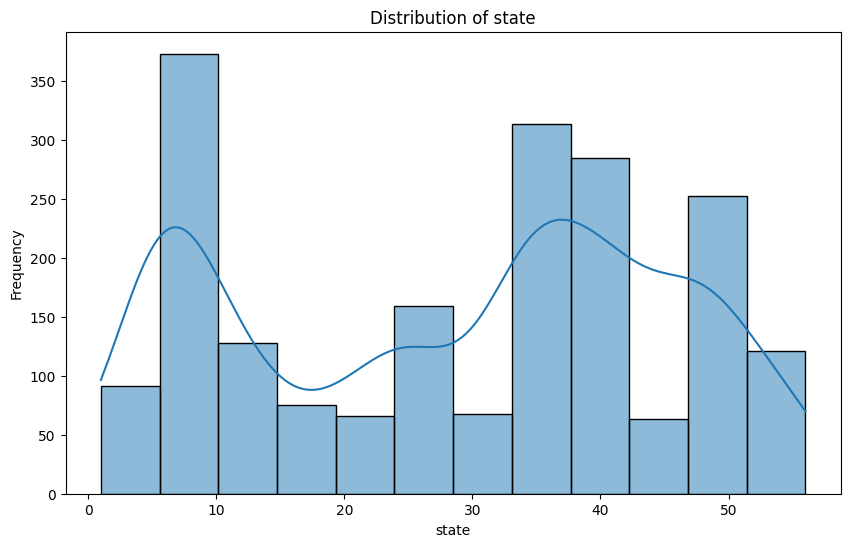

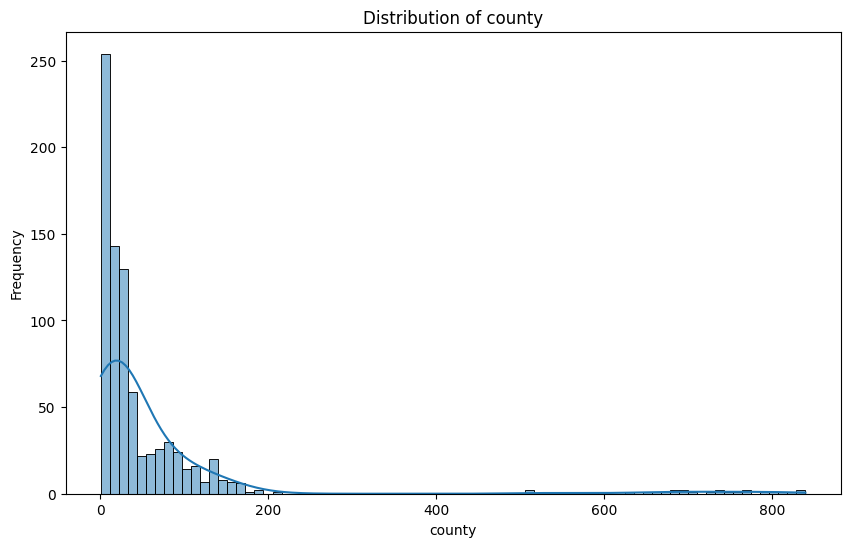

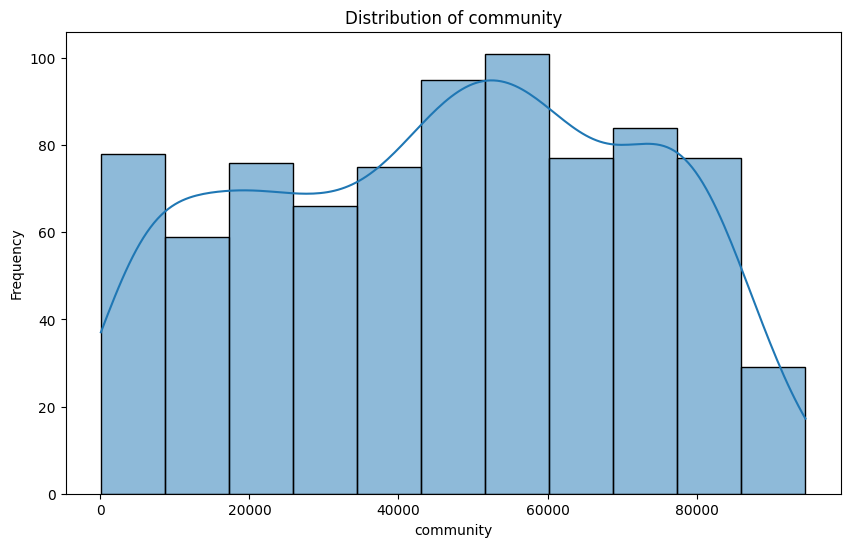

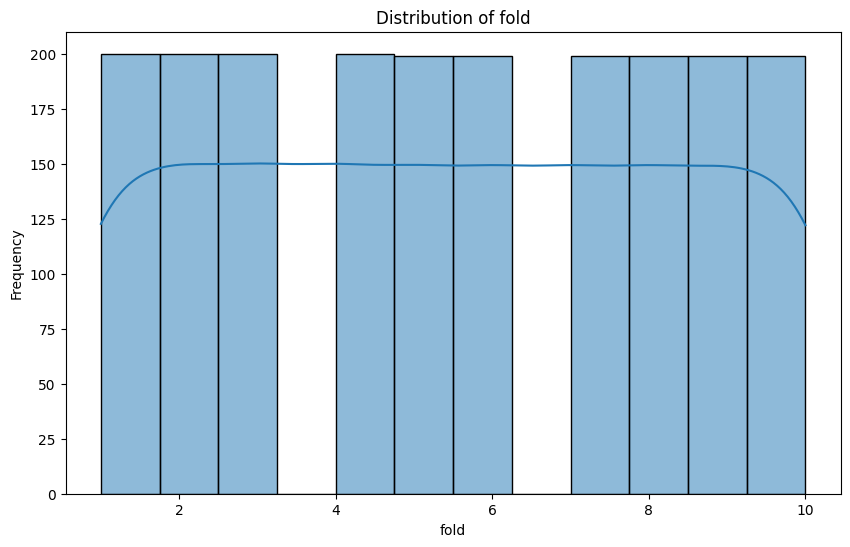

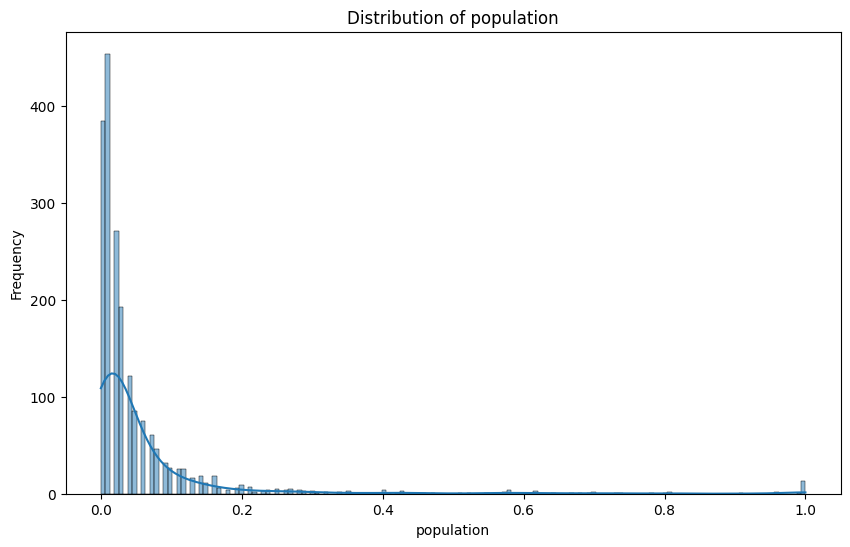

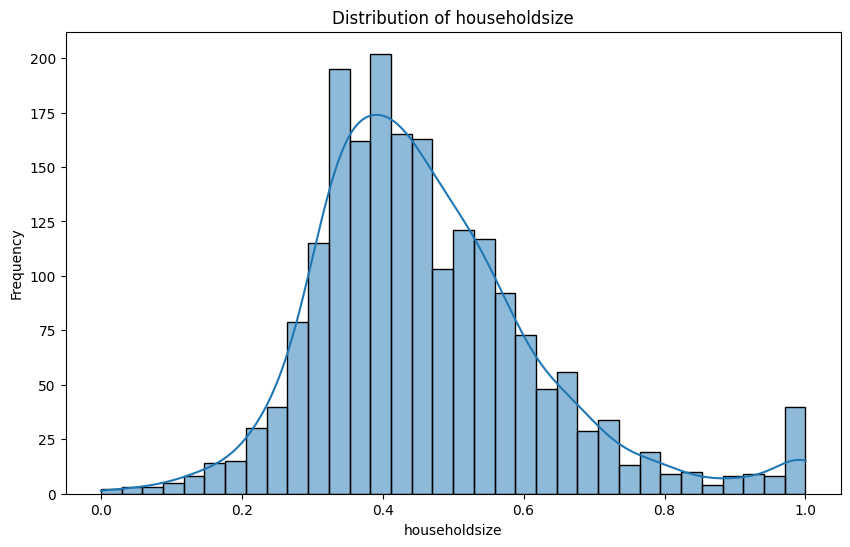

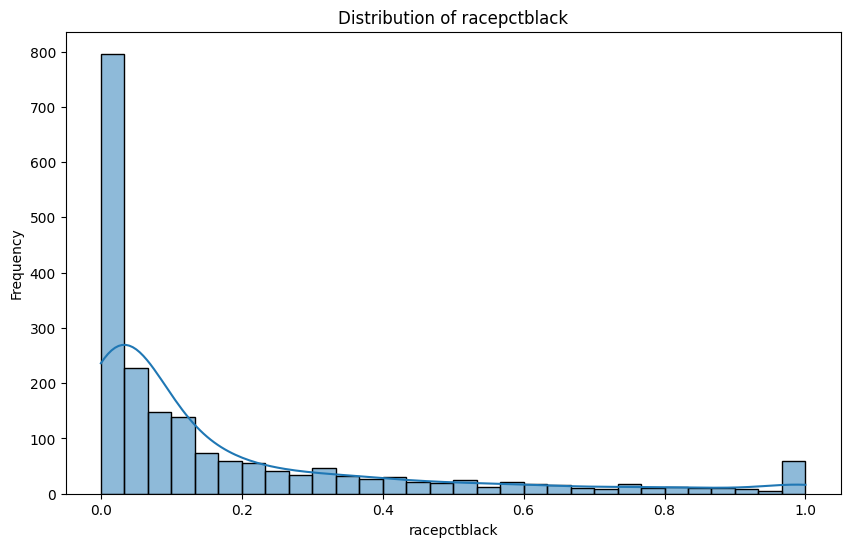

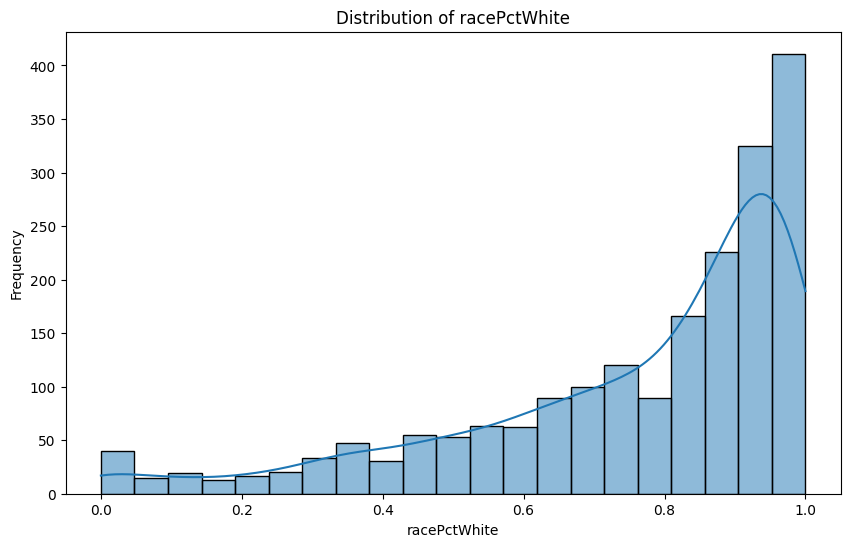

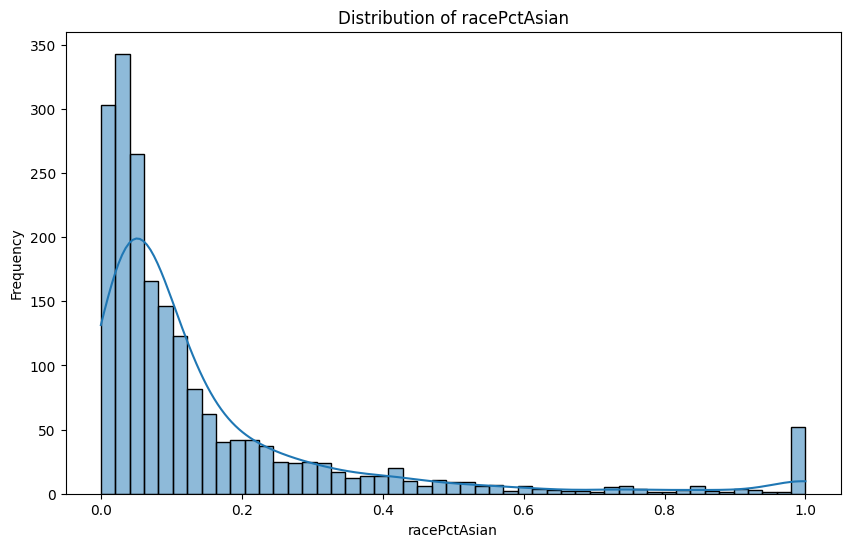

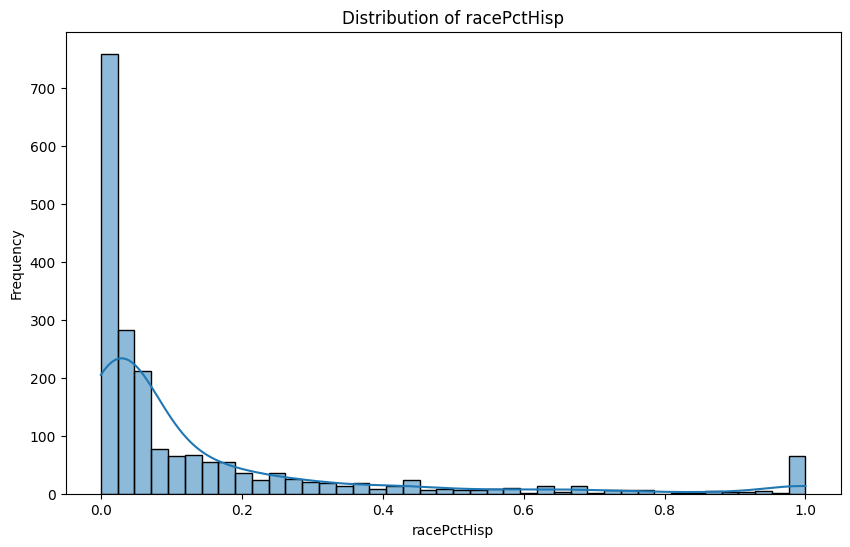

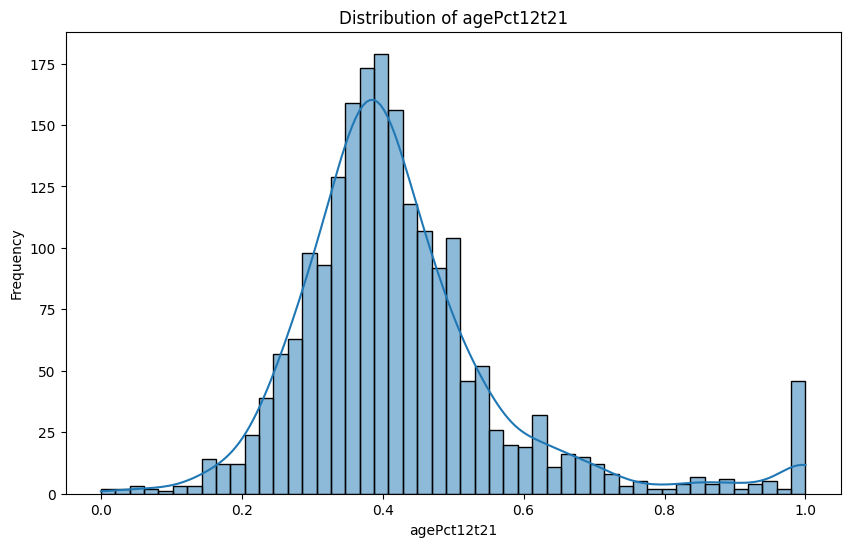

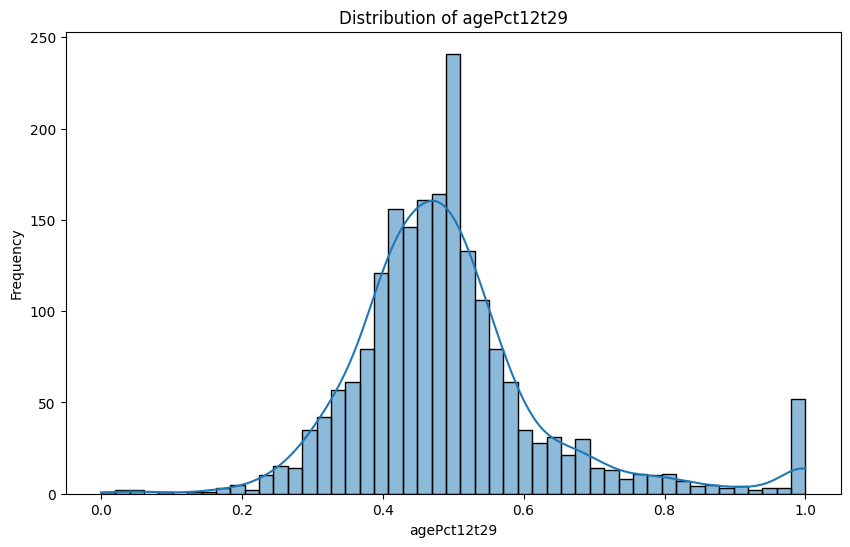

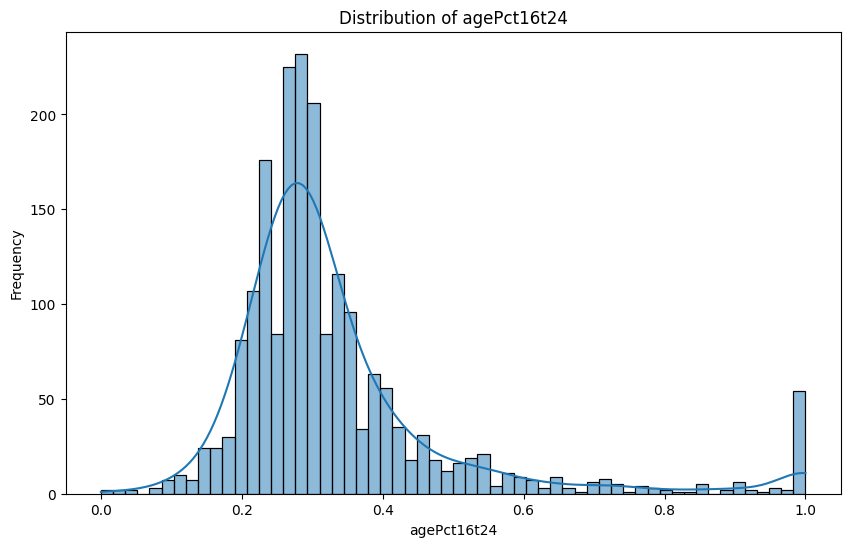

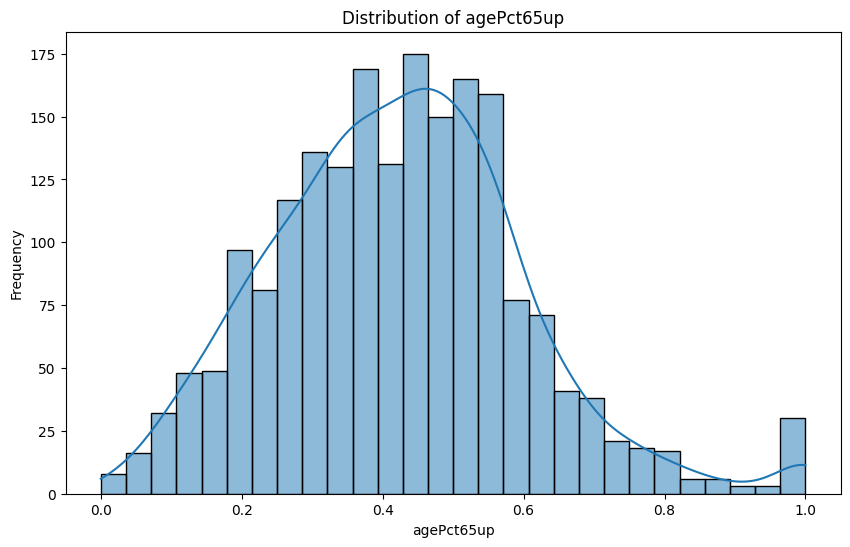

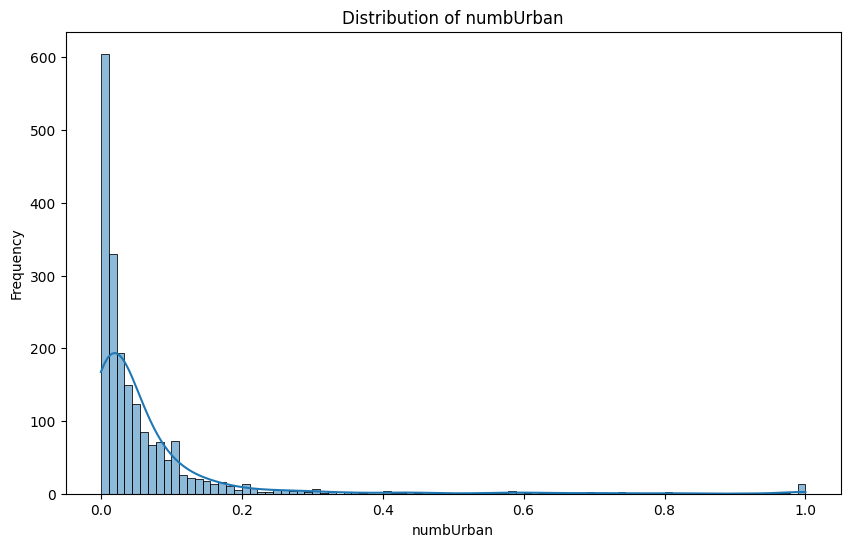

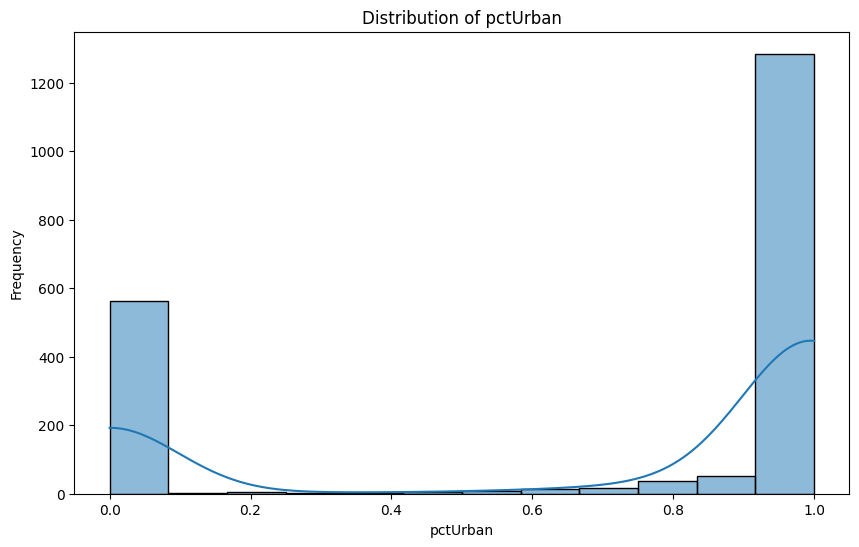

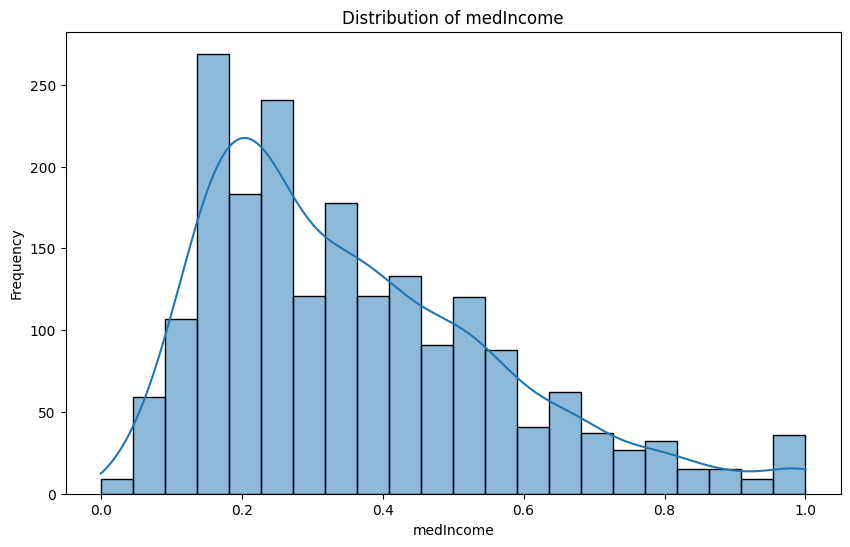

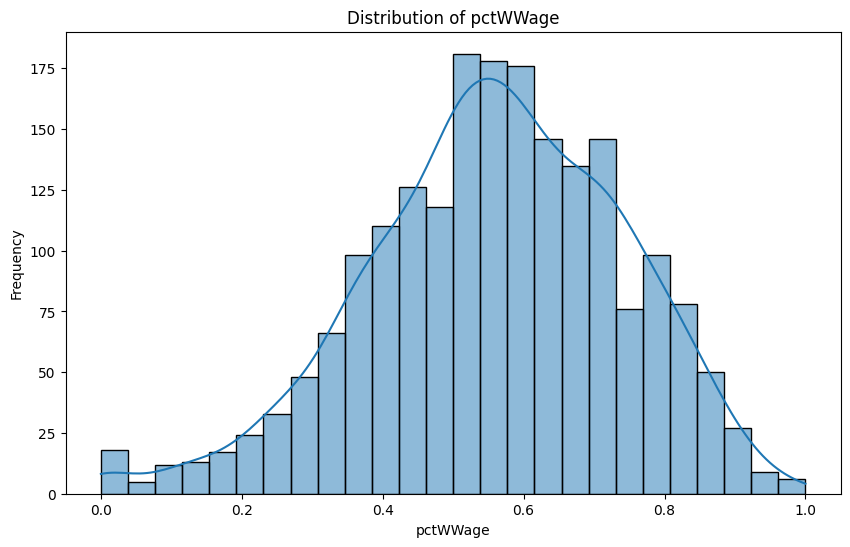

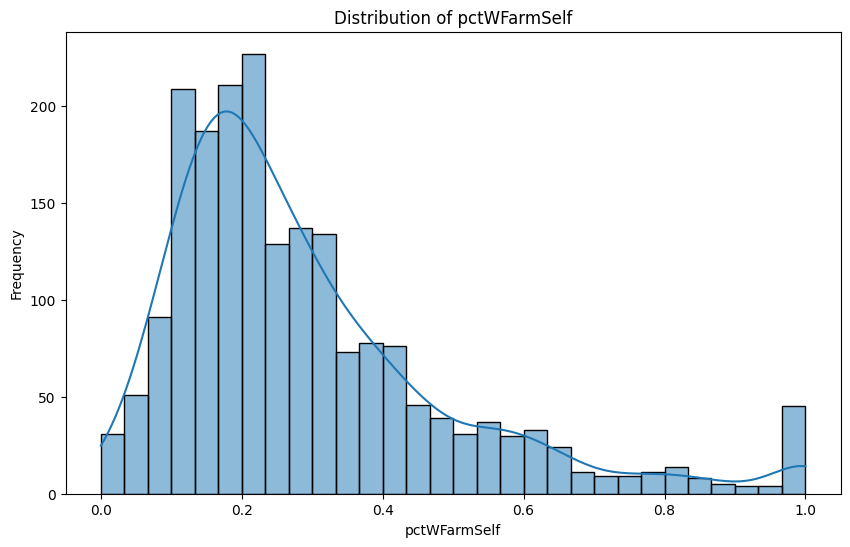

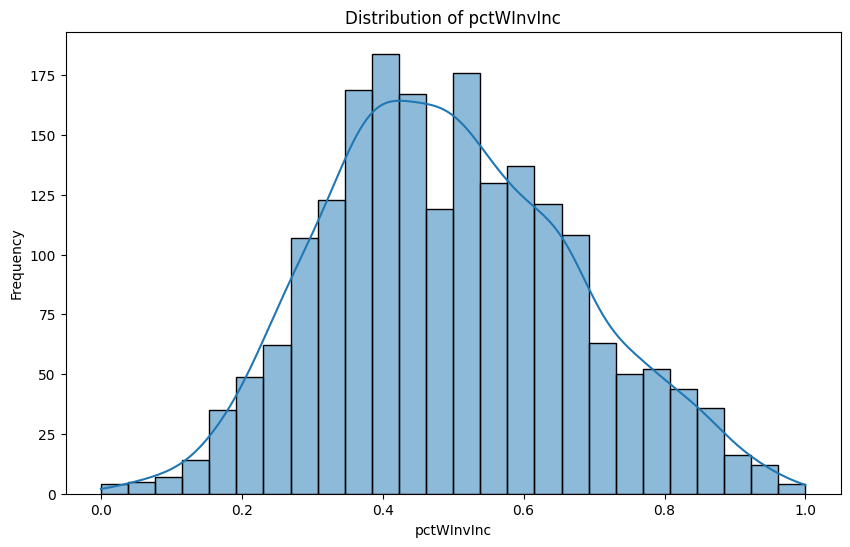

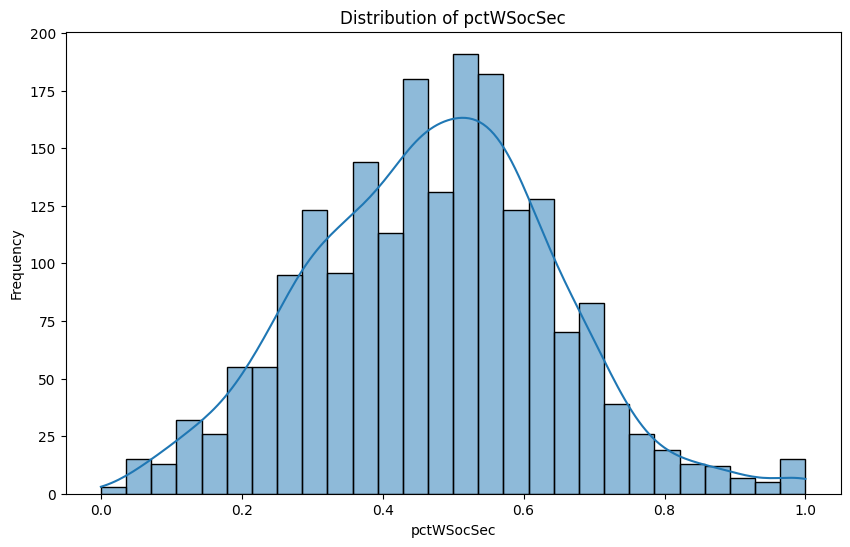

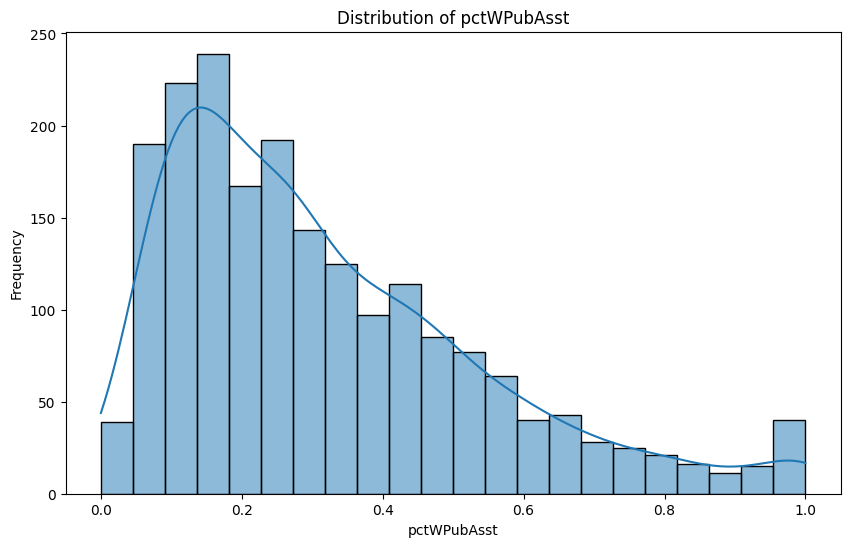

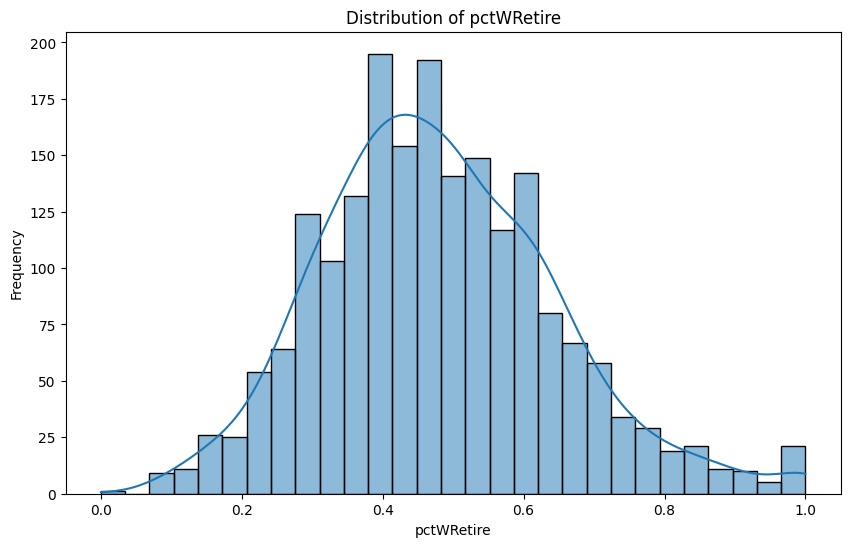

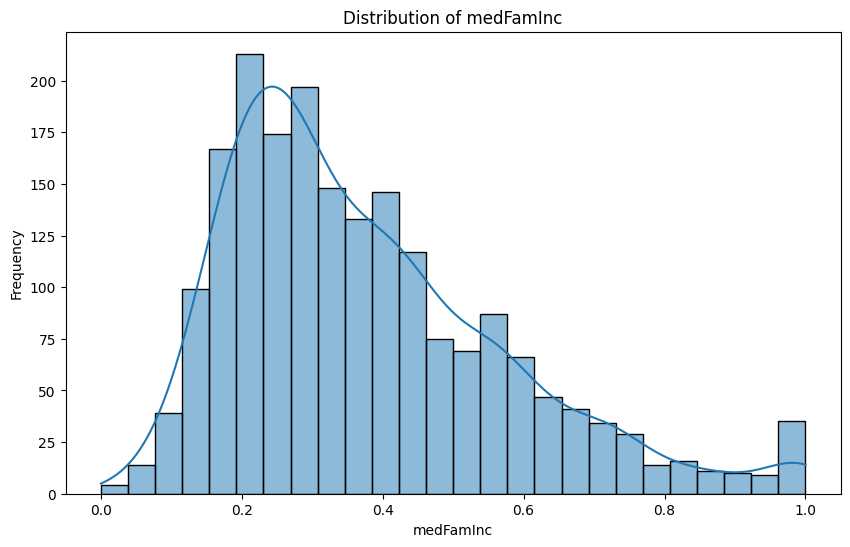

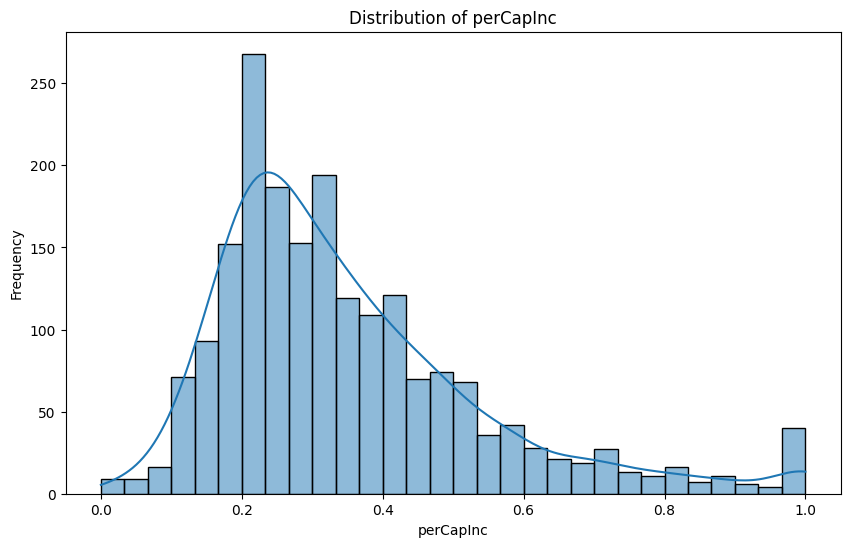

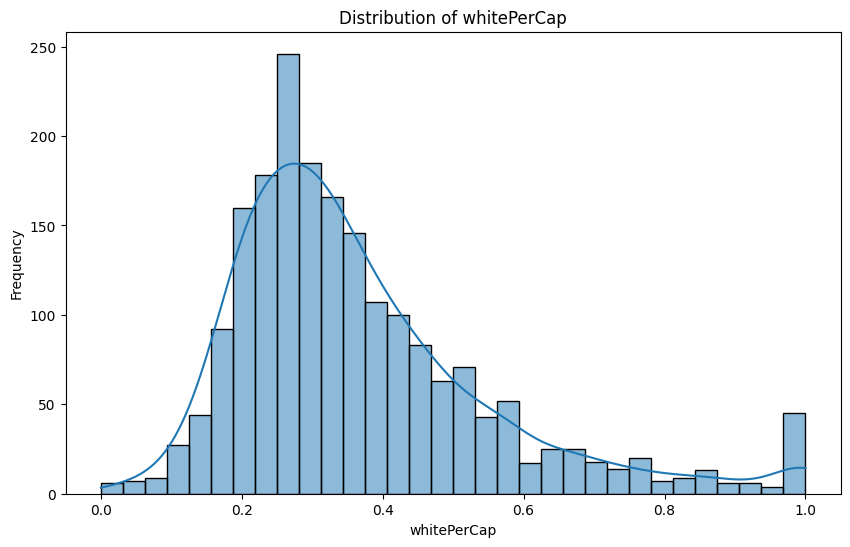

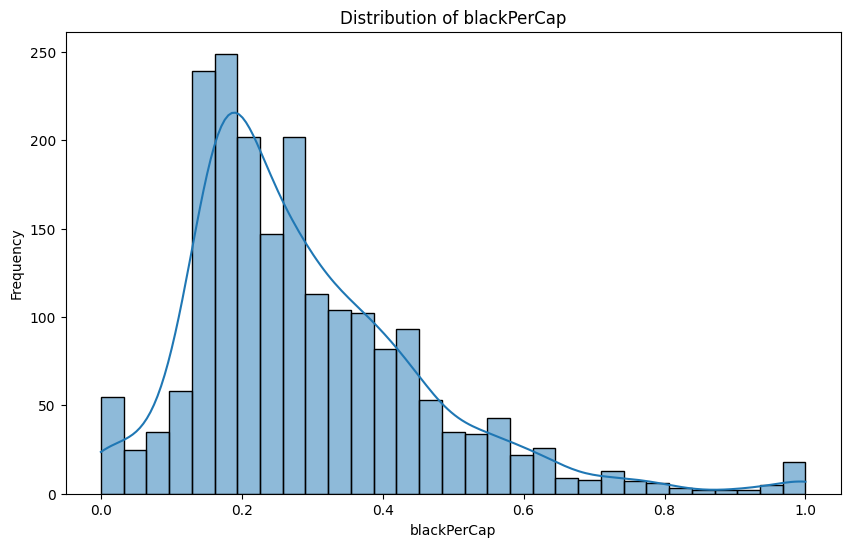

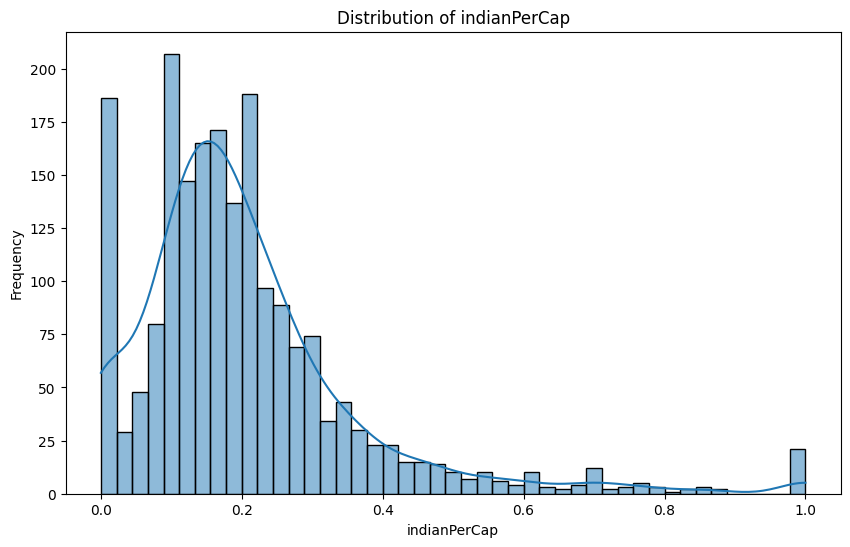

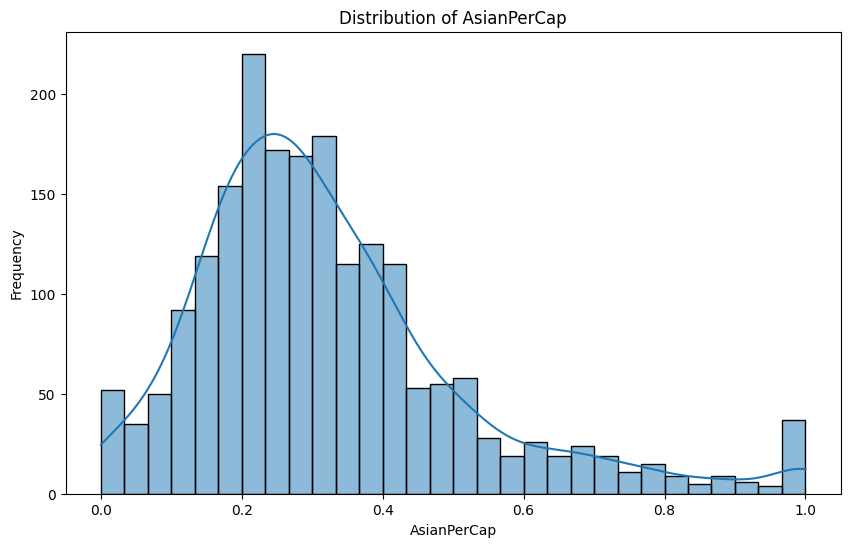

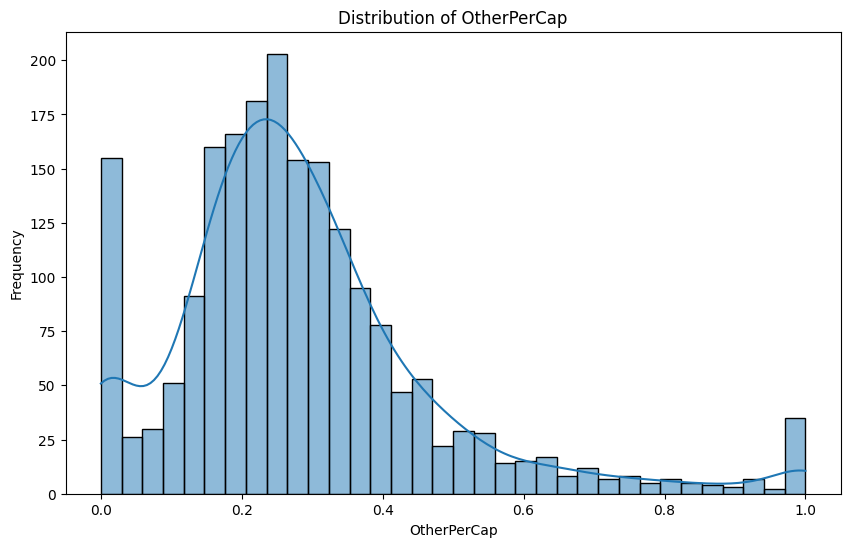

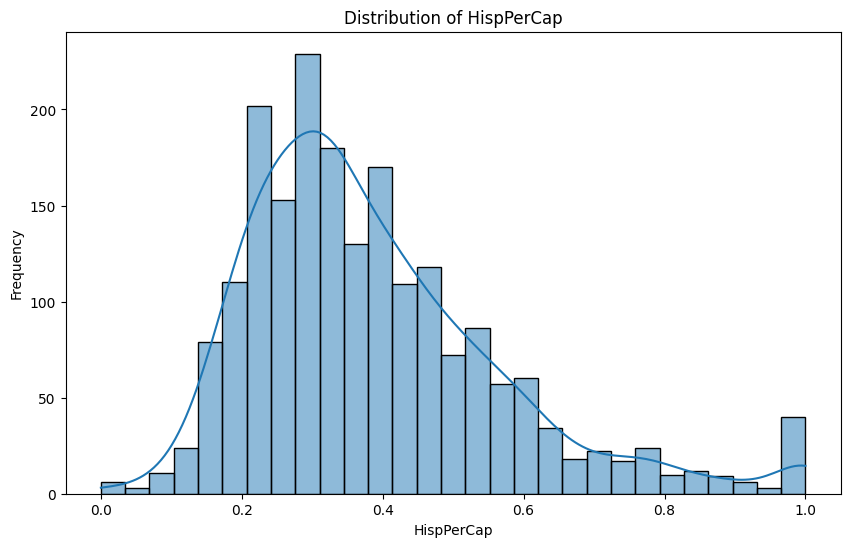

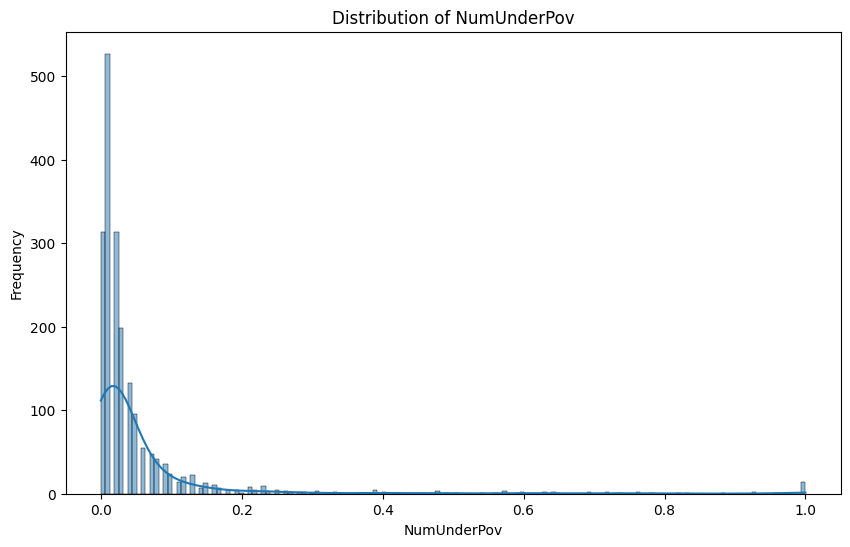

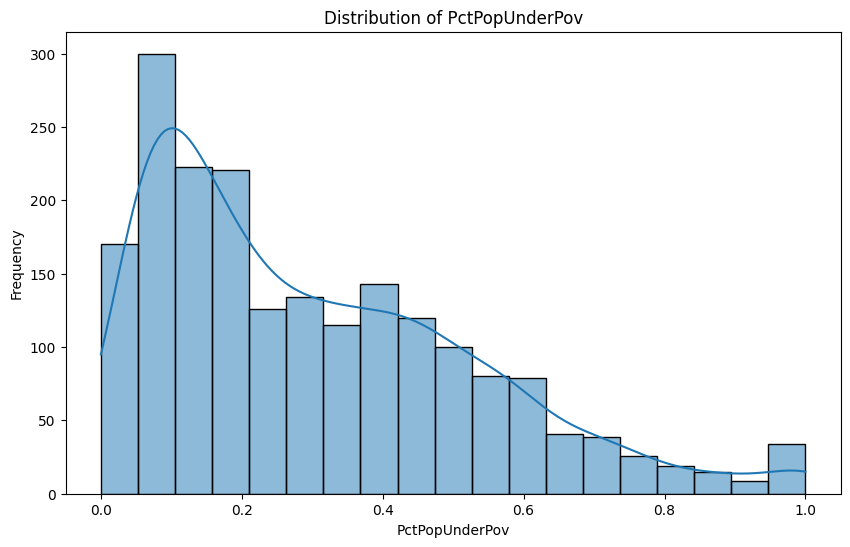

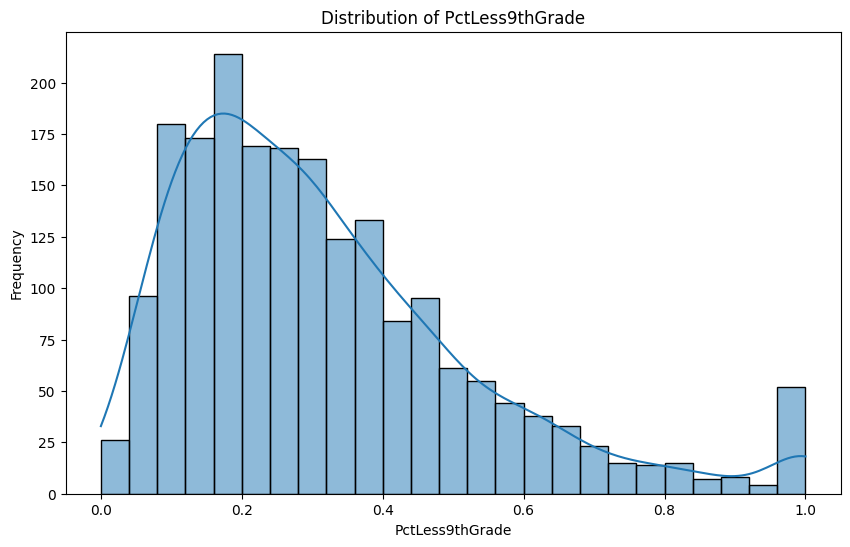

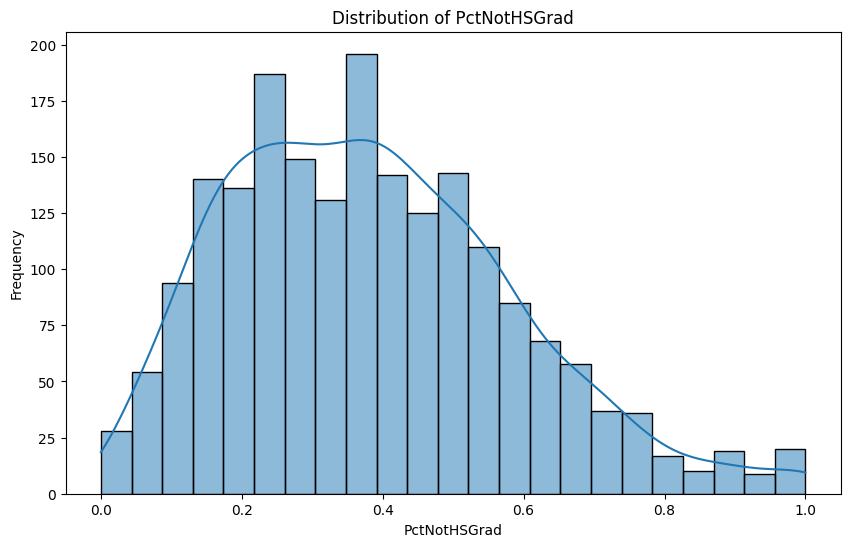

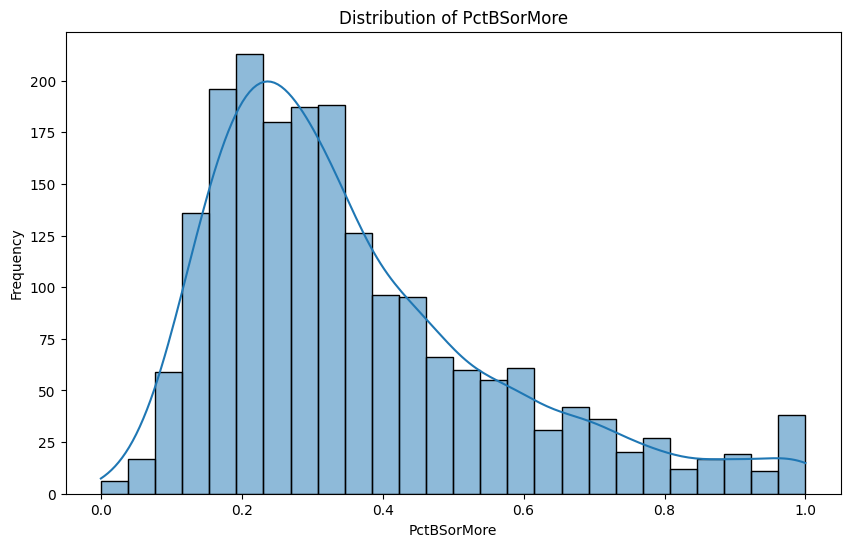

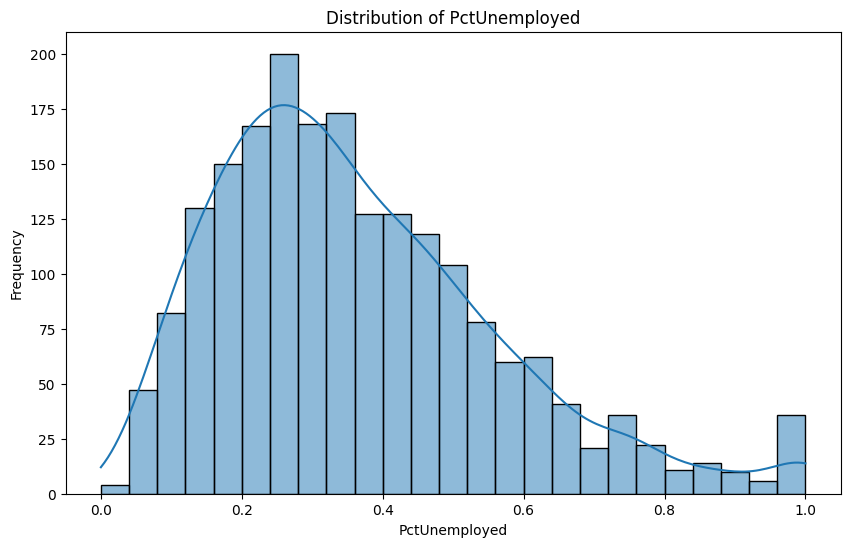

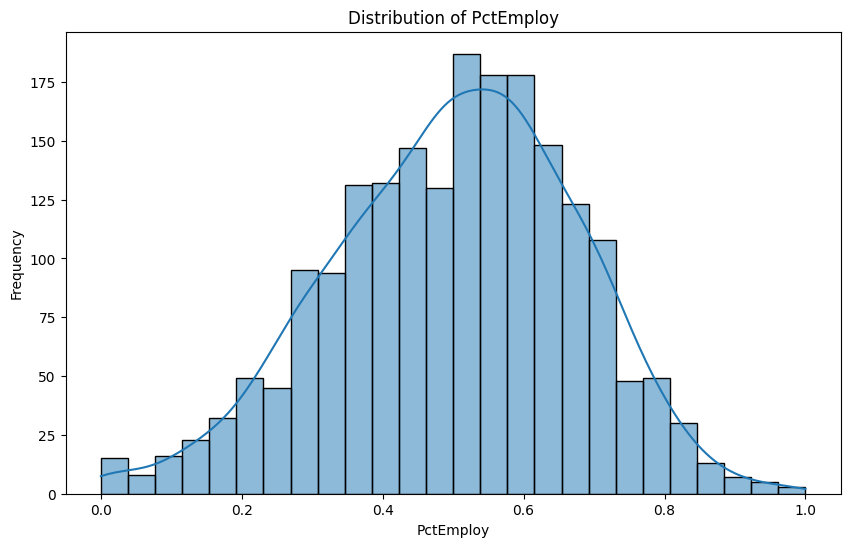

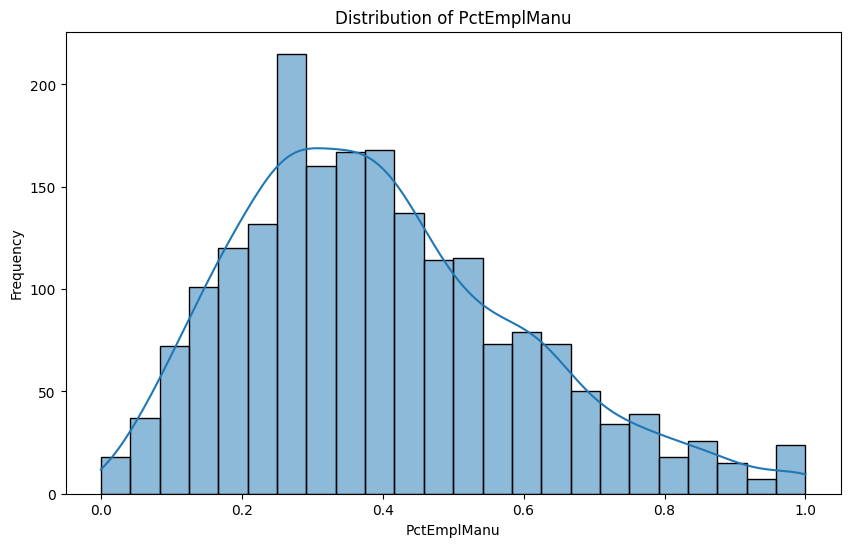

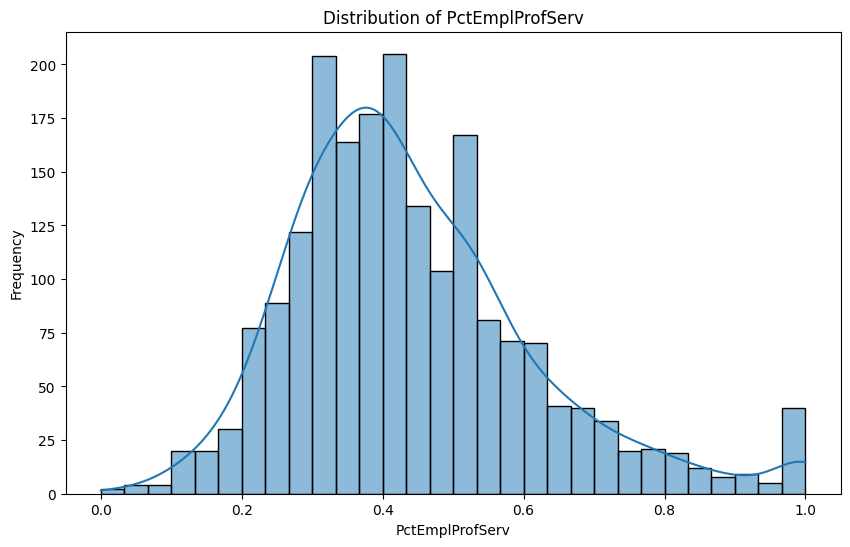

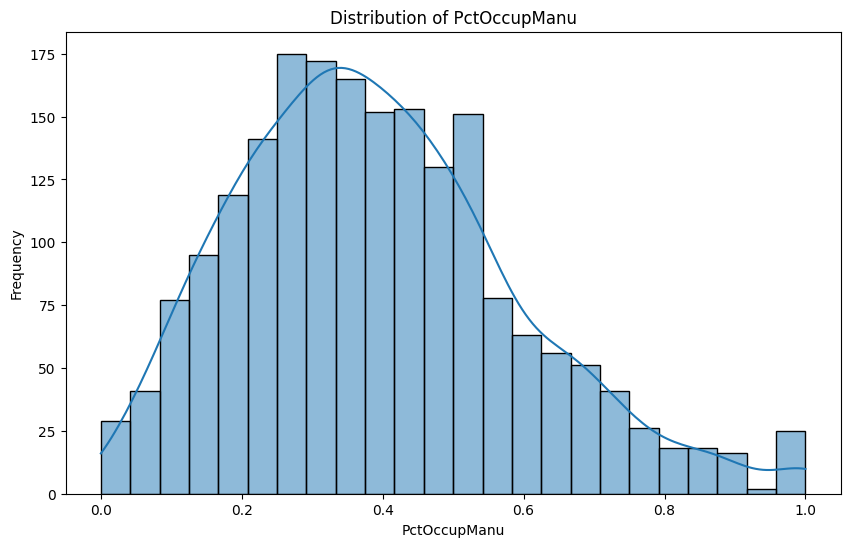

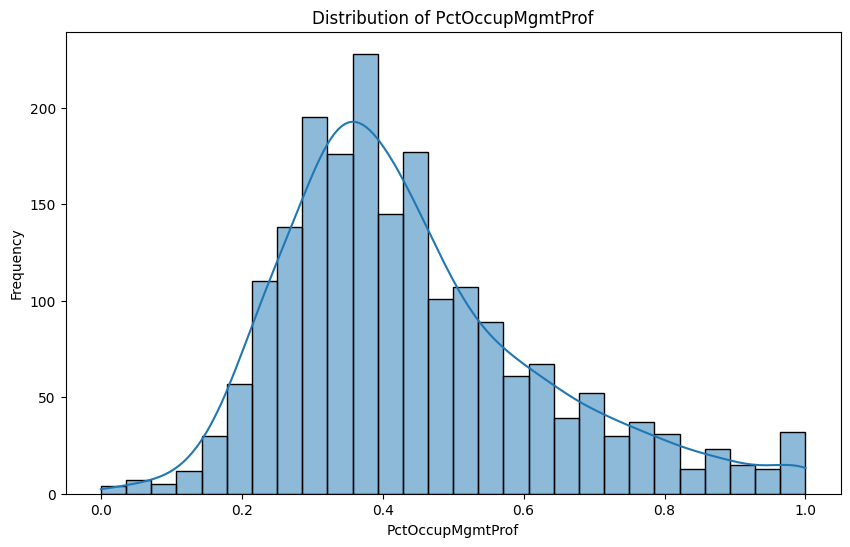

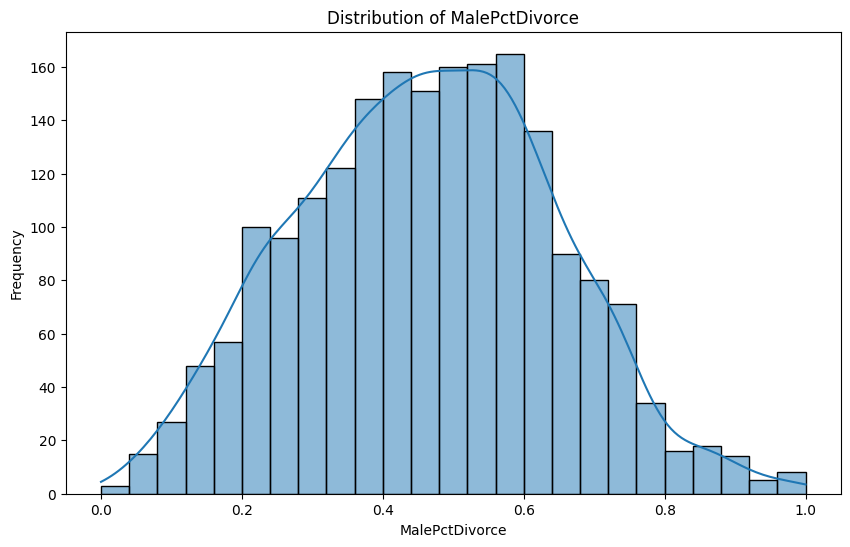

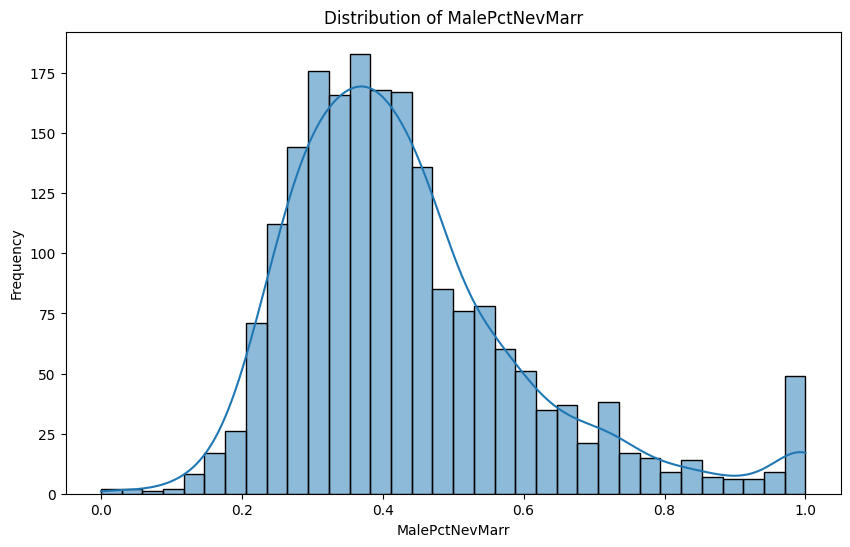

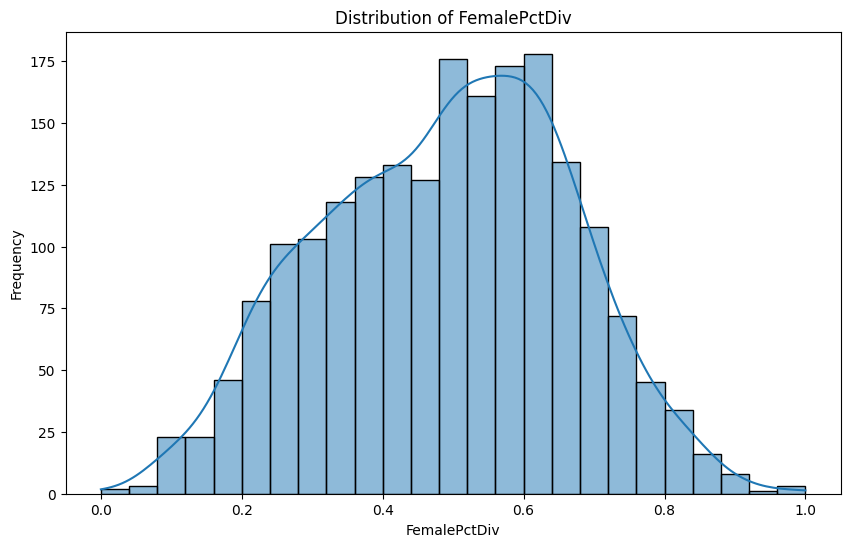

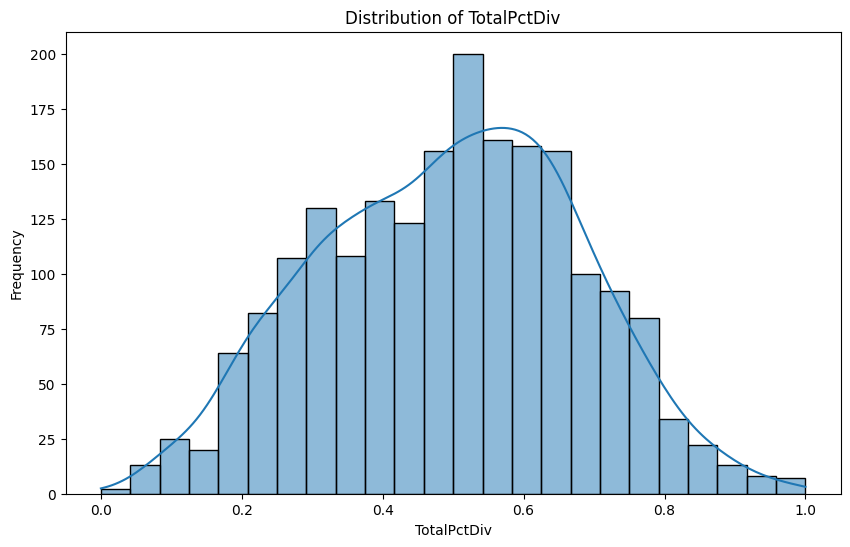

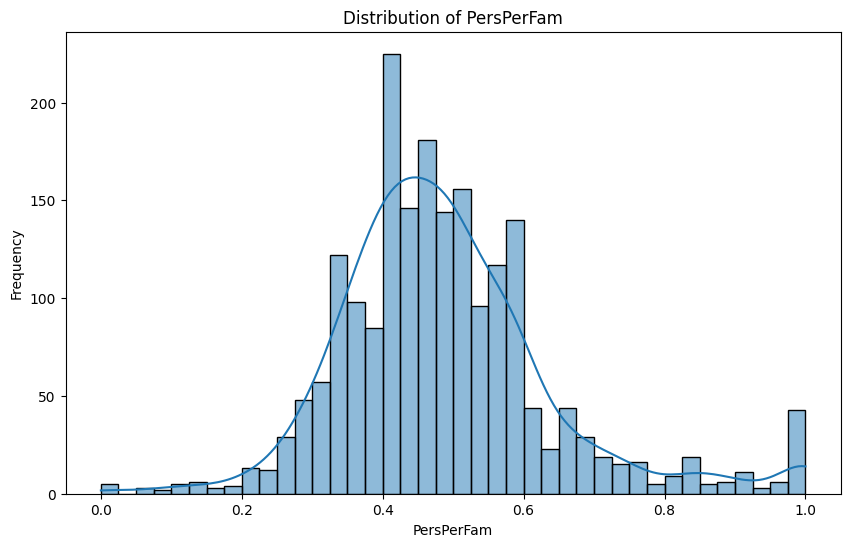

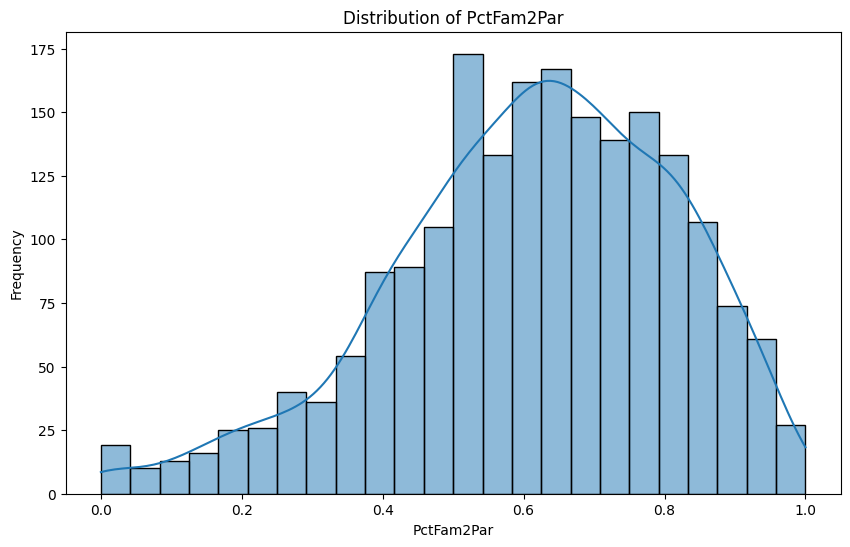

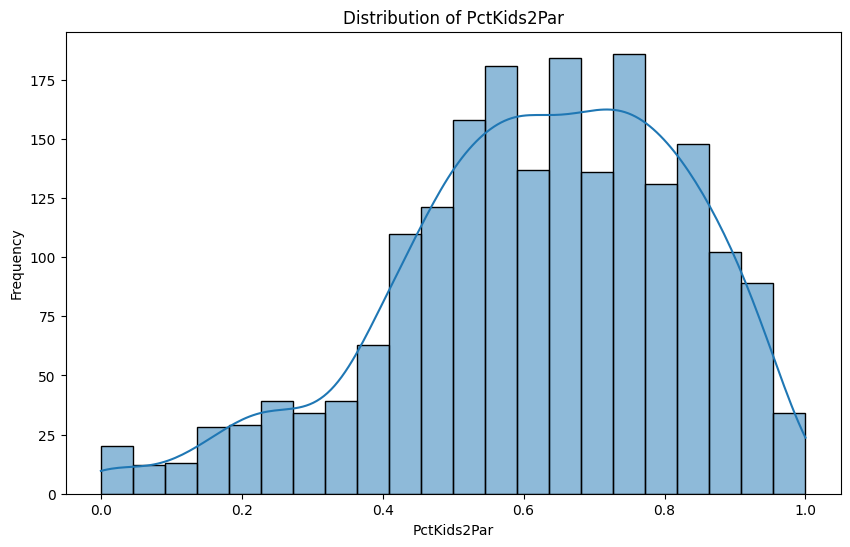

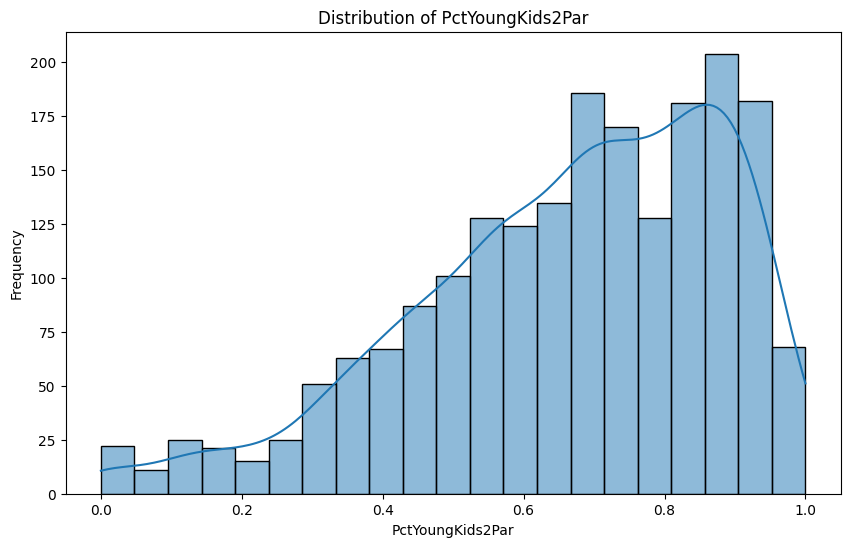

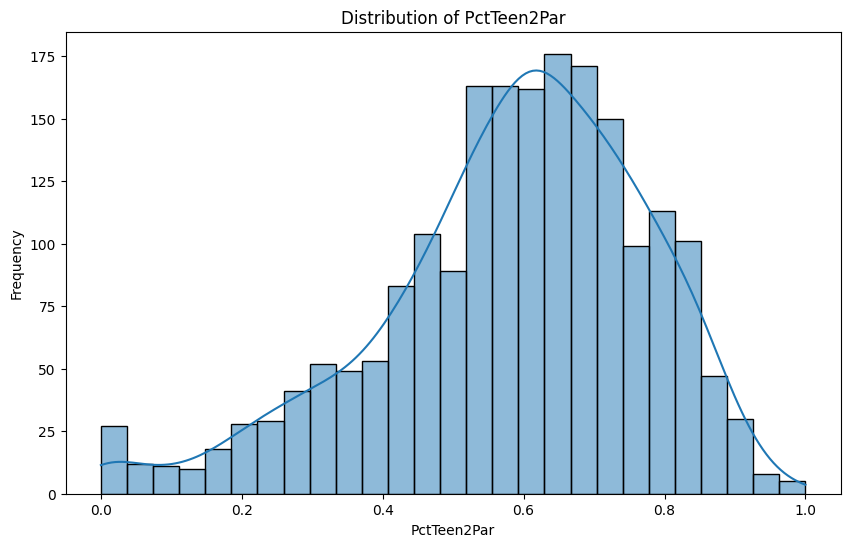

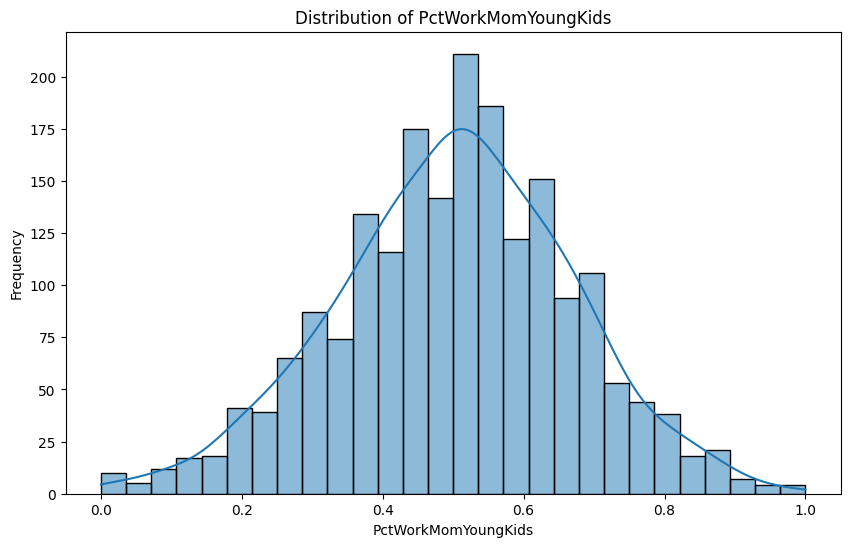

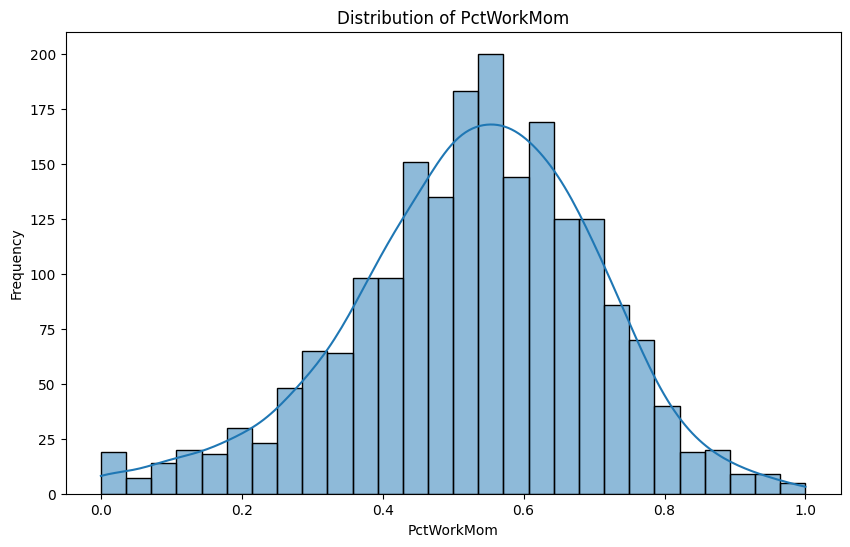

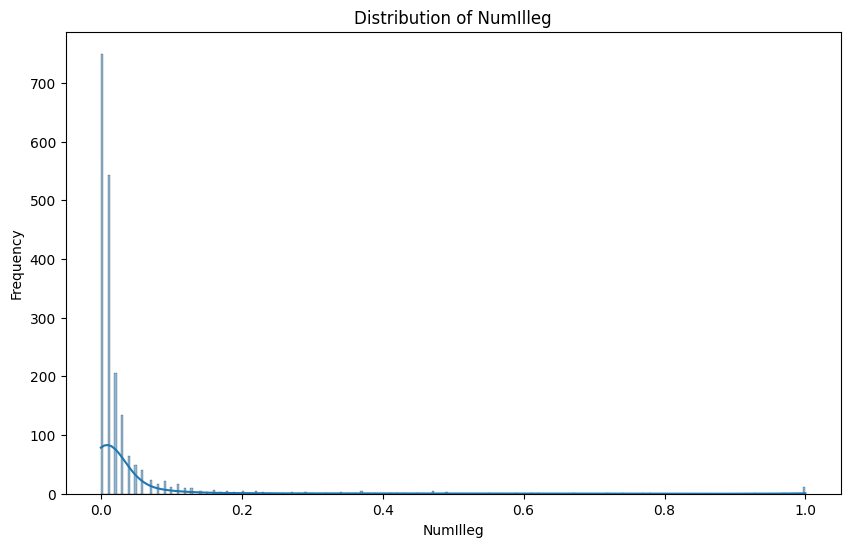

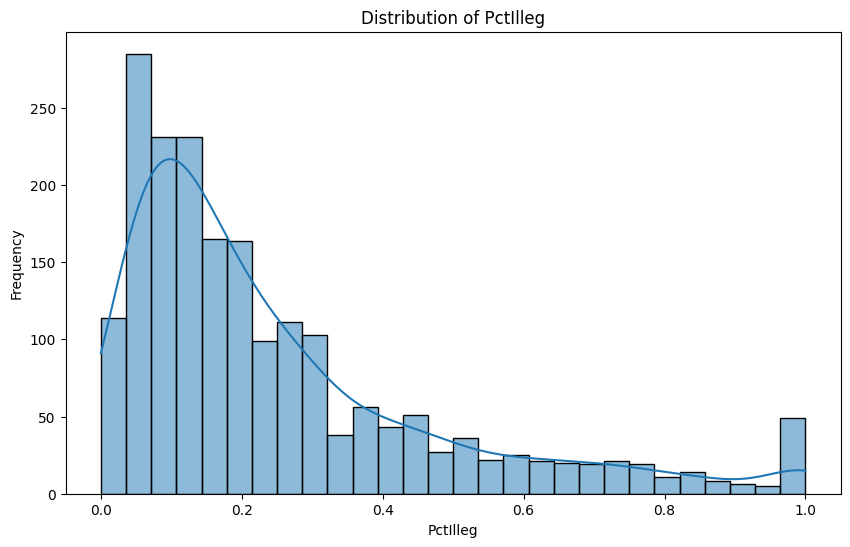

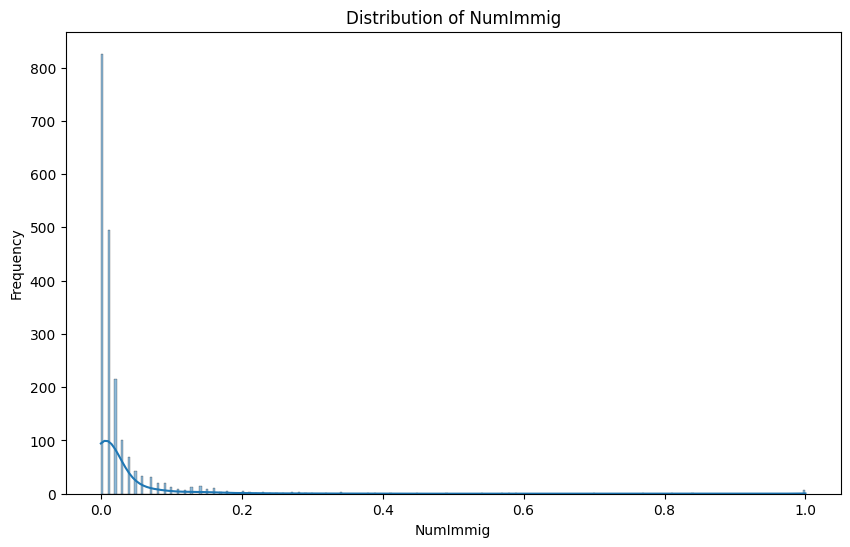

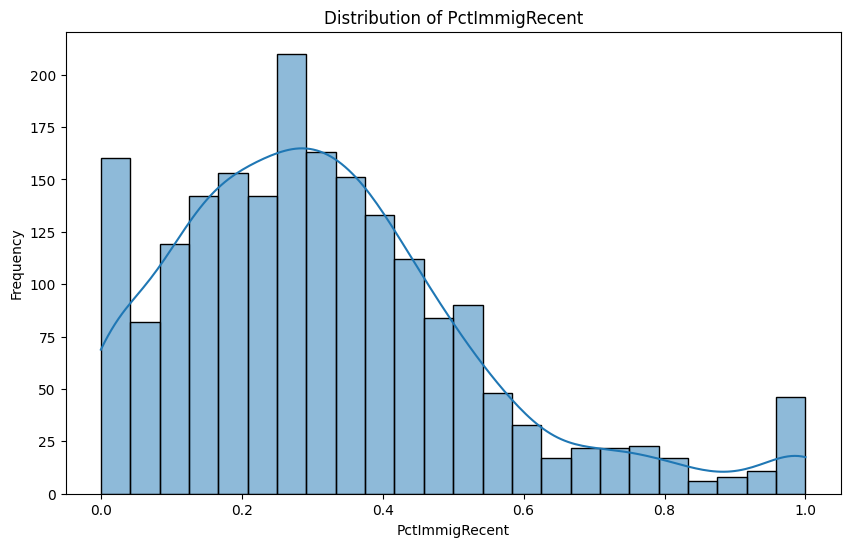

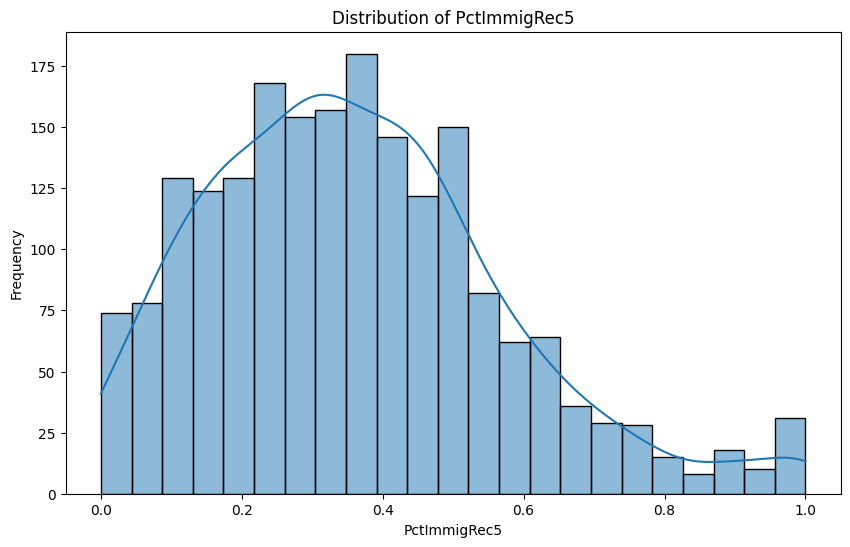

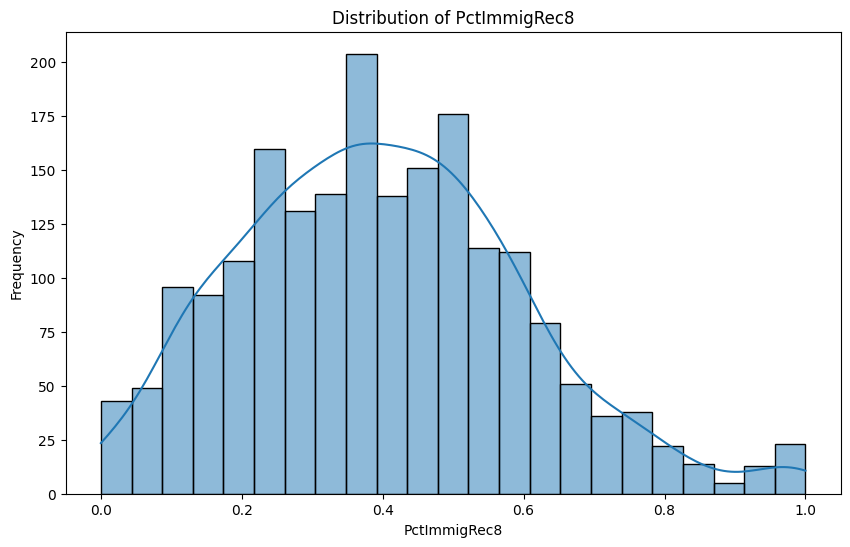

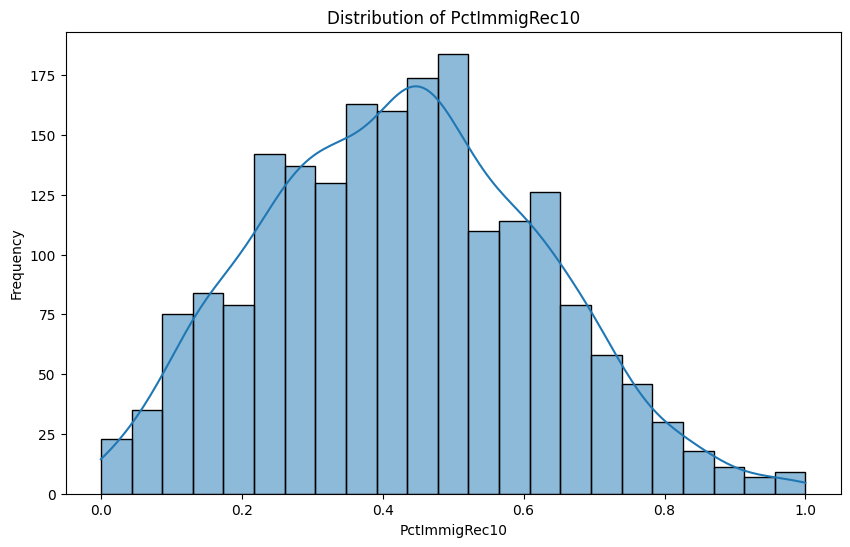

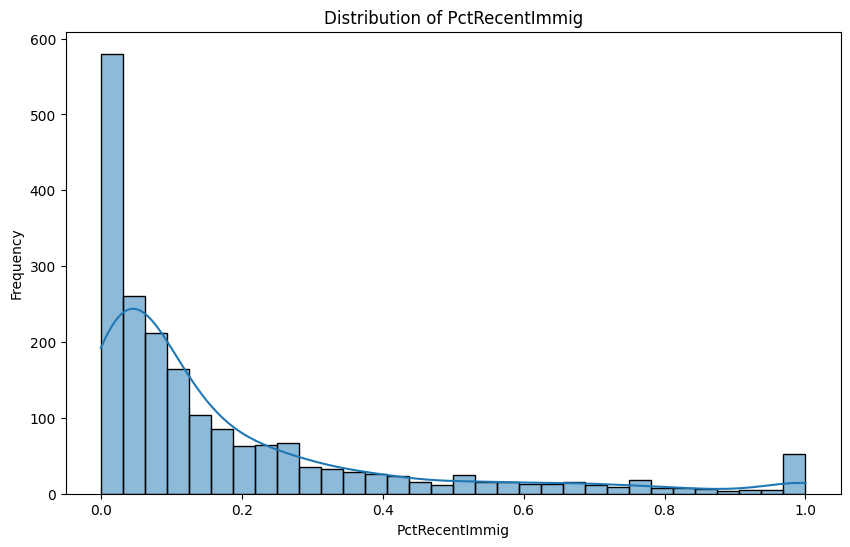

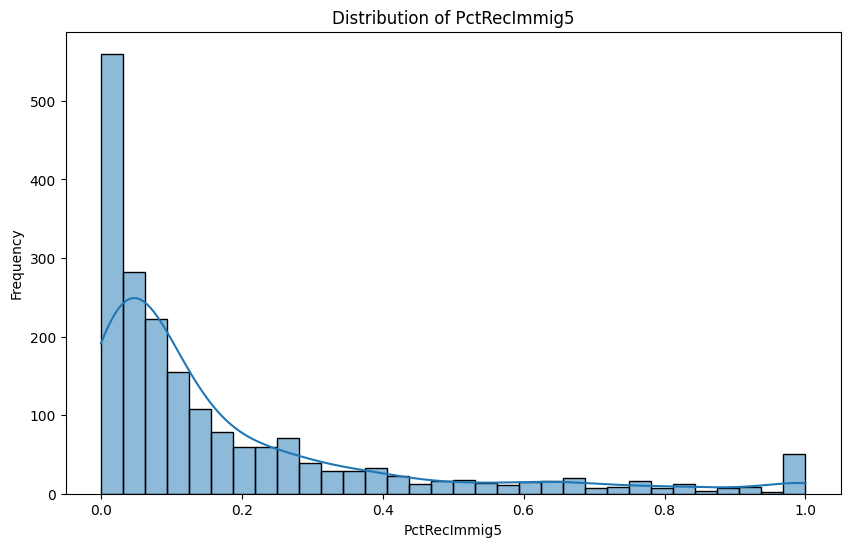

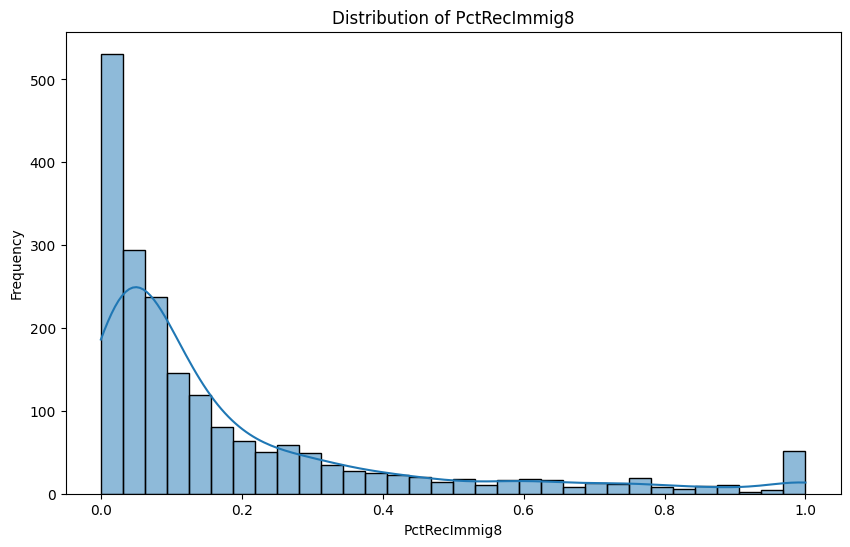

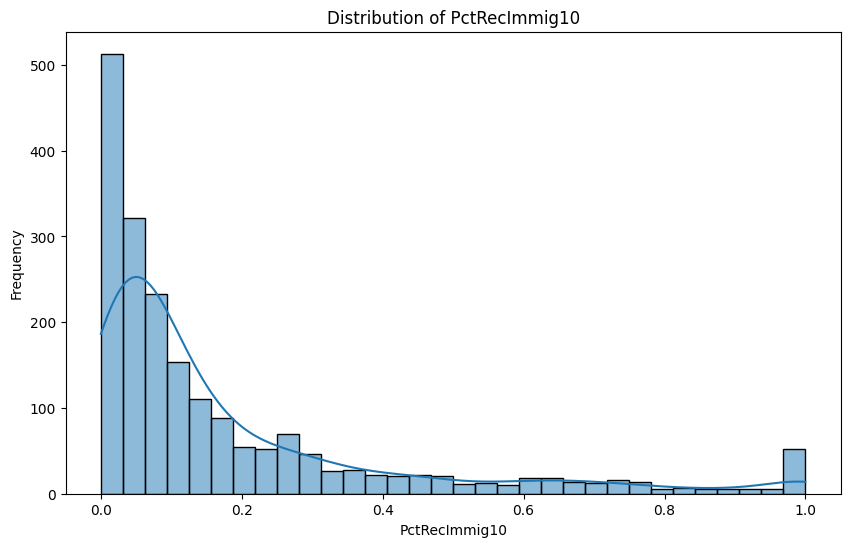

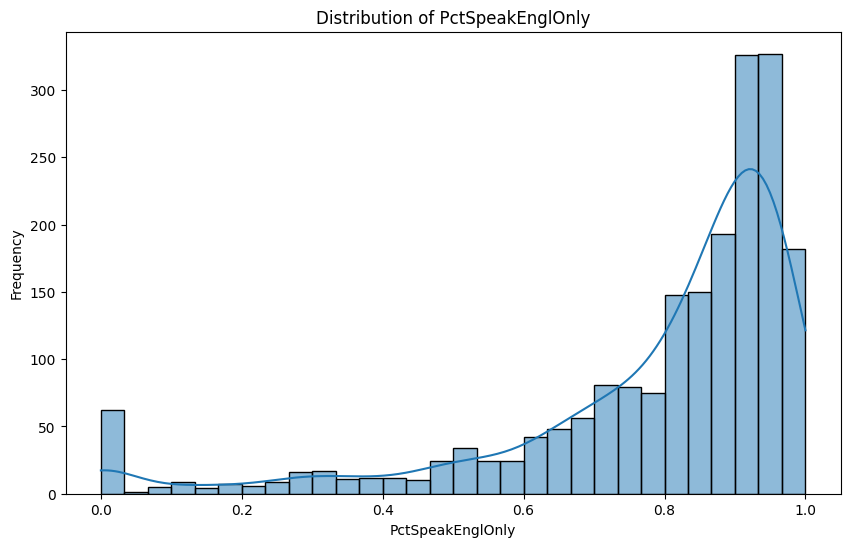

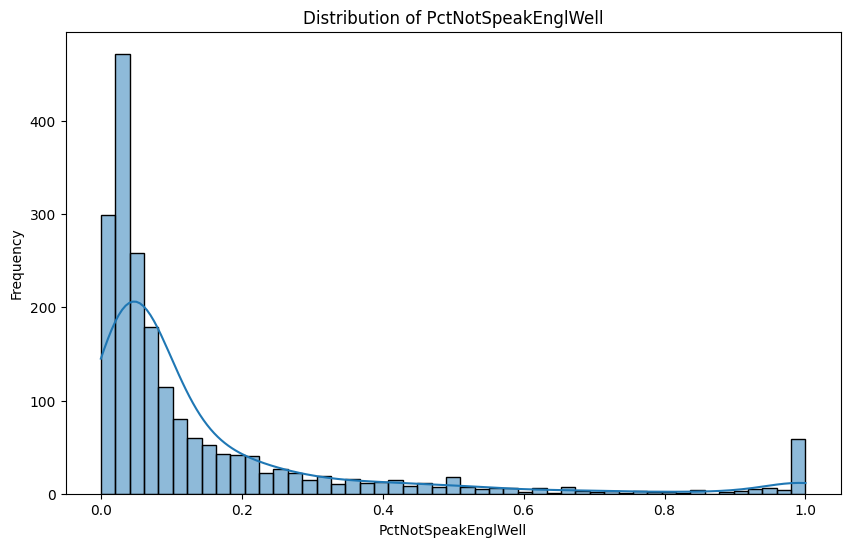

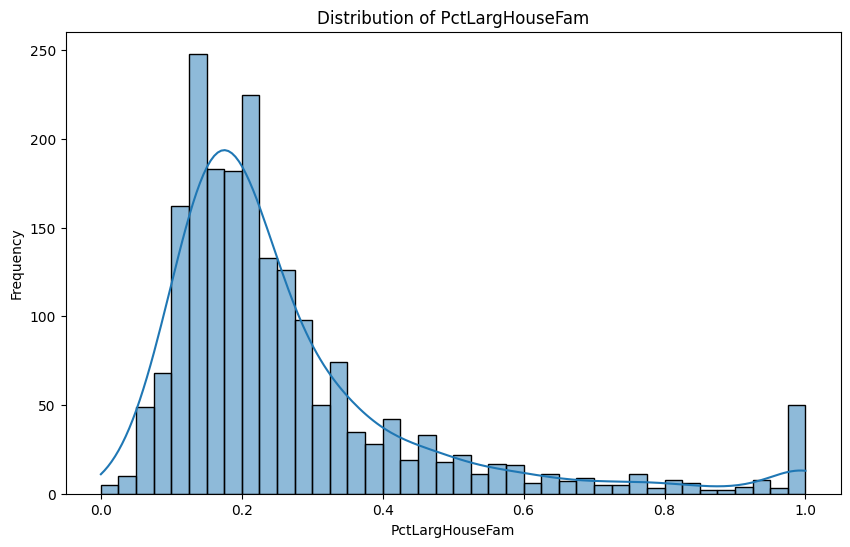

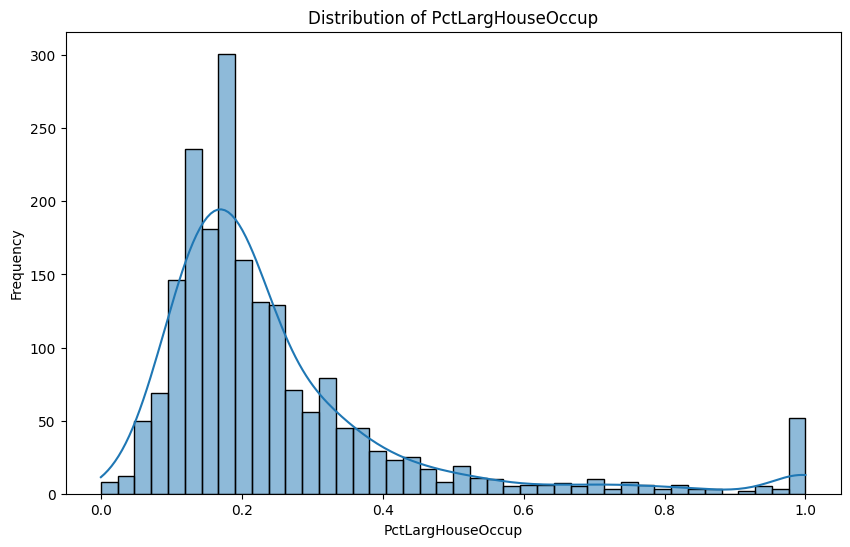

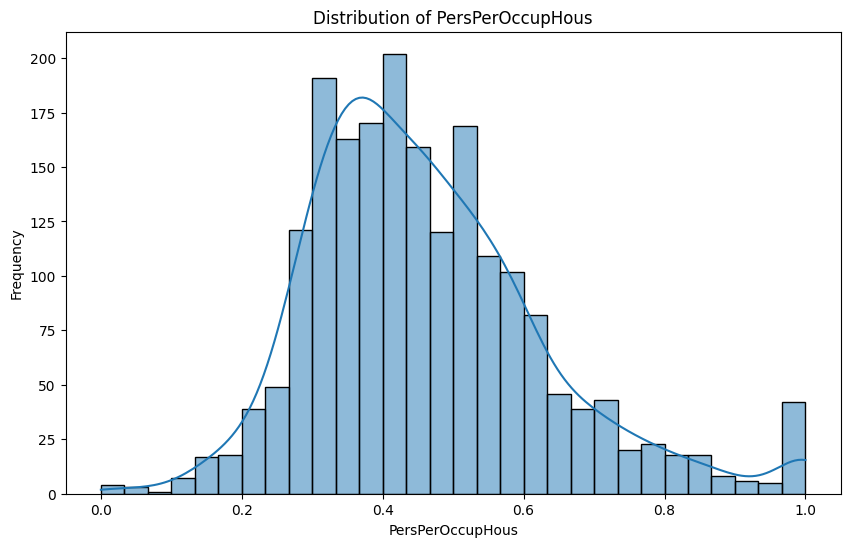

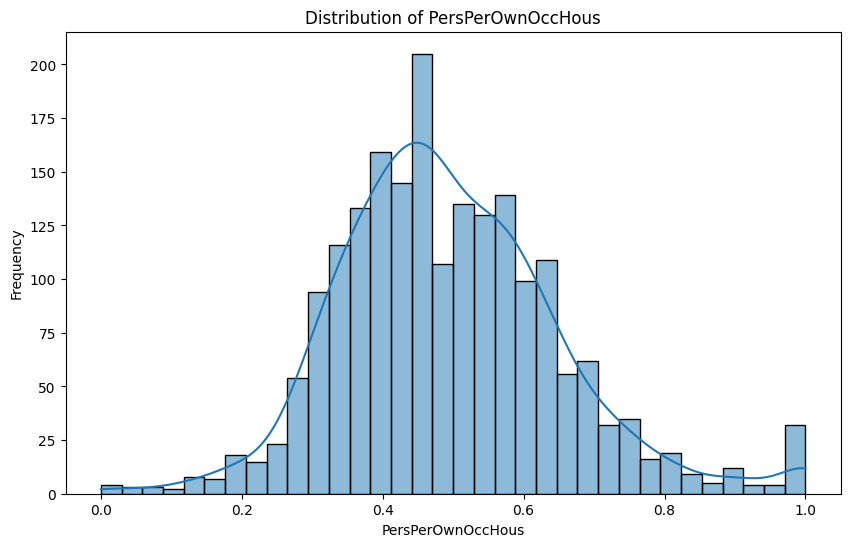

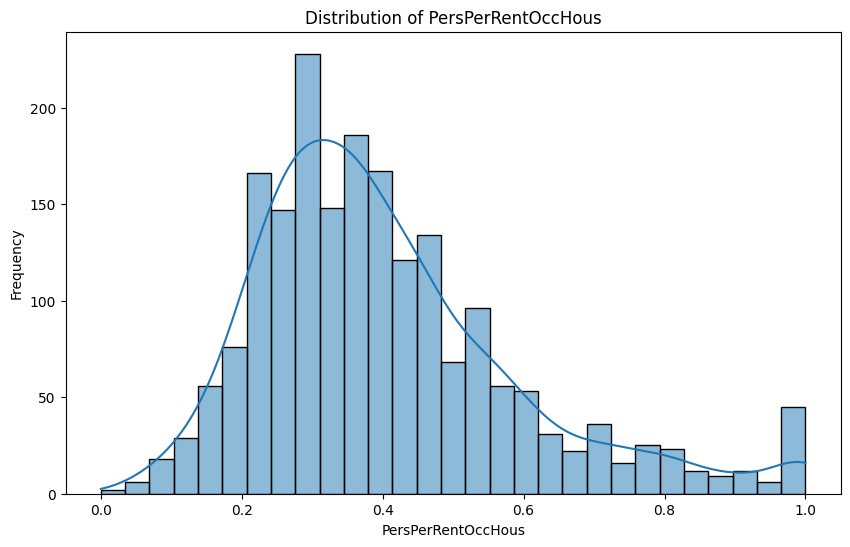

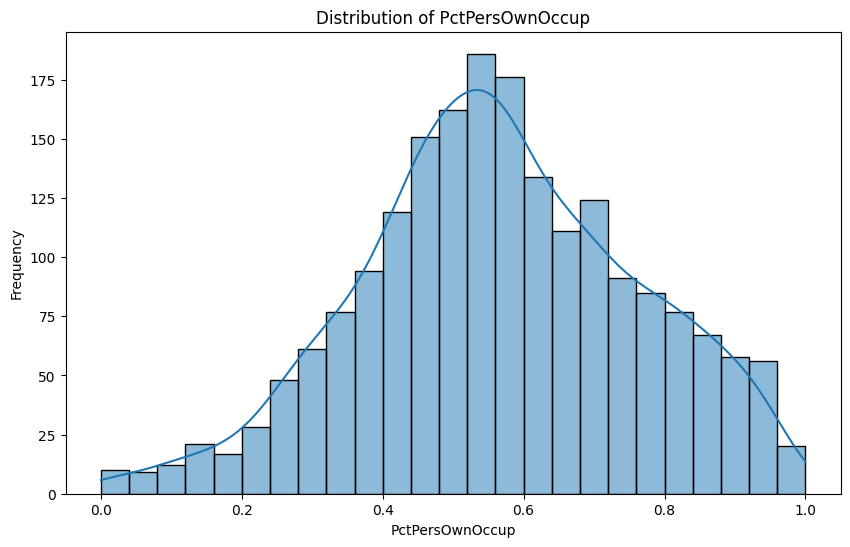

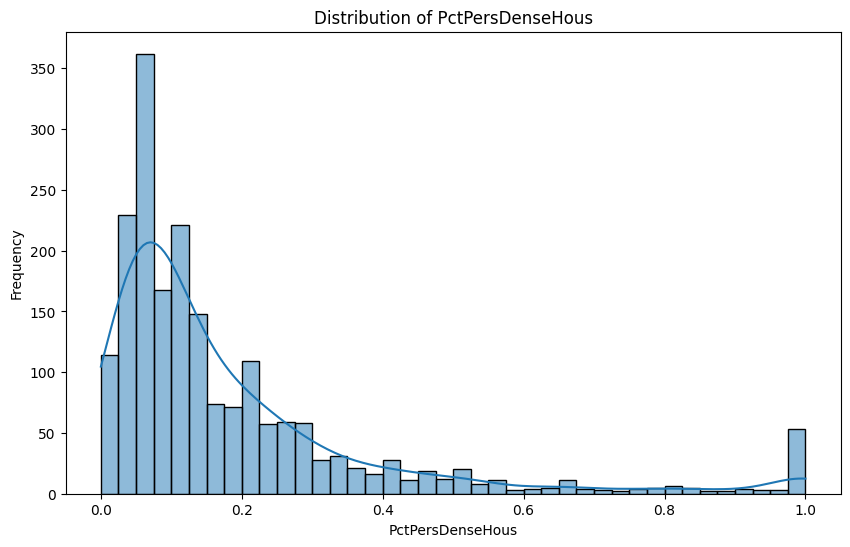

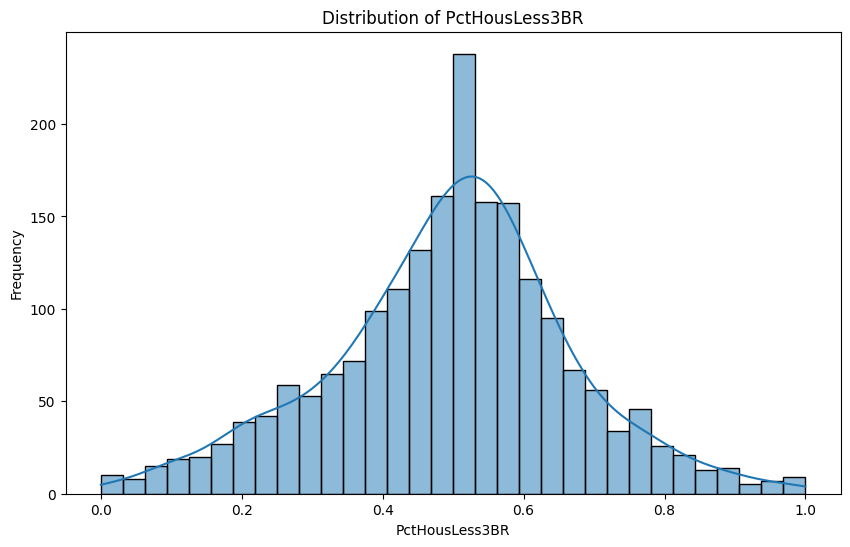

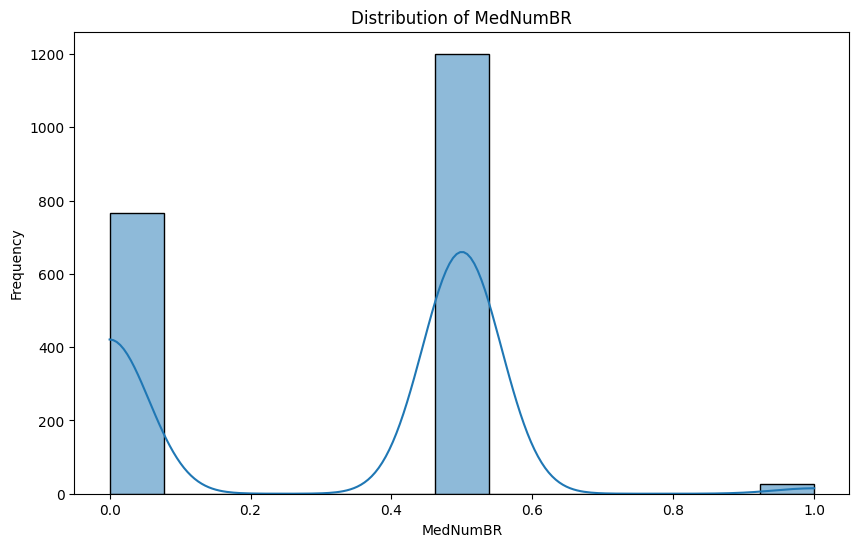

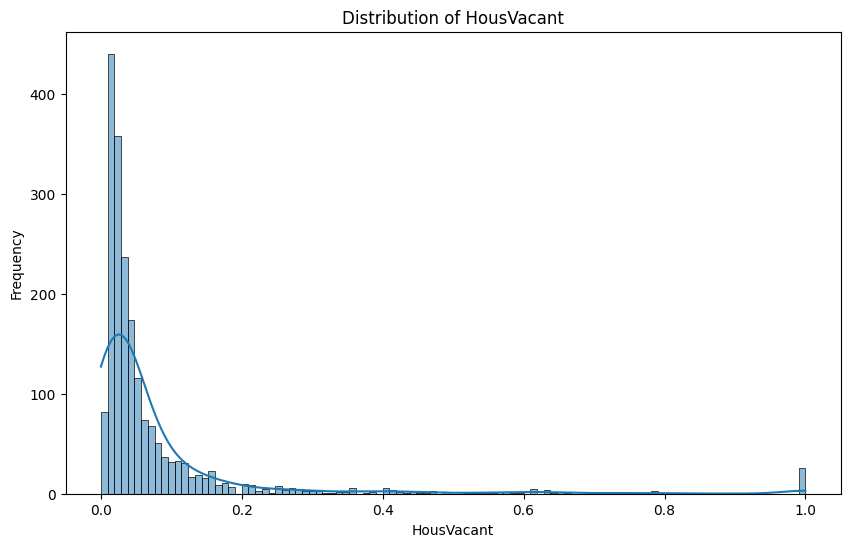

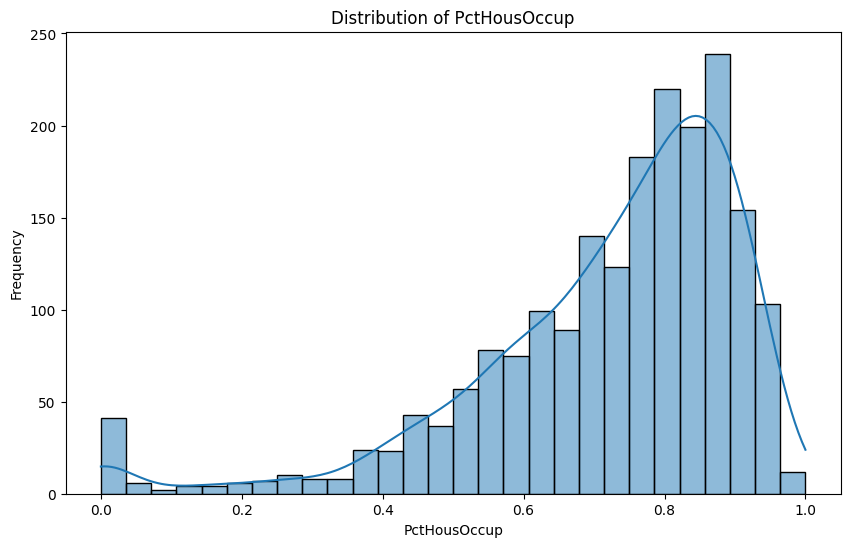

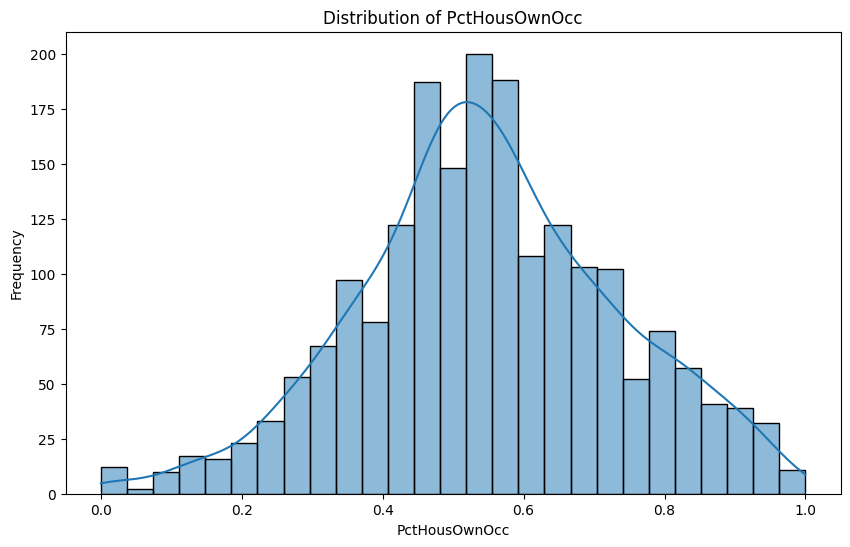

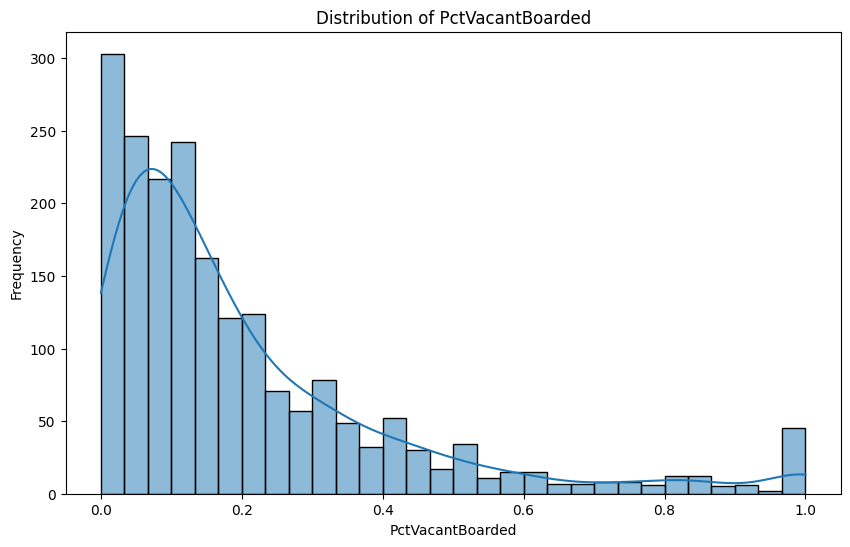

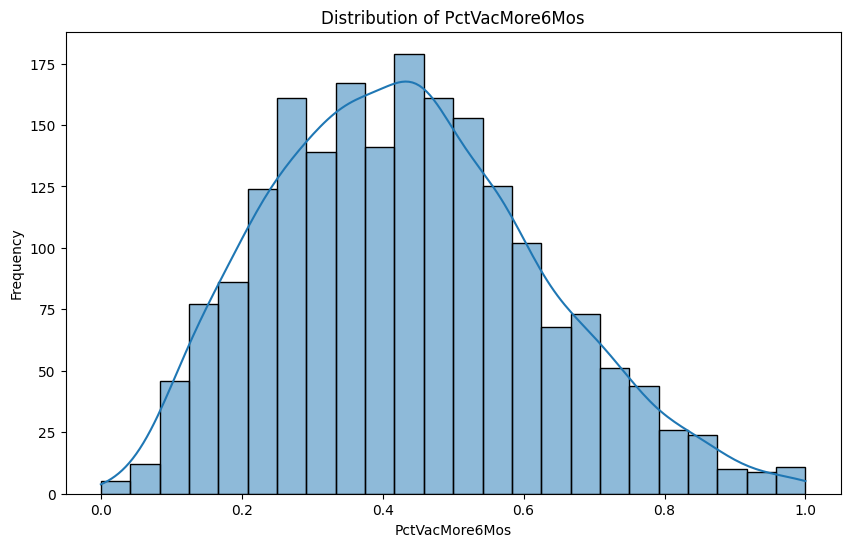

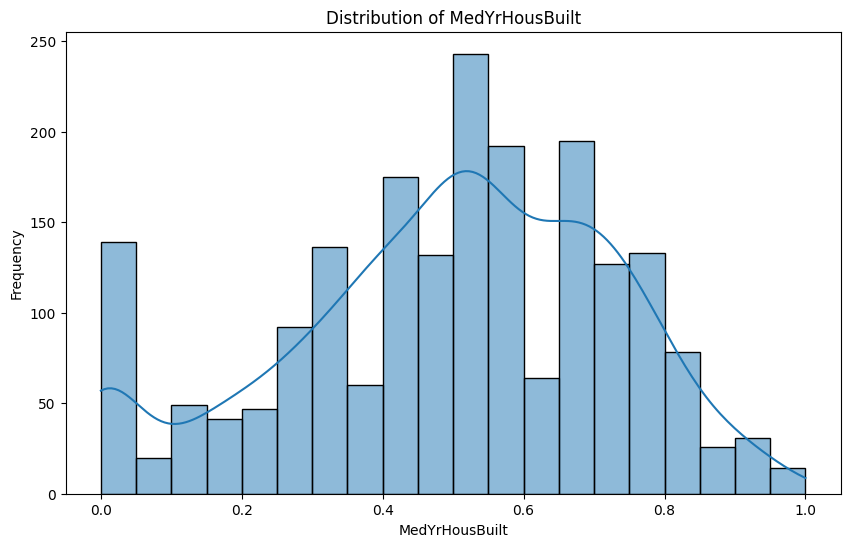

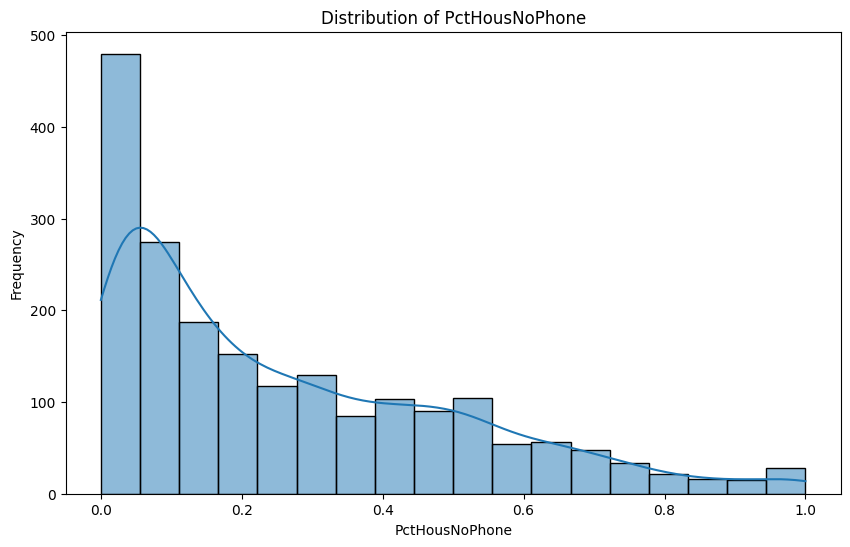

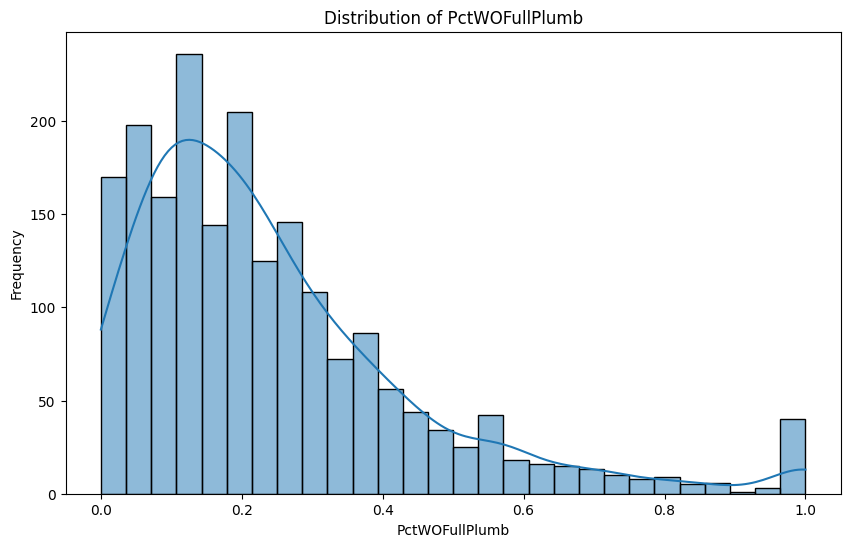

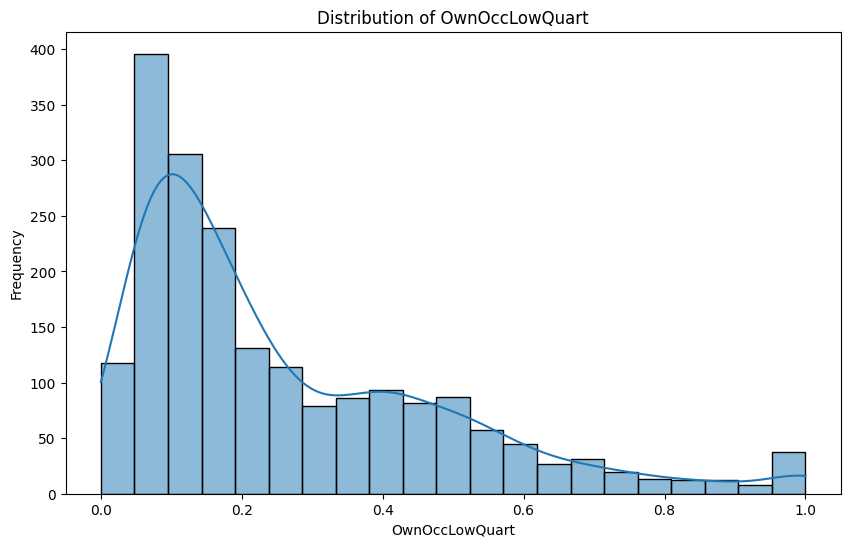

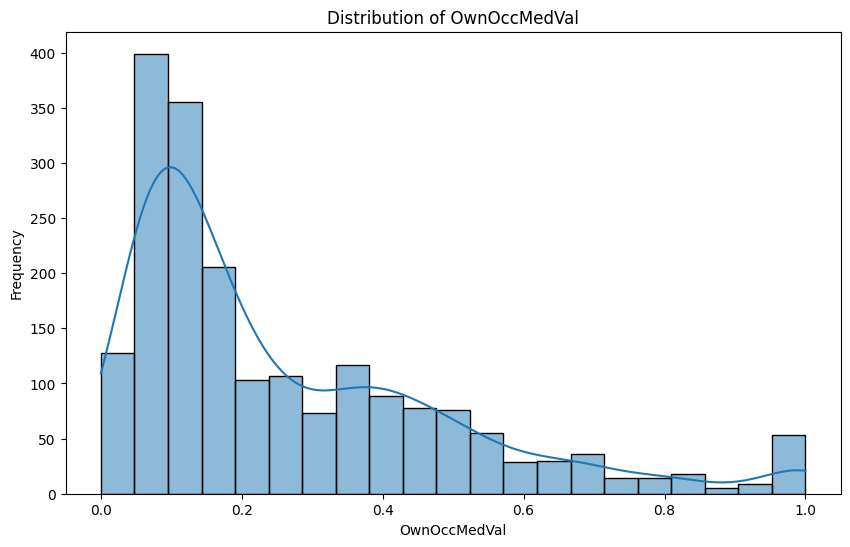

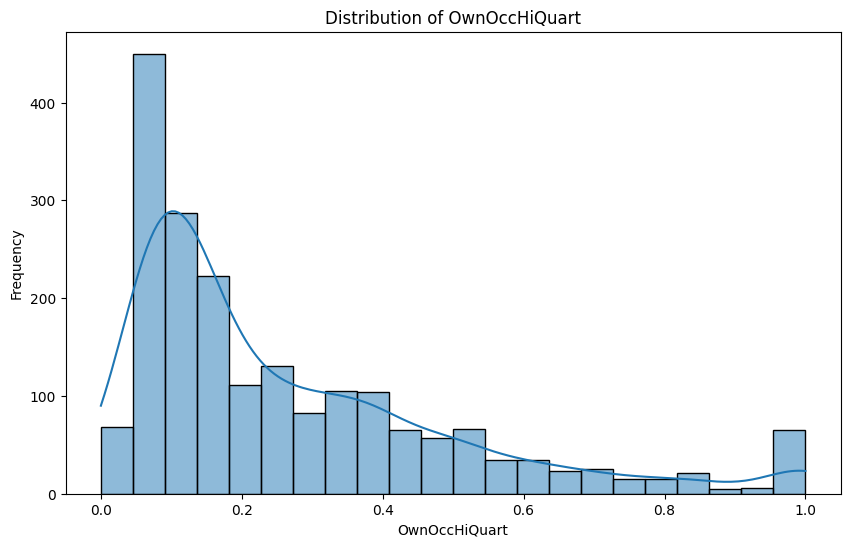

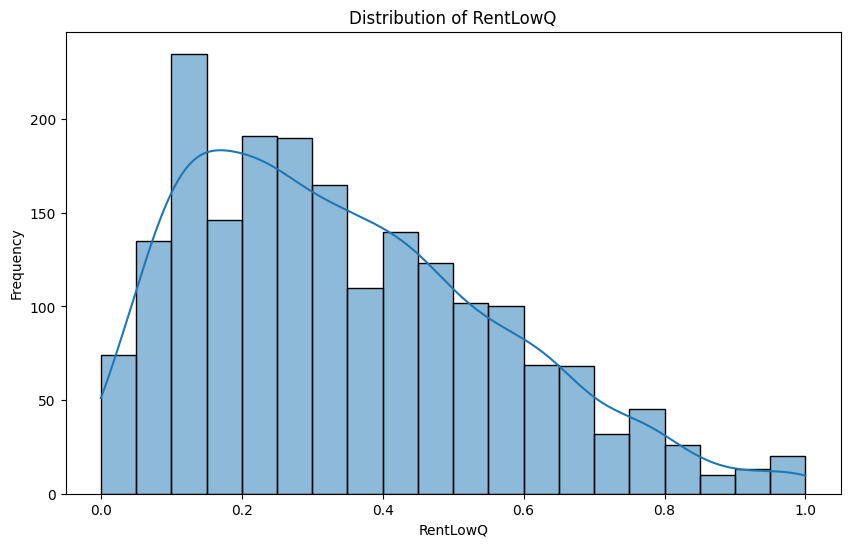

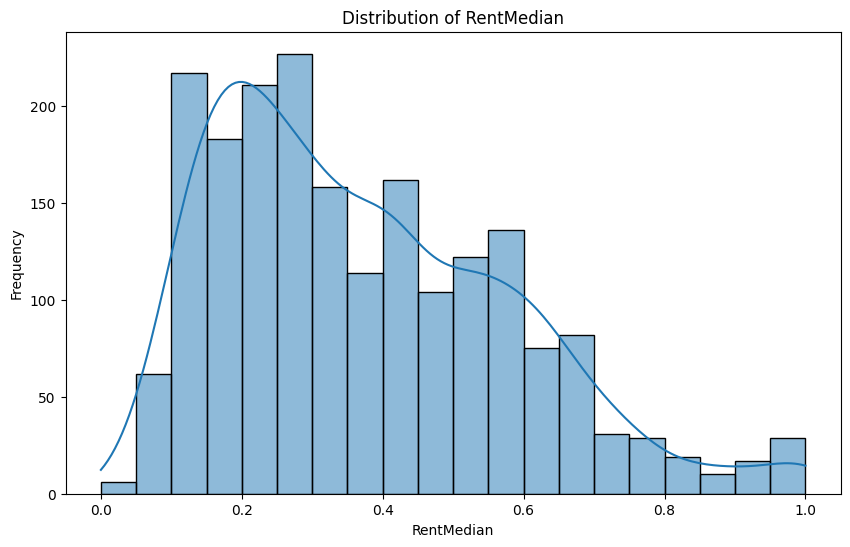

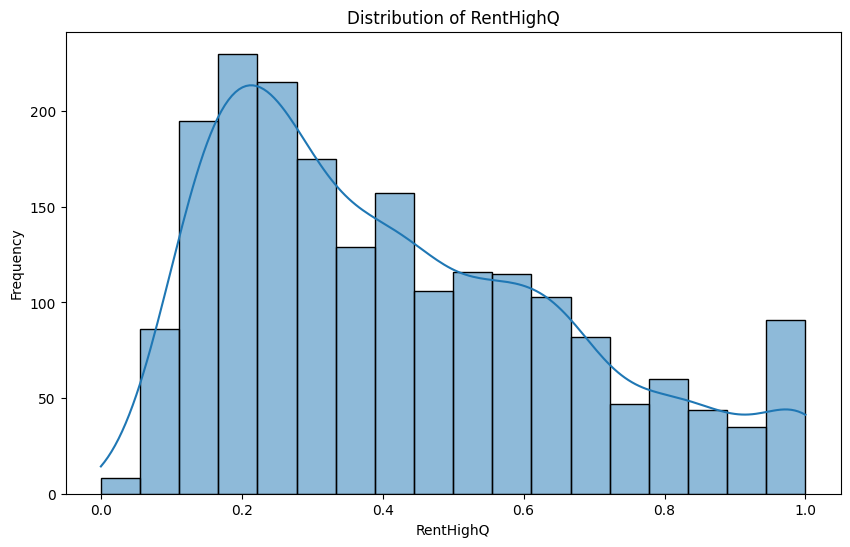

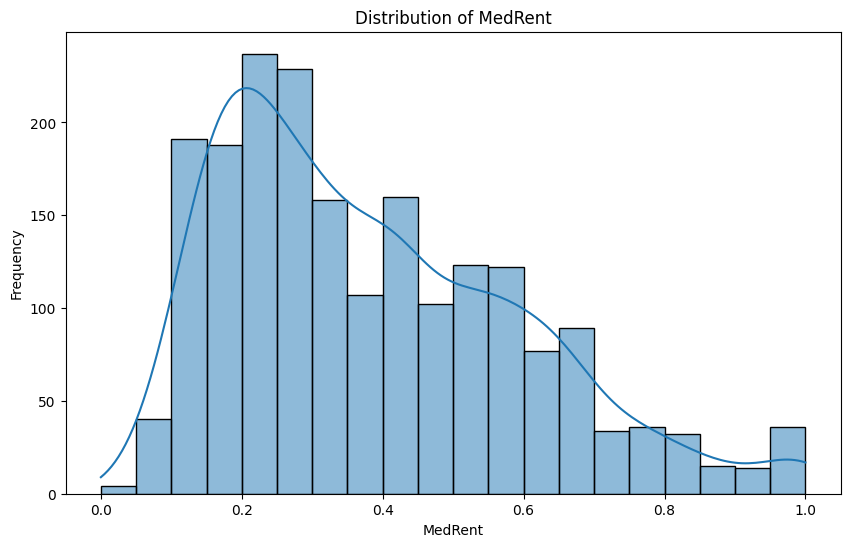

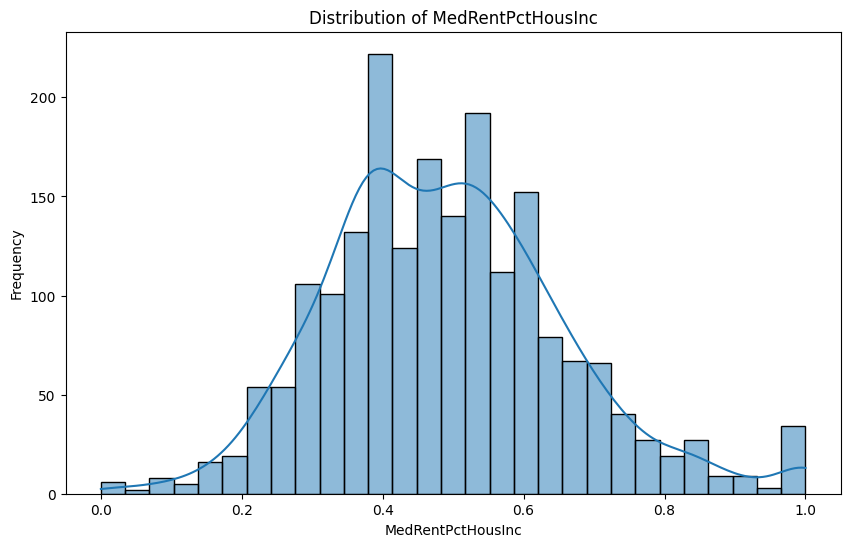

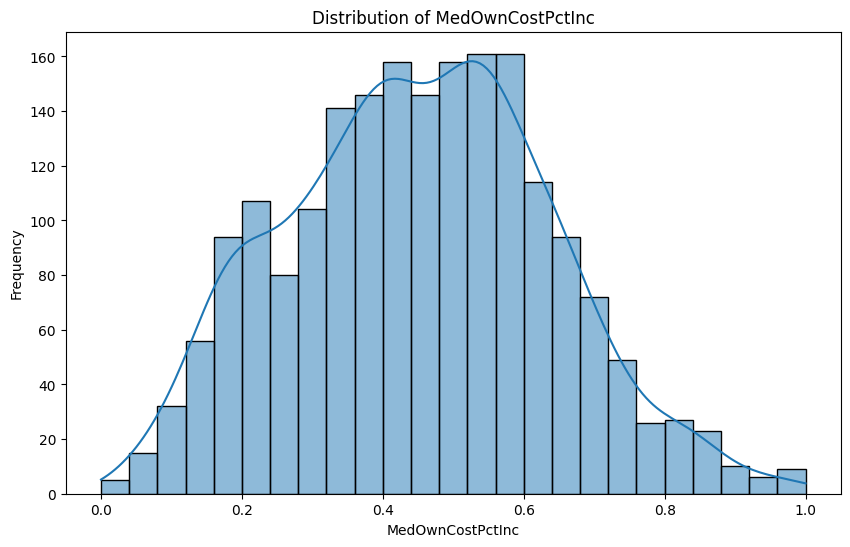

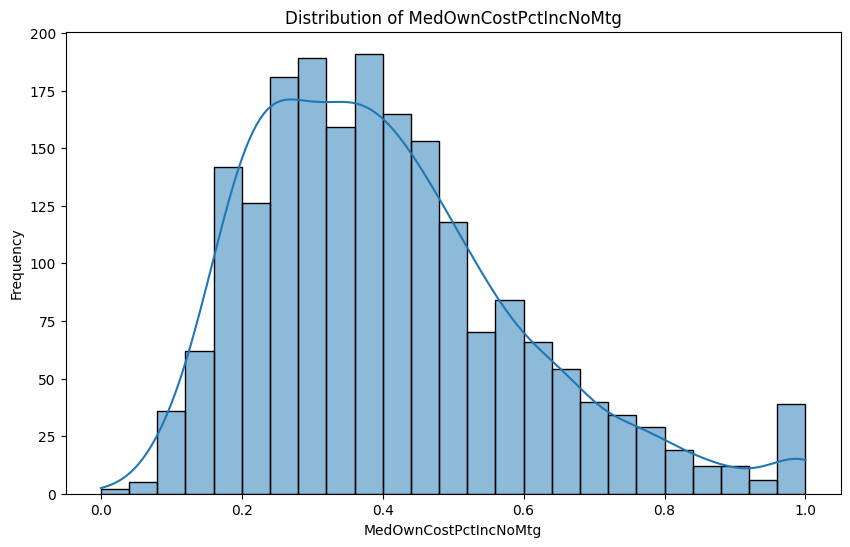

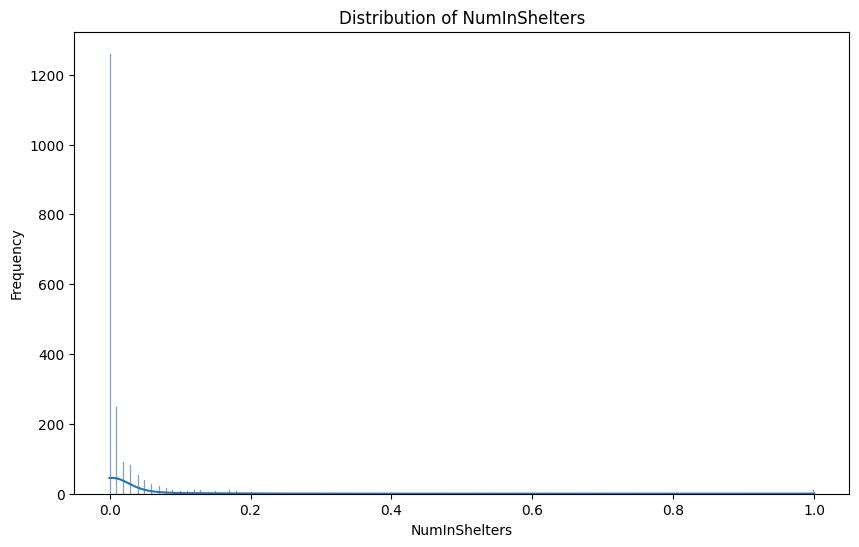

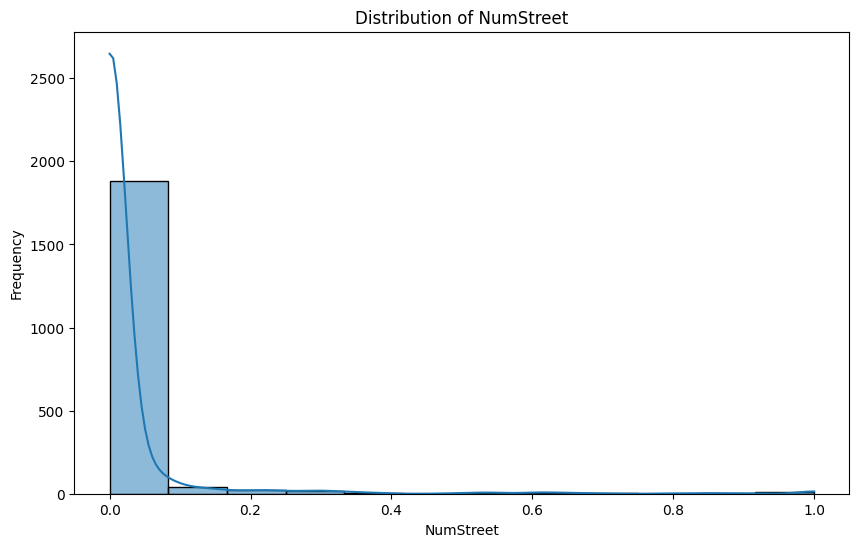

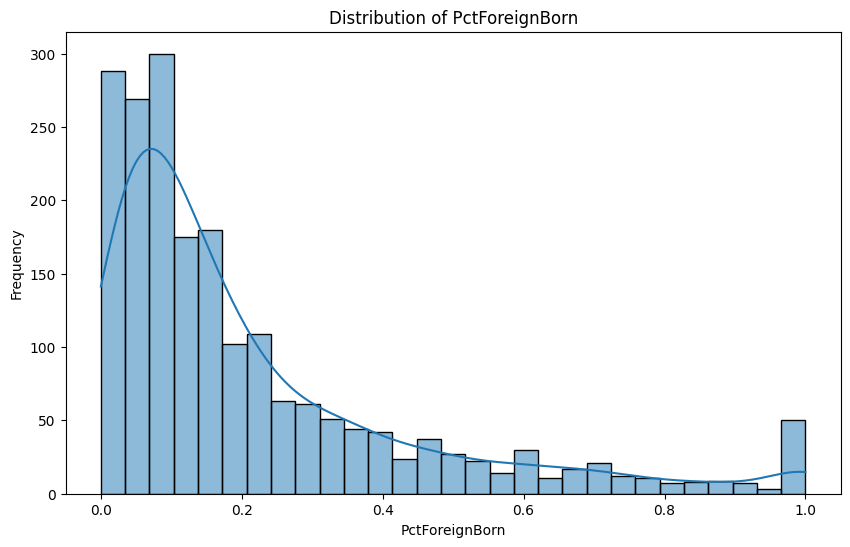

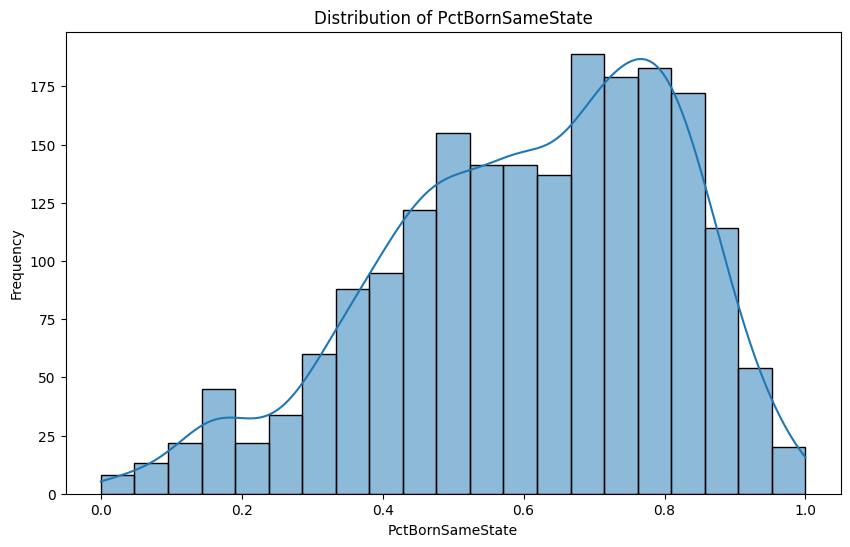

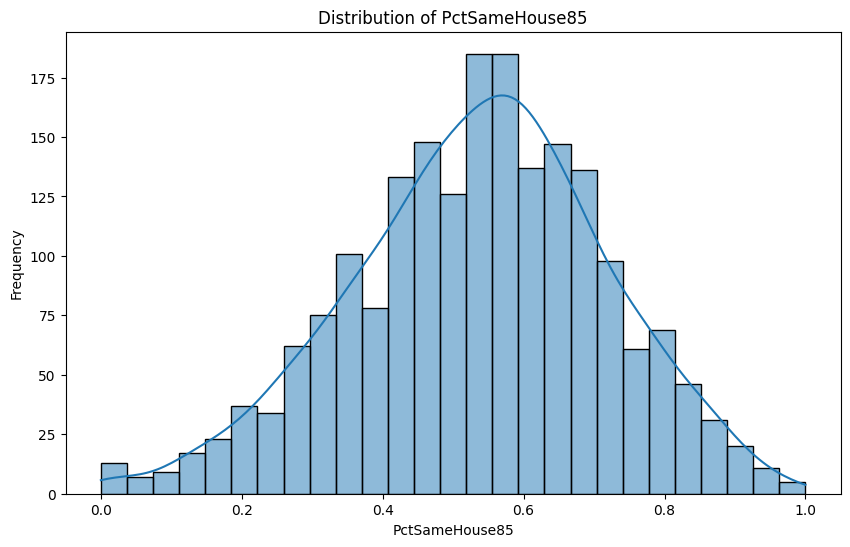

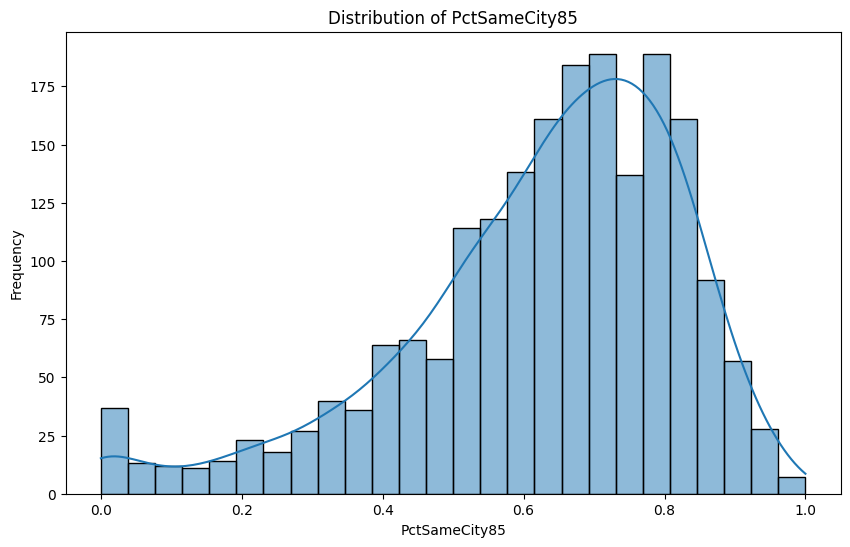

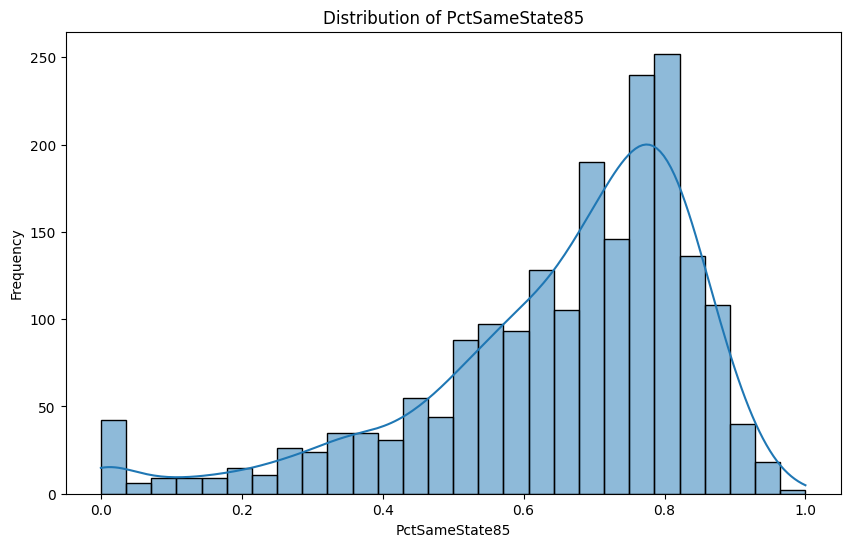

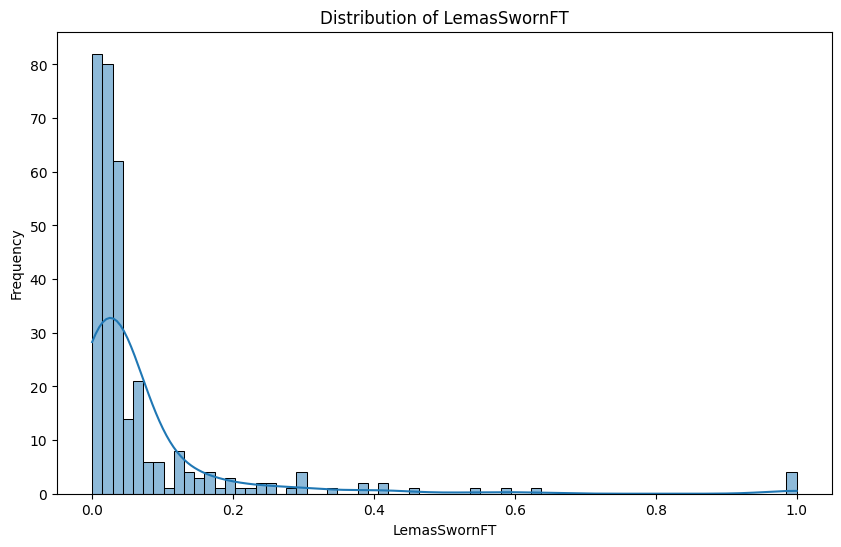

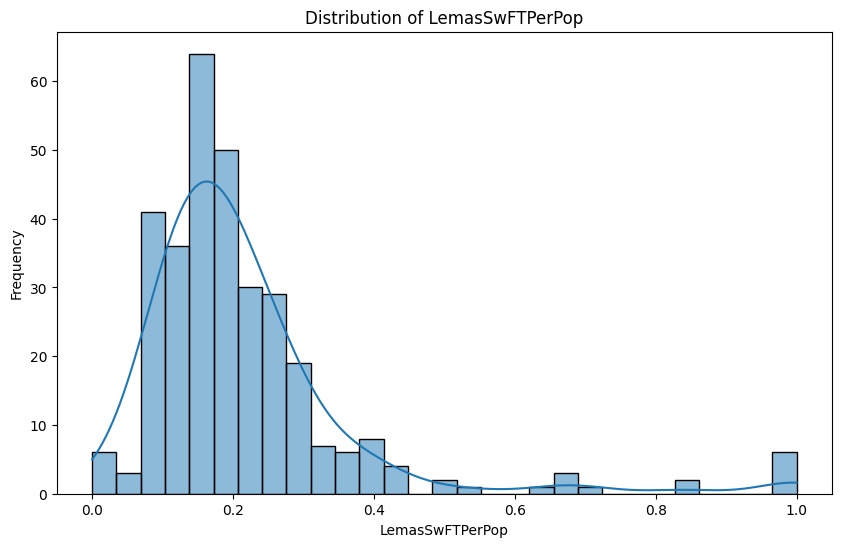

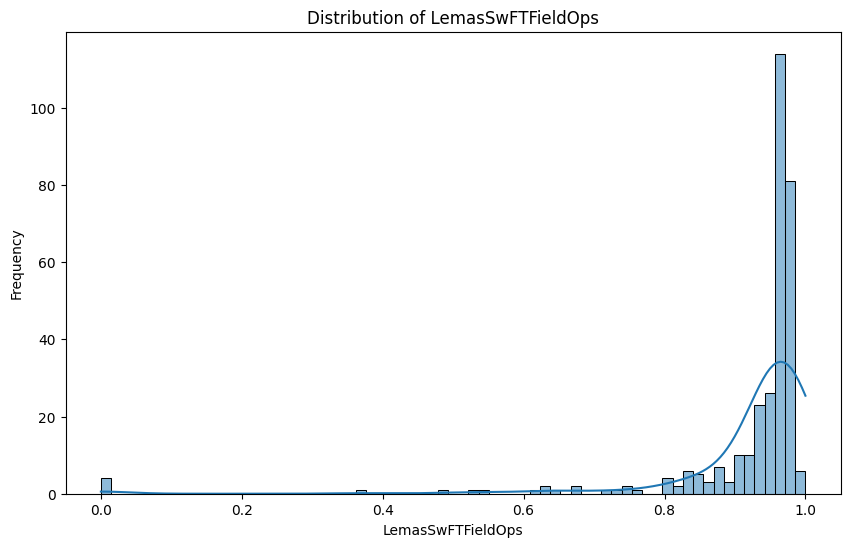

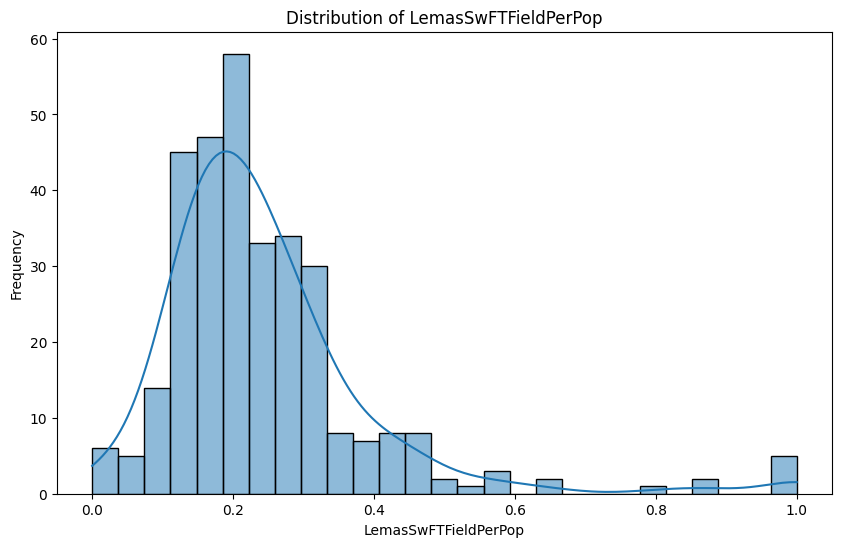

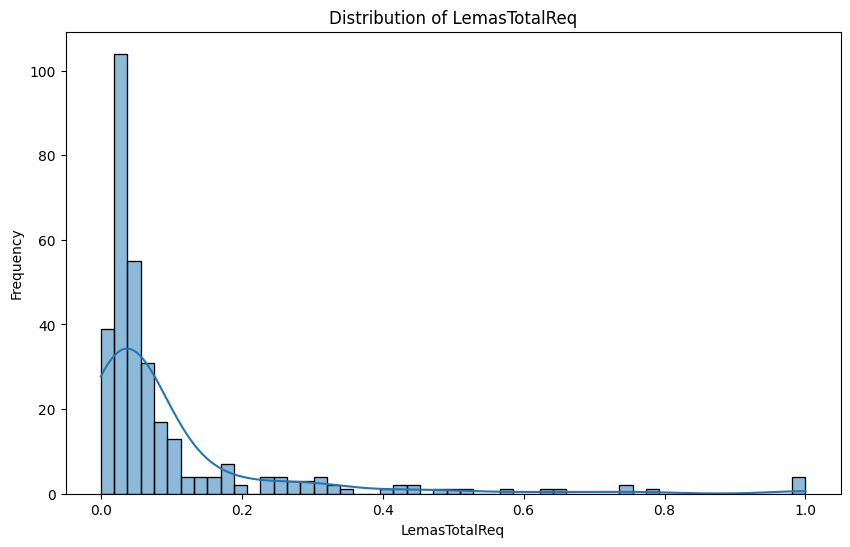

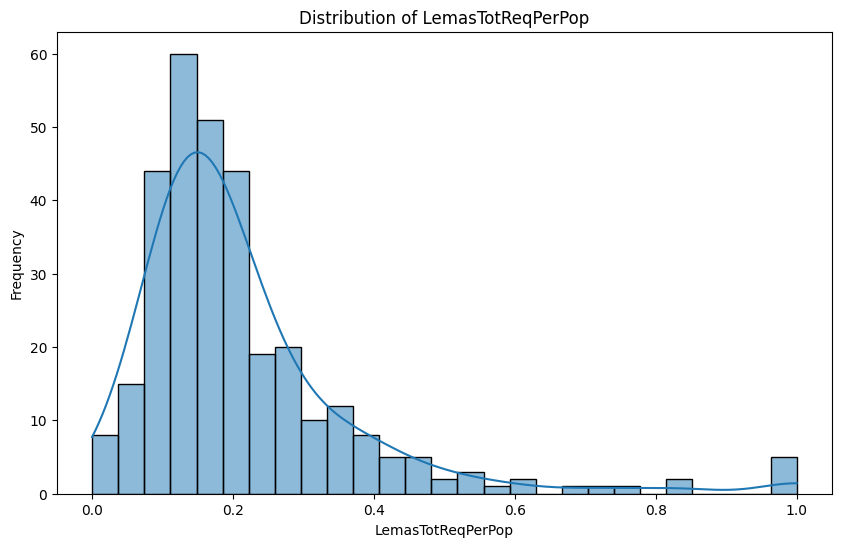

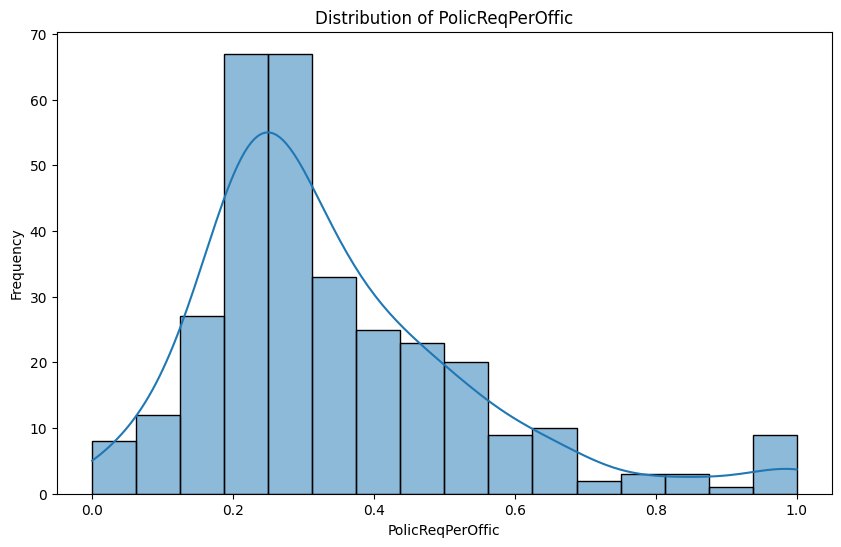

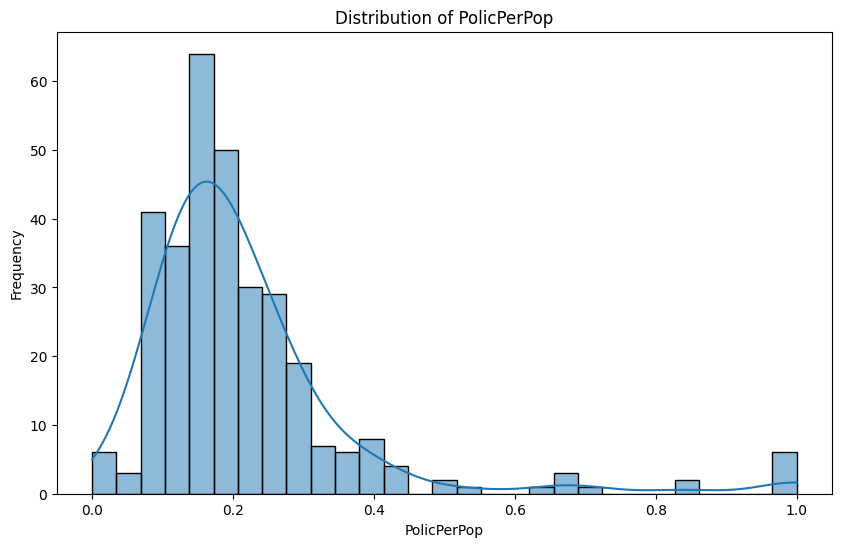

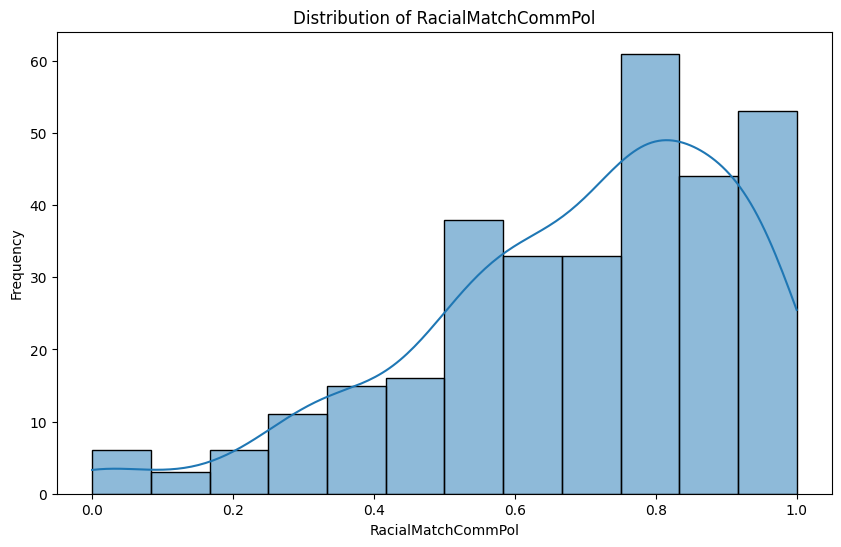

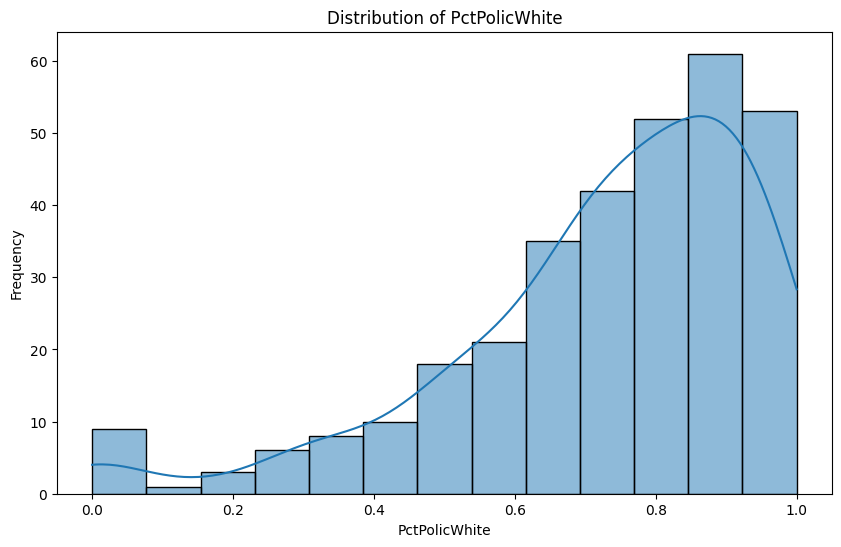

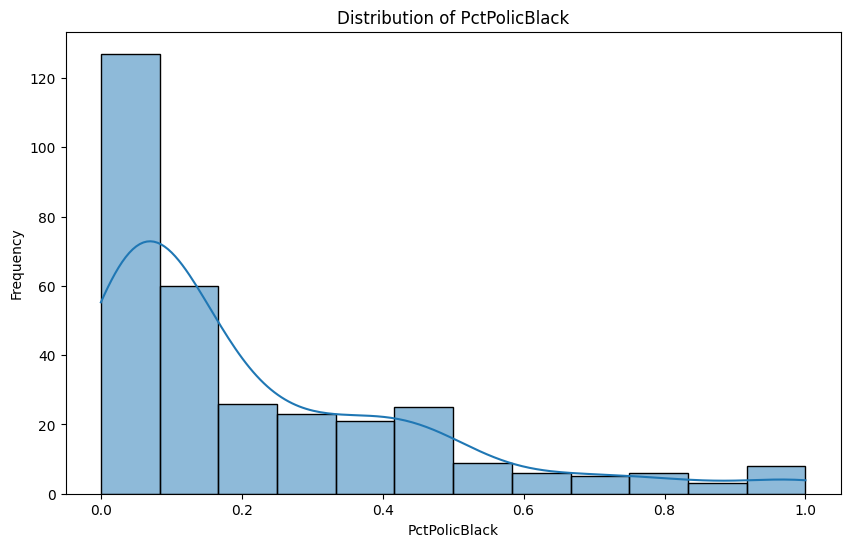

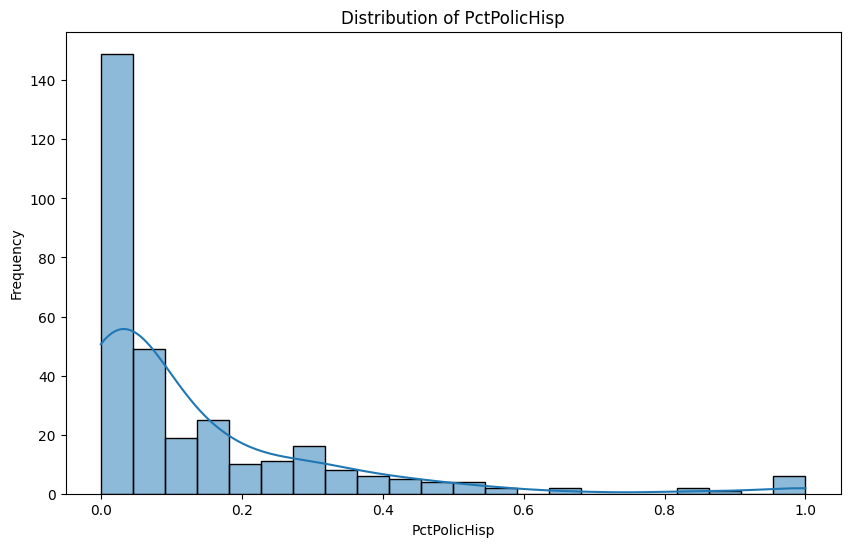

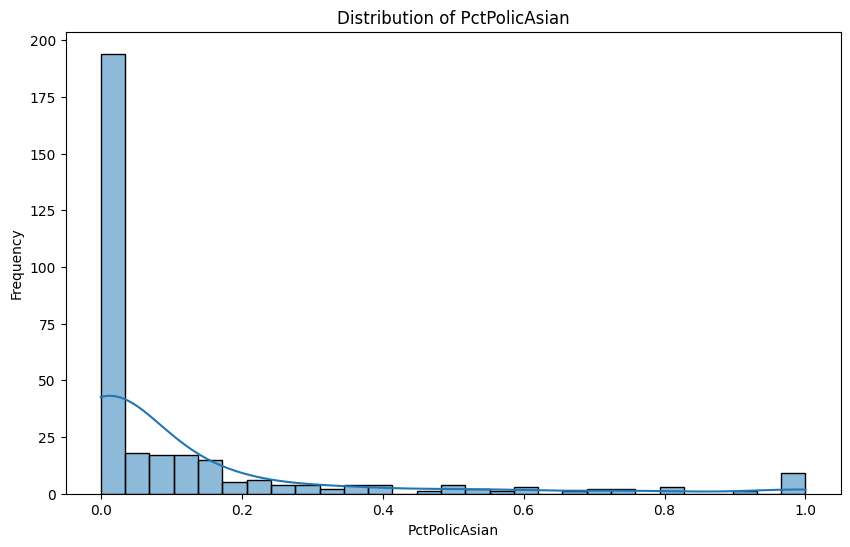

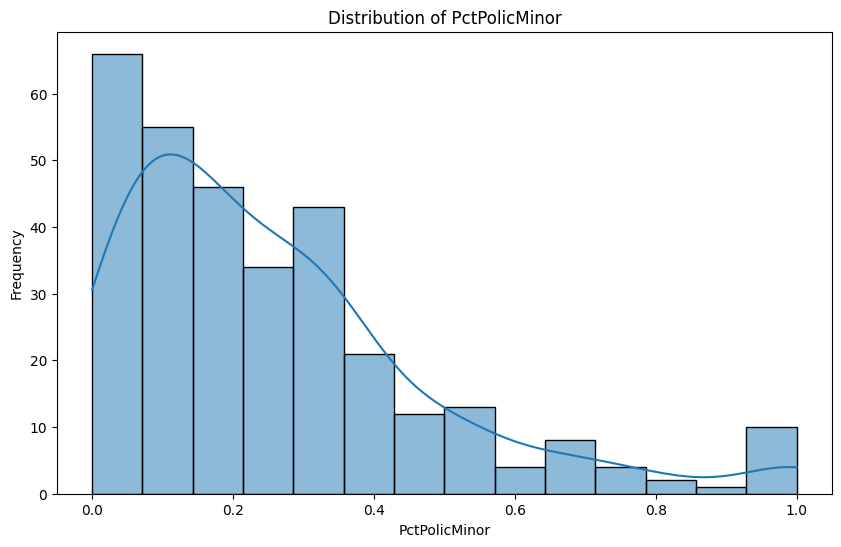

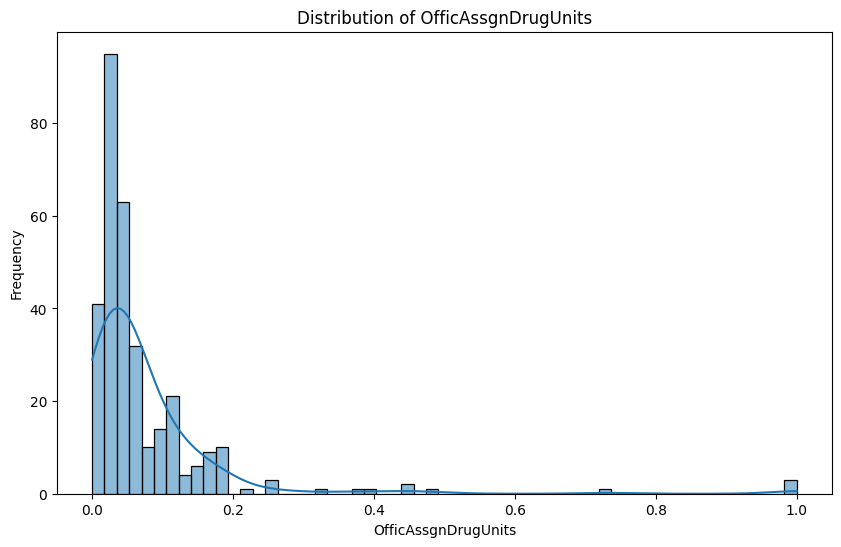

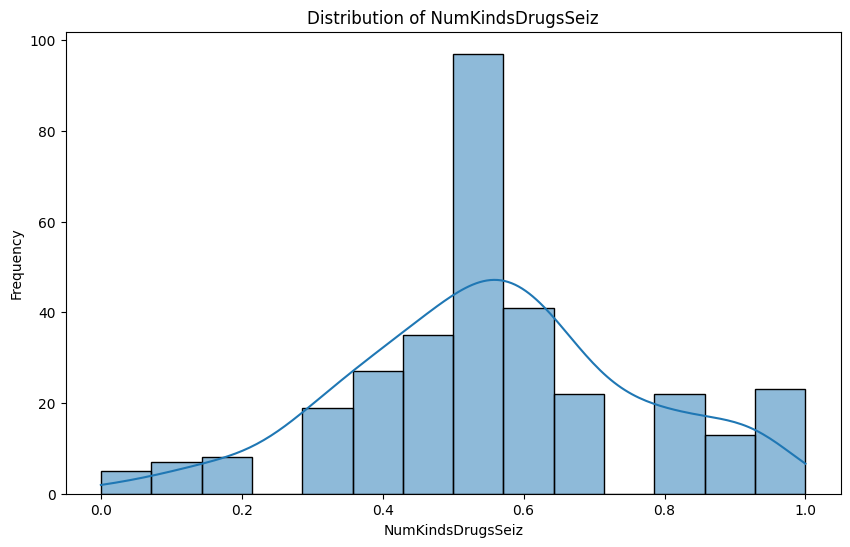

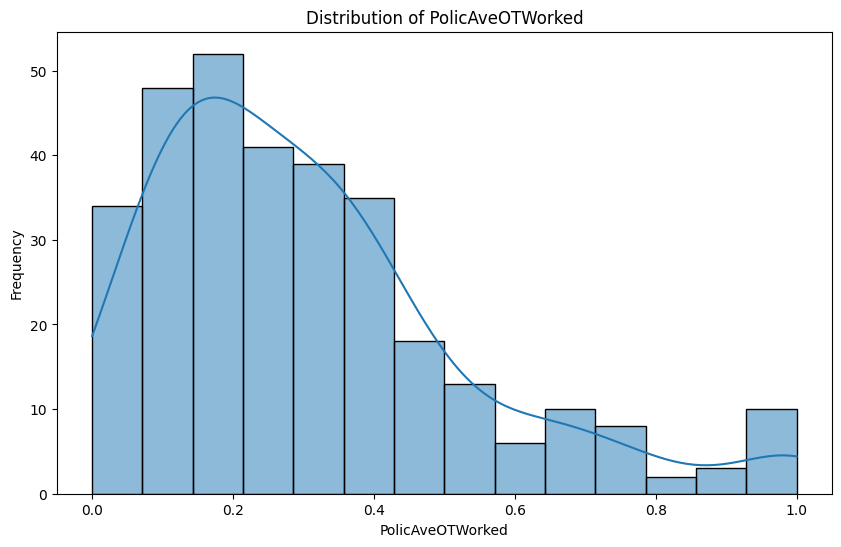

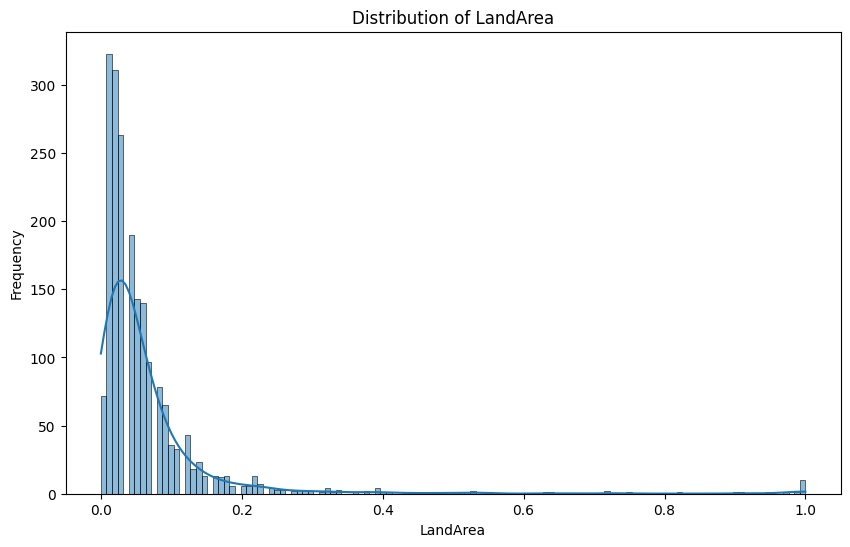

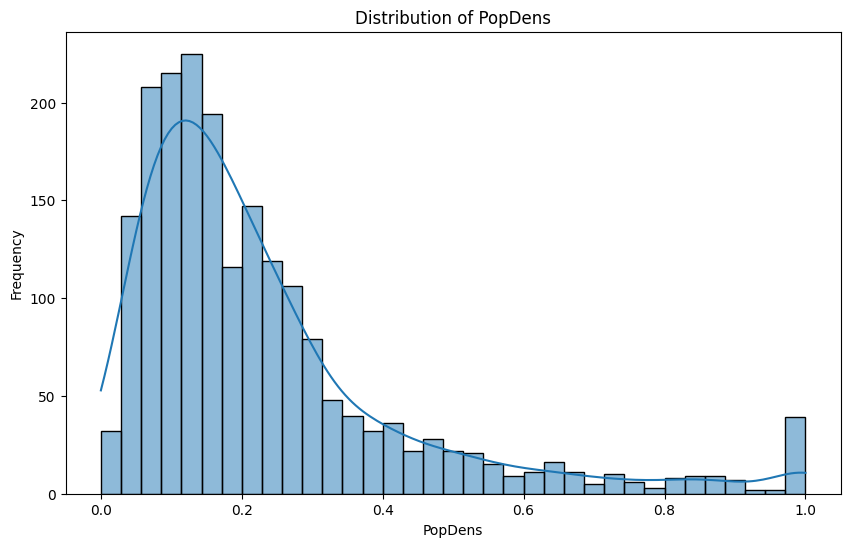

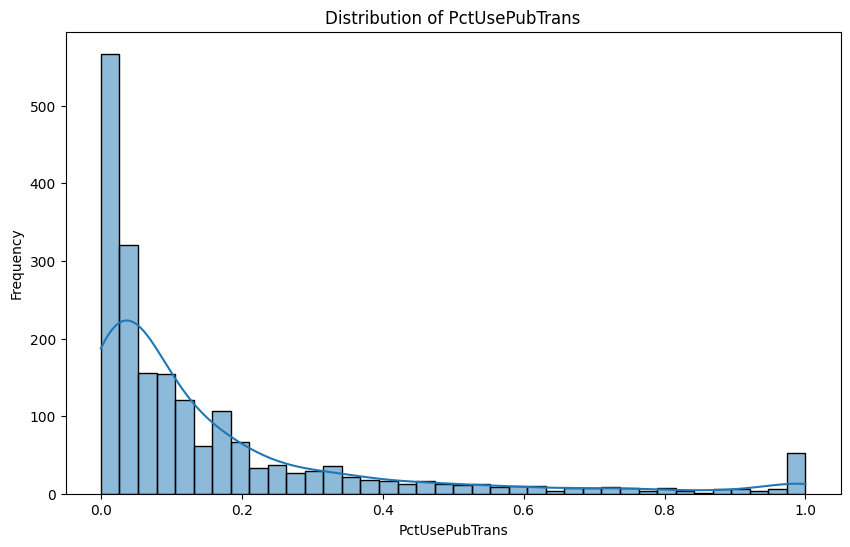

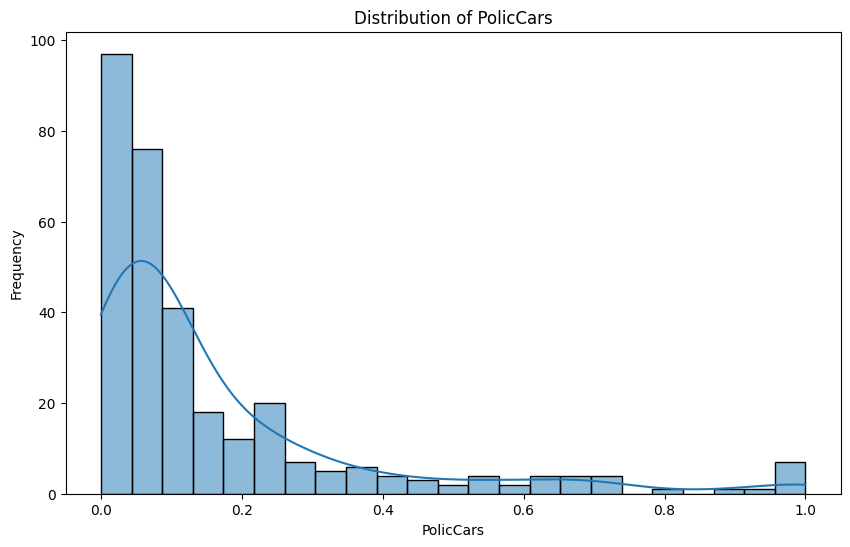

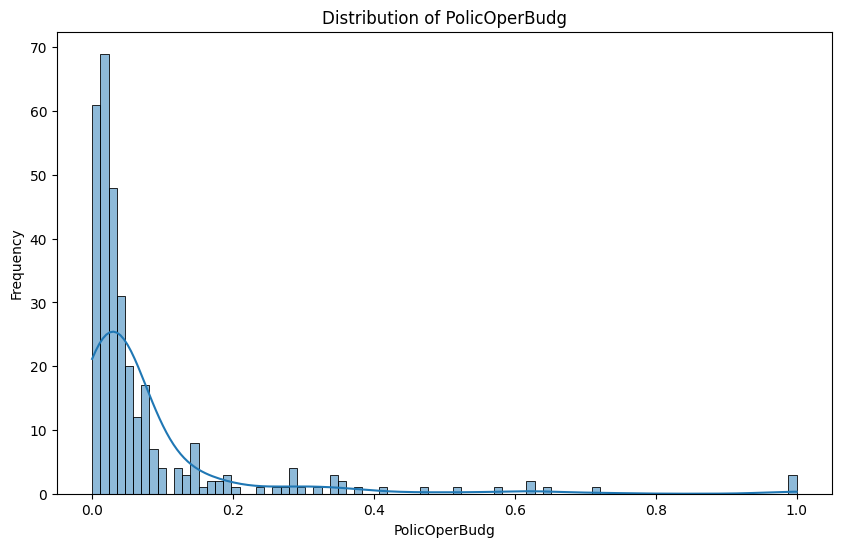

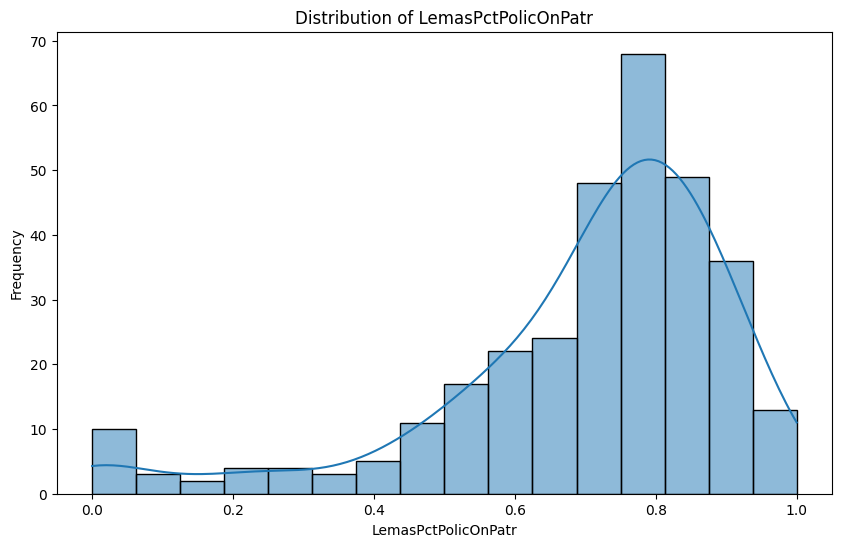

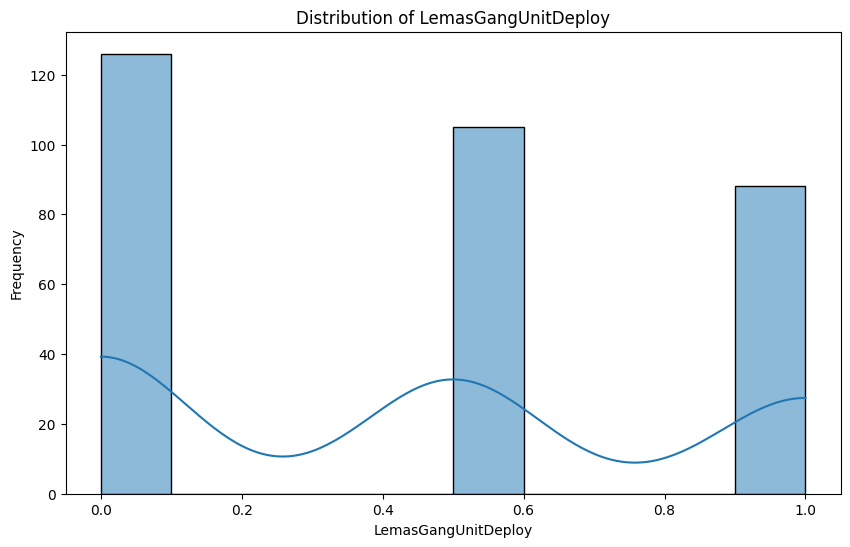

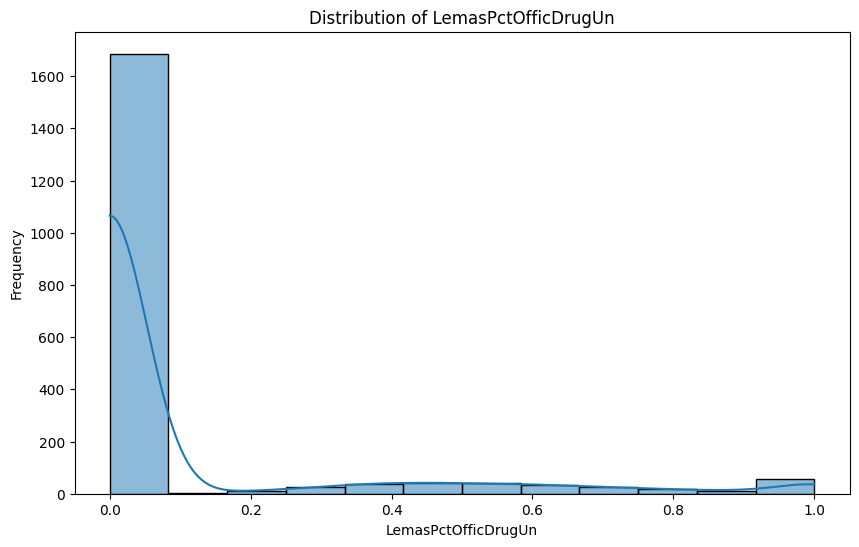

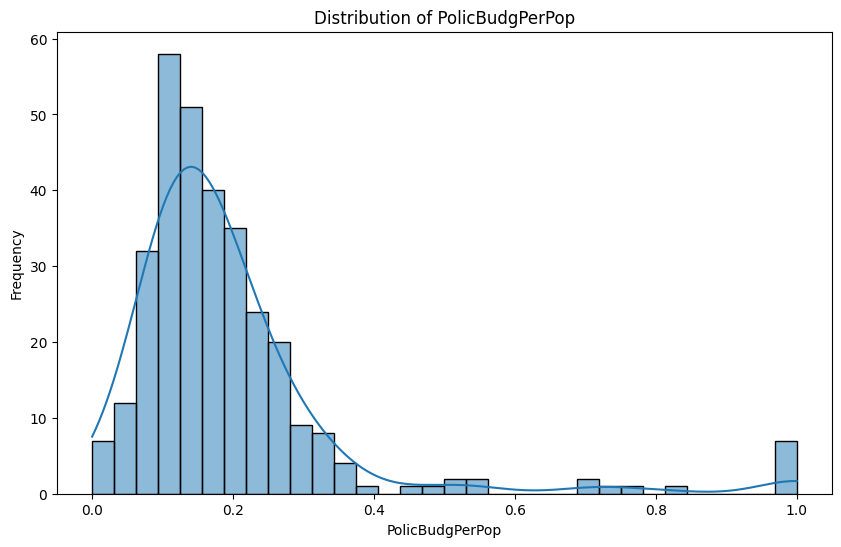

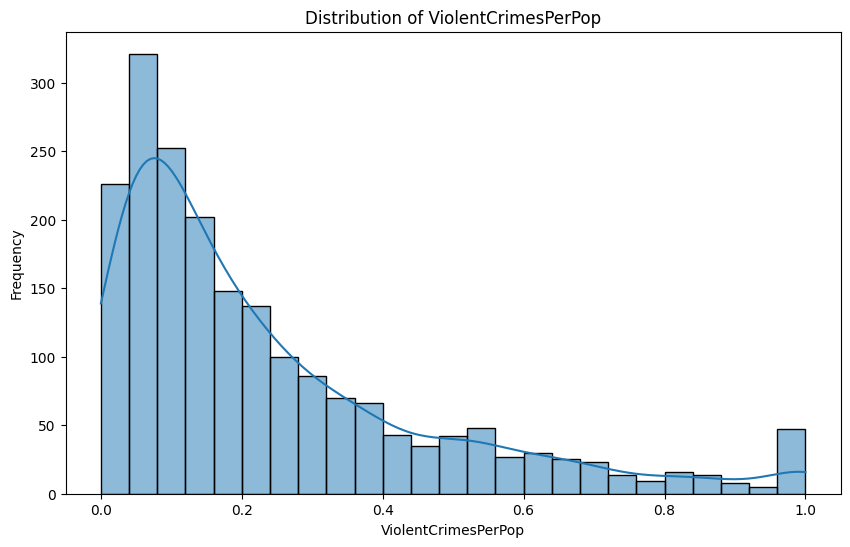

In [5]:
# Step 5: Visualize distributions of numerical features
# Visualizing the distributions helps us see the spread and skewness of numerical features.
# The Output from this is quite long so we collapsed it in the notebook for now.
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

print("\nVisualizing distributions of numerical features:")
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

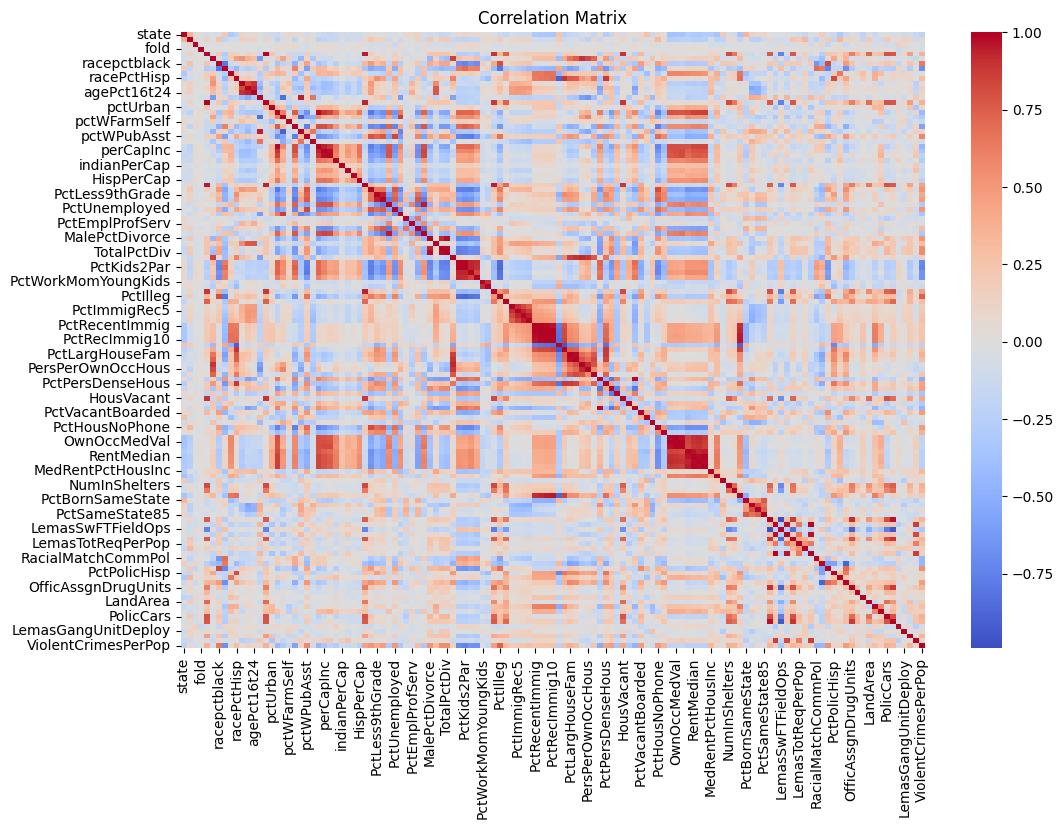

In [6]:
# Step 6: Explore relationships between features
# We create a correlation matrix to understand the relationships between numerical features.
# The initial one is very large so we will later create another one where we explore more in detail
corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix:
Analysis:

The correlation matrix highlights which features are strongly correlated. For example, PctKids2Par and PctFam2Par have high positive correlations with each other, which is expected as both measure family structure.
Negative correlations are seen between racePctBlack and racePctWhite, indicating that as the percentage of one race increases, the other decreases.
Strong correlations are also seen within economic features, such as medIncome and medFamInc.
Takeaway: These correlations can help in feature selection and understanding multicollinearity. Features that are highly correlated might need to be handled carefully during modeling to avoid redundancy.

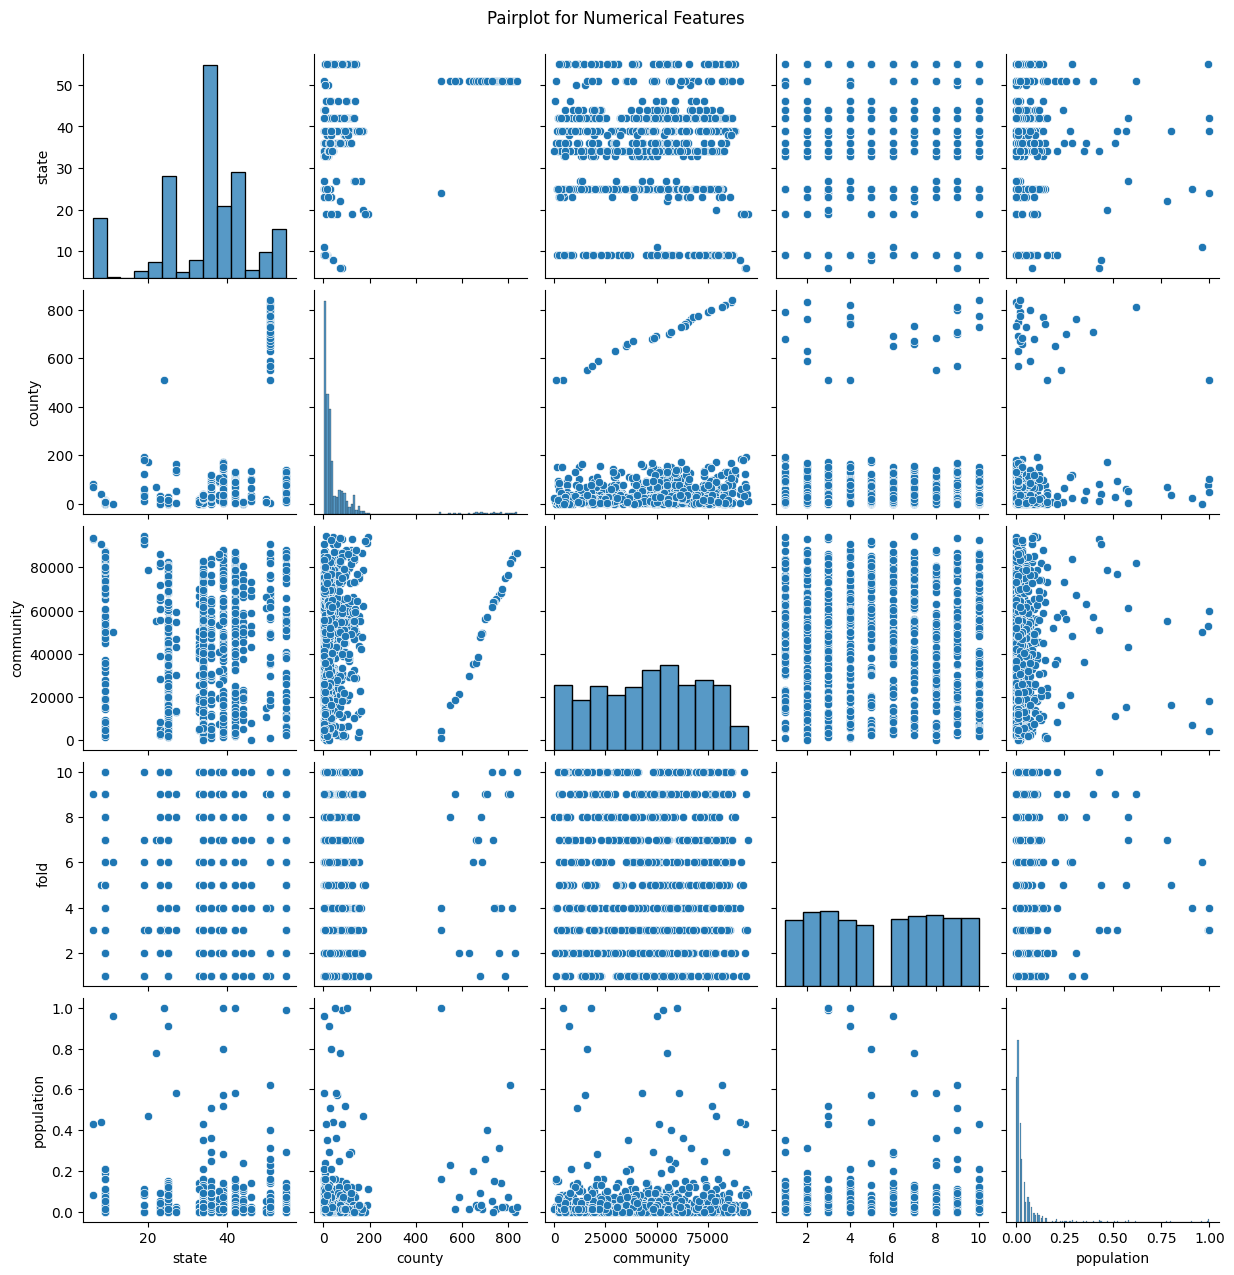

In [7]:
# Pairplot for a subset of numerical features
# This helps us visualize the relationships between pairs of numerical features.
sample_numerical_features = numerical_features[:5]  # Take first 5 numerical features for simplicity
sns.pairplot(data[sample_numerical_features].dropna())
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()

Pairplot for Numerical Features:
Analysis:

The pairplot shows scatter plots between pairs of numerical features, highlighting relationships and trends.
For example, state vs. county shows some clustering which indicates regional differences.
population shows a right-skewed distribution, meaning most communities have smaller populations.
Takeaway: The visualizations suggest there are regional patterns and demographic trends that need to be considered. Clusters in certain scatter plots could indicate sub-groups within the data which might have different behaviors or biases.


Distribution of target variable (ViolentCrimesPerPop):
ViolentCrimesPerPop
0.03    0.052156
0.04    0.046138
0.06    0.043129
0.05    0.040120
0.02    0.037111
          ...   
0.79    0.001003
0.77    0.000502
0.89    0.000502
0.94    0.000502
0.96    0.000502
Name: proportion, Length: 98, dtype: float64


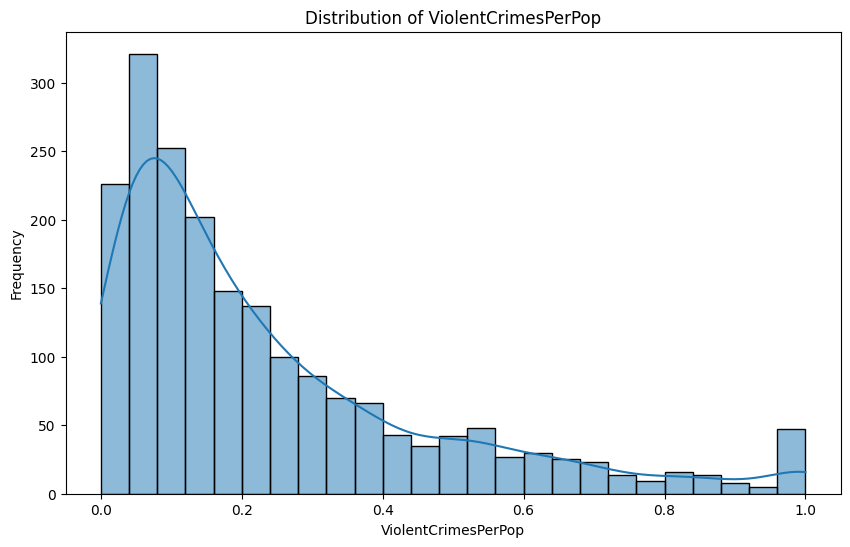

In [8]:
# Step 7: Examine target variable distributions and relationships with other features
# The target variable for this analysis is ViolentCrimesPerPop.
target = 'ViolentCrimesPerPop'
print(f"\nDistribution of target variable ({target}):")
print(data[target].value_counts(normalize=True))

# Visualize target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[target].dropna(), kde=True)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.show()

Distribution of ViolentCrimesPerPop:
Analysis:

The distribution of ViolentCrimesPerPop is right-skewed, meaning most communities have low violent crime rates, with a few having very high rates.
This skewness suggests that crime rates are not evenly distributed and some communities are significantly safer than others.
Takeaway: The right-skewed nature of crime rates indicates potential outliers and suggests that certain communities need more attention. This uneven distribution will be important to address in bias mitigation to ensure that the model does not disproportionately affect communities with lower crime rates.

In [9]:
# Relationship between target and other features
# We'll explore how the target variable relates to categorical features.
# Create bins for the target variable to use it as hue in countplot
data['target_bins'] = pd.cut(data[target], bins=3, labels=['low', 'medium', 'high'])

categorical_features = data.select_dtypes(include=[object]).columns.tolist()
for feature in categorical_features:
    if feature != 'target_bins' and data[feature].nunique() < 30:  # Limit to features with fewer unique categories
        plt.figure(figsize=(12, 6))
        sns.countplot(x=feature, hue='target_bins', data=data)
        plt.title(f'Relationship between {feature} and ViolentCrimesPerPop')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

# Drop the created target_bins column after plotting
data = data.drop(columns=['target_bins'])

In [10]:
# Corrected missing values handling and encoding code
# Step 8: Handling missing values and encoding categorical features
# Fill missing numerical values with mean
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Check if 'communityname' column exists before dropping
if 'communityname' in data.columns:
    data = data.drop(columns=['communityname'])

# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['state', 'county', 'community', 'fold'], drop_first=True)

Top 10 features positively correlated with ViolentCrimesPerPop:
ViolentCrimesPerPop    1.000000
PctIlleg               0.737957
racepctblack           0.631264
pctWPubAsst            0.574665
FemalePctDiv           0.556032
TotalPctDiv            0.552777
MalePctDivorce         0.525407
PctPopUnderPov         0.521877
PctUnemployed          0.504235
PctHousNoPhone         0.488243
Name: ViolentCrimesPerPop, dtype: float64

Top 10 features negatively correlated with ViolentCrimesPerPop:
medIncome          -0.424221
medFamInc          -0.439108
PctHousOwnOcc      -0.470683
PctPersOwnOccup    -0.525491
pctWInvInc         -0.576324
PctTeen2Par        -0.661582
PctYoungKids2Par   -0.666059
racePctWhite       -0.684770
PctFam2Par         -0.706667
PctKids2Par        -0.738424
Name: ViolentCrimesPerPop, dtype: float64


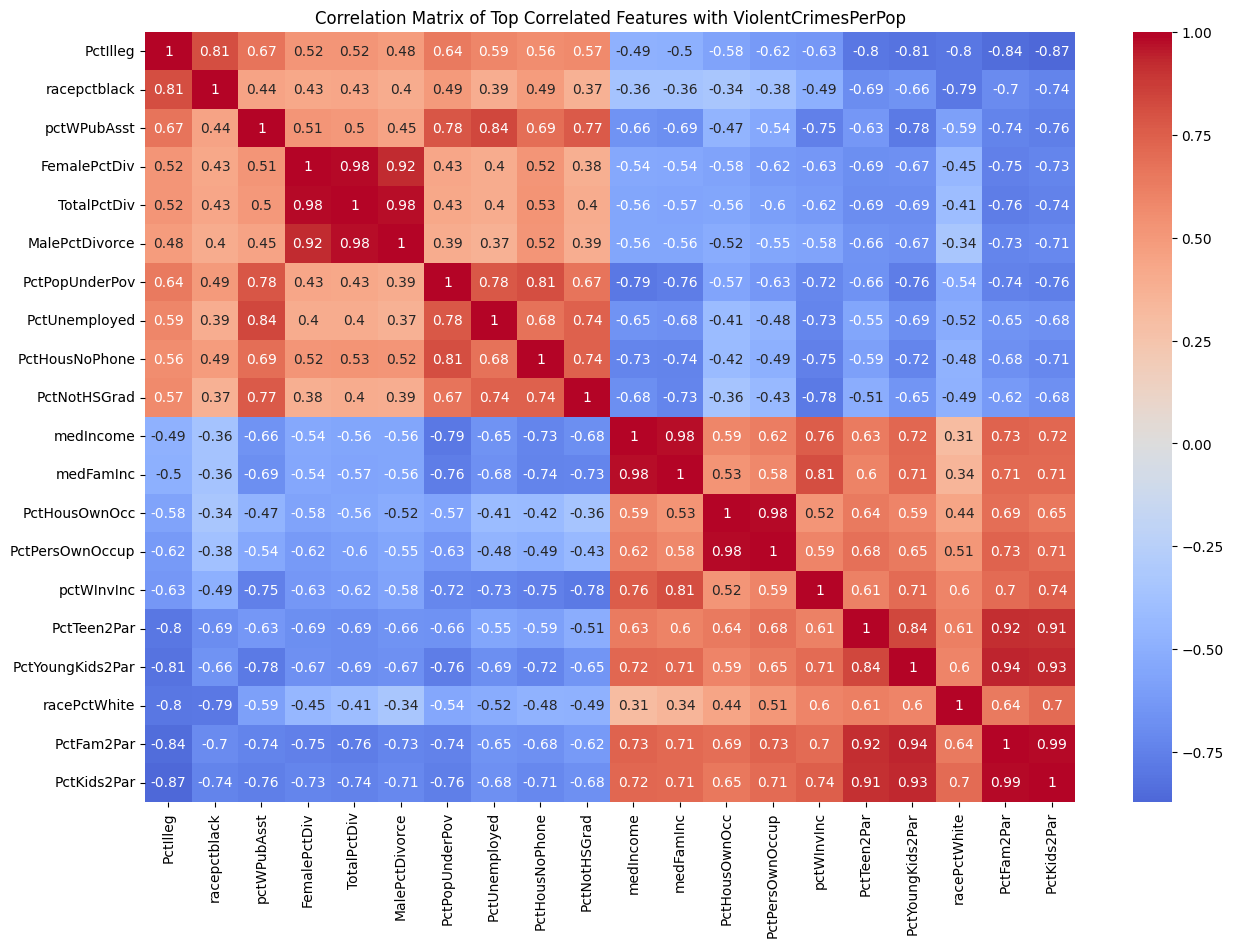

In [11]:
# Step 9: Correlation with the target variable
# We analyze the correlation of features with the target variable.
corr_with_target = data.corr()['ViolentCrimesPerPop'].sort_values(ascending=False)
print("Top 10 features positively correlated with ViolentCrimesPerPop:")
print(corr_with_target.head(10))
print("\nTop 10 features negatively correlated with ViolentCrimesPerPop:")
print(corr_with_target.tail(10))

# Combine top positive and negative correlated features
top_correlations = corr_with_target.head(11).index.tolist()[1:] + corr_with_target.tail(10).index.tolist()

# Visualizing the correlation matrix of the top correlated features
plt.figure(figsize=(15, 10))
corr_matrix_top_features = data[top_correlations].corr()
sns.heatmap(corr_matrix_top_features, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top Correlated Features with ViolentCrimesPerPop')
plt.show()

Correlation Matrix of Top Correlated Features:
Analysis:

This heatmap shows the top features correlated with ViolentCrimesPerPop.
High positive correlations are seen with features like PctIlleg, racepctblack, and pctWWage. This suggests that higher crime rates are associated with higher percentages of illegal activities, black population, and wage levels.
Negative correlations are seen with features like racePctWhite, PctKids2Par, and medIncome. This suggests that higher crime rates are associated with lower percentages of white population, two-parent families, and median income.
Takeaway: These correlations highlight potential areas of bias. Features that are highly correlated with crime rates could indicate socio-economic and racial biases. These need to be carefully addressed in the modeling and mitigation steps to ensure fairness.

In [12]:
# Step 10: Feature Importance Analysis
# We train a Random Forest model to analyze feature importance.
# Prepare data for modeling
X = data.drop(columns=['ViolentCrimesPerPop'])
y = data['ViolentCrimesPerPop']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 important features:")
print(feature_importance.head(10))

Top 10 important features:
PctIlleg            0.326586
PctKids2Par         0.211458
racePctWhite        0.028118
PctFam2Par          0.021981
NumIlleg            0.012941
FemalePctDiv        0.012610
PctPersDenseHous    0.011056
NumStreet           0.010381
MalePctDivorce      0.009965
TotalPctDiv         0.009354
dtype: float64


Top 10 Features from Random Forest:
Analysis:

The Random Forest model identified PctIlleg (percentage of illegitimate children) and PctKids2Par (percentage of kids in two-parent households) as the most important features in predicting violent crimes.
racePctWhite and PctFam2Par also contribute significantly, indicating that family structure and race are key predictors.
Other important features include NumIlleg (number of illegitimate children), FemalePctDiv (percentage of divorced females), and NumStreet (number of people living on the street).
Takeaway: The model relies heavily on socio-economic and demographic features. This highlights the importance of considering these factors in bias detection. The high importance of race-related features suggests potential racial bias, which needs to be mitigated.

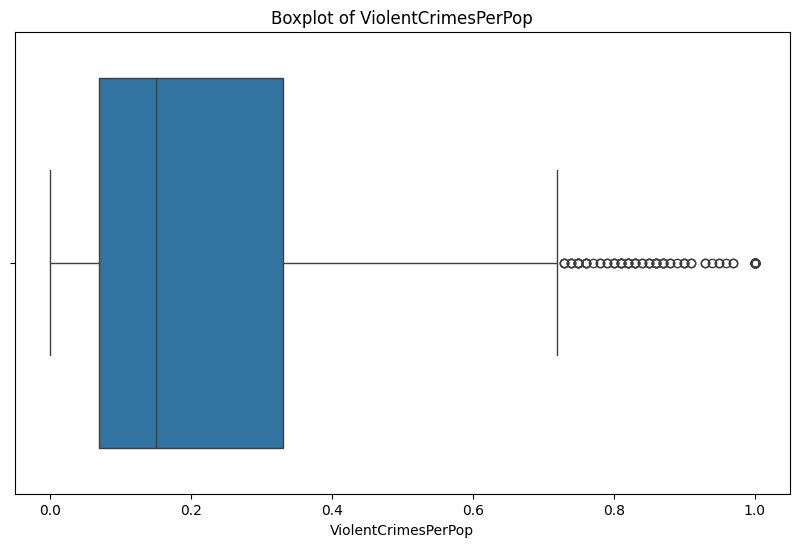

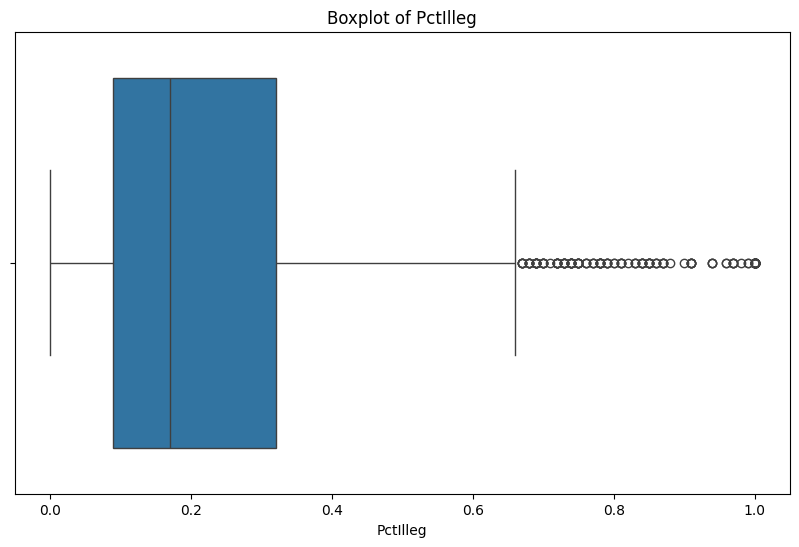

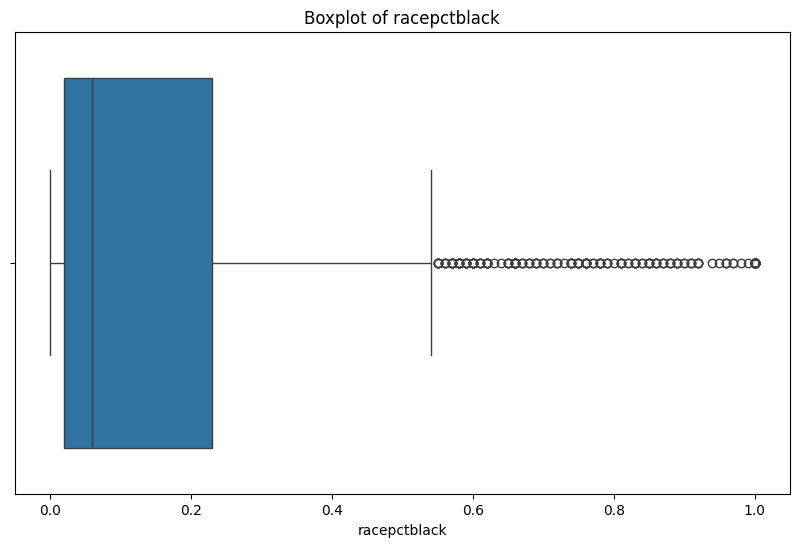

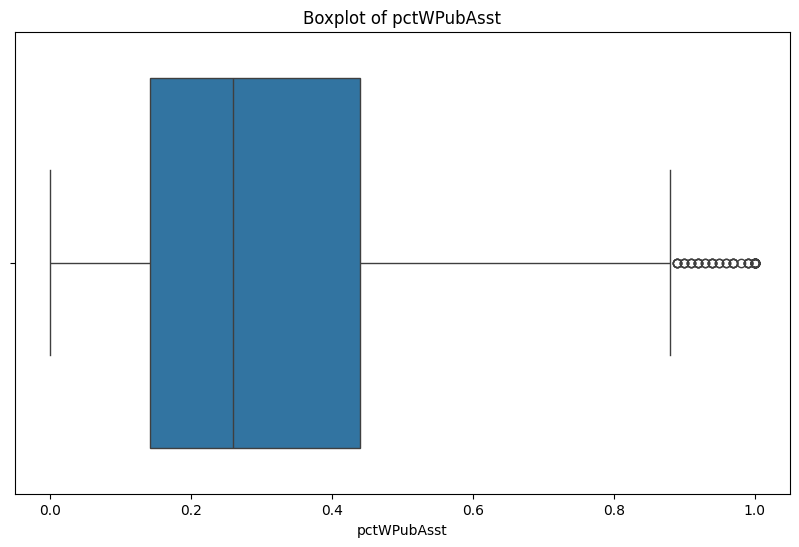

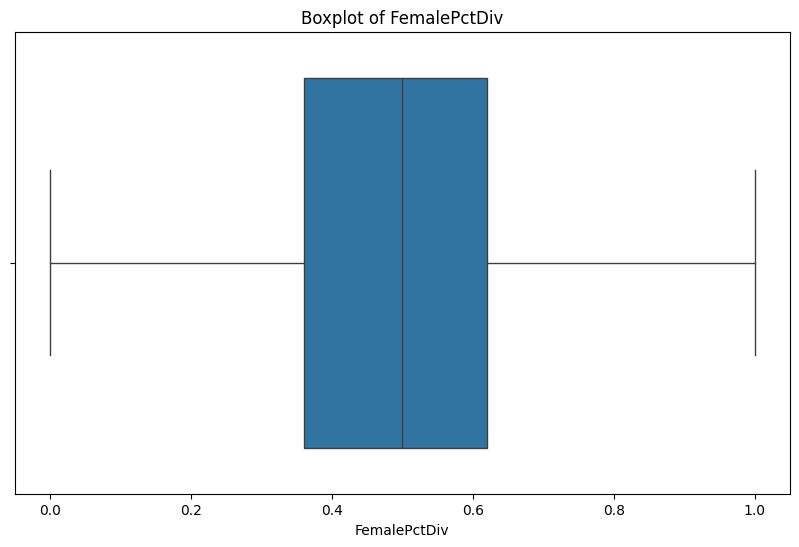

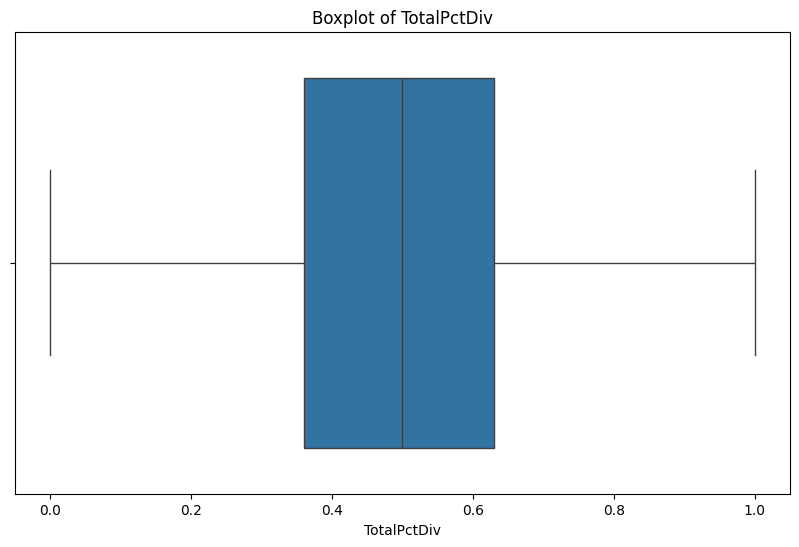

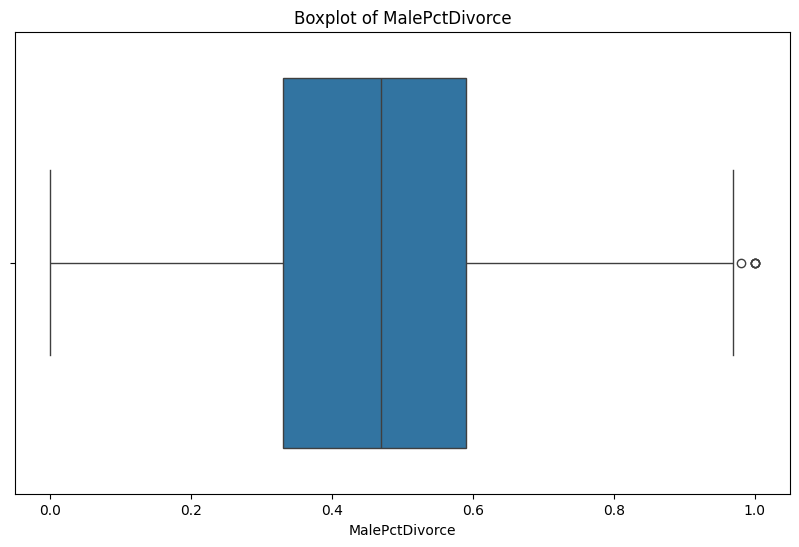

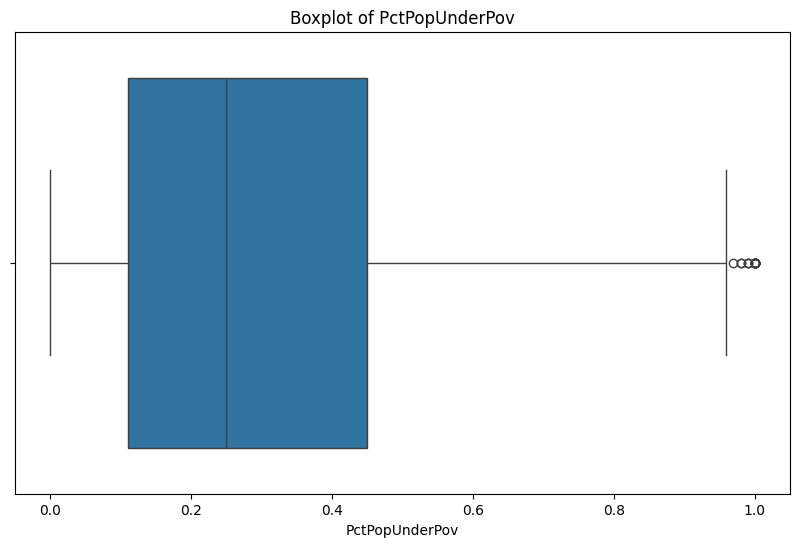

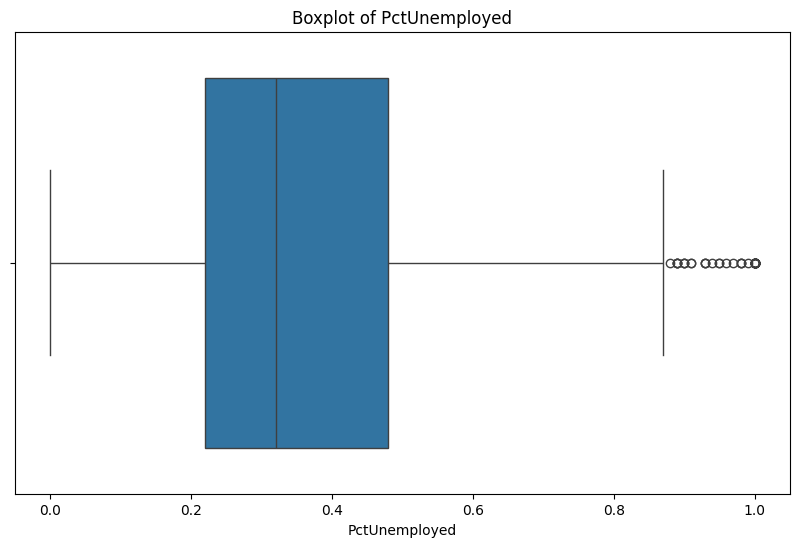

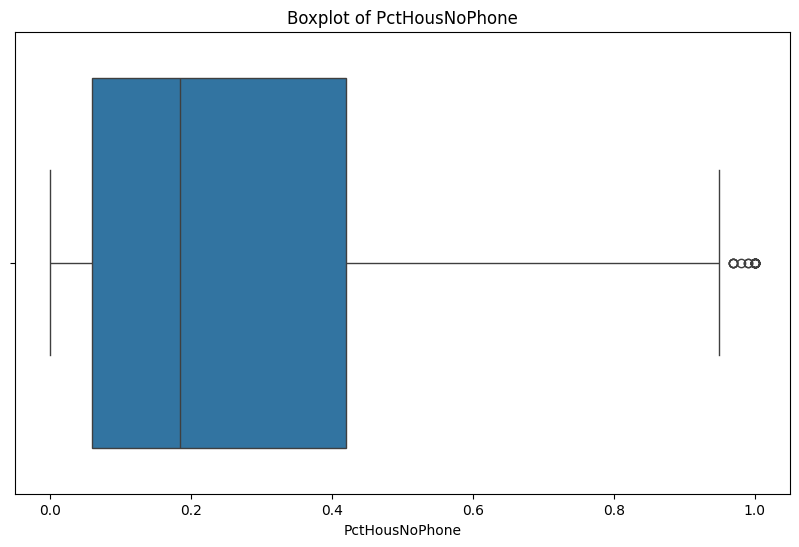

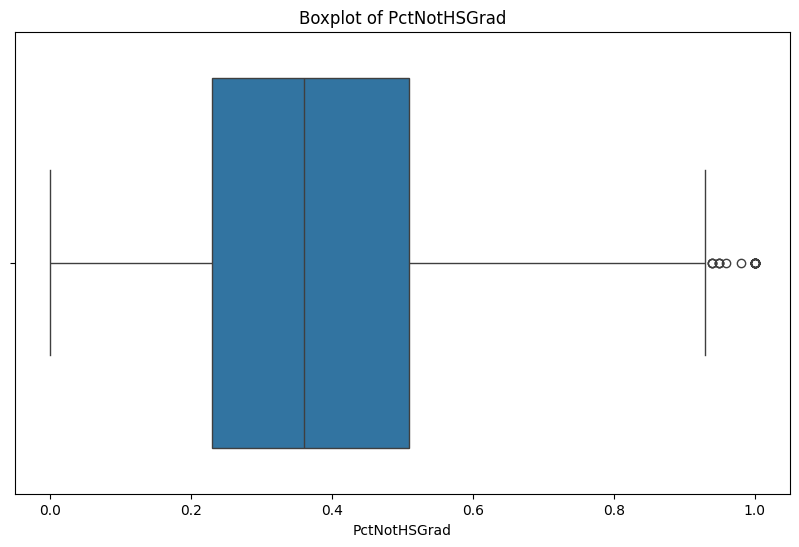

In [13]:
# Step 11: Outlier Detection
# Boxplot for target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['ViolentCrimesPerPop'])
plt.title('Boxplot of ViolentCrimesPerPop')
plt.show()

# Boxplots for top numerical features
top_numerical_features = corr_with_target.index[1:11]  # Excluding the target itself
for feature in top_numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

Boxplot of racepctblack for example:
Analysis:

The boxplot of racepctblack shows a wide range of values with many outliers, indicating significant variability in the black population percentage across communities.
The median is low, suggesting that many communities have a small black population percentage, but there are also communities with very high percentages.
Takeaway: The variability and outliers in racepctblack highlight the importance of addressing racial bias. Communities with higher percentages of black population might be disproportionately affected if the model is not carefully balanced.

In [14]:
# Boxplot for categorical features
# Boxplots for categorical features with fewer unique categories
categorical_features = data.select_dtypes(include=['uint8']).columns.tolist()
for feature in categorical_features:
    if data[feature].nunique() < 30:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=feature, y='ViolentCrimesPerPop', data=data)
        plt.title(f'Boxplot of ViolentCrimesPerPop by {feature}')
        plt.xlabel(feature)
        plt.ylabel('ViolentCrimesPerPop')
        plt.xticks(rotation=90)
        plt.show()

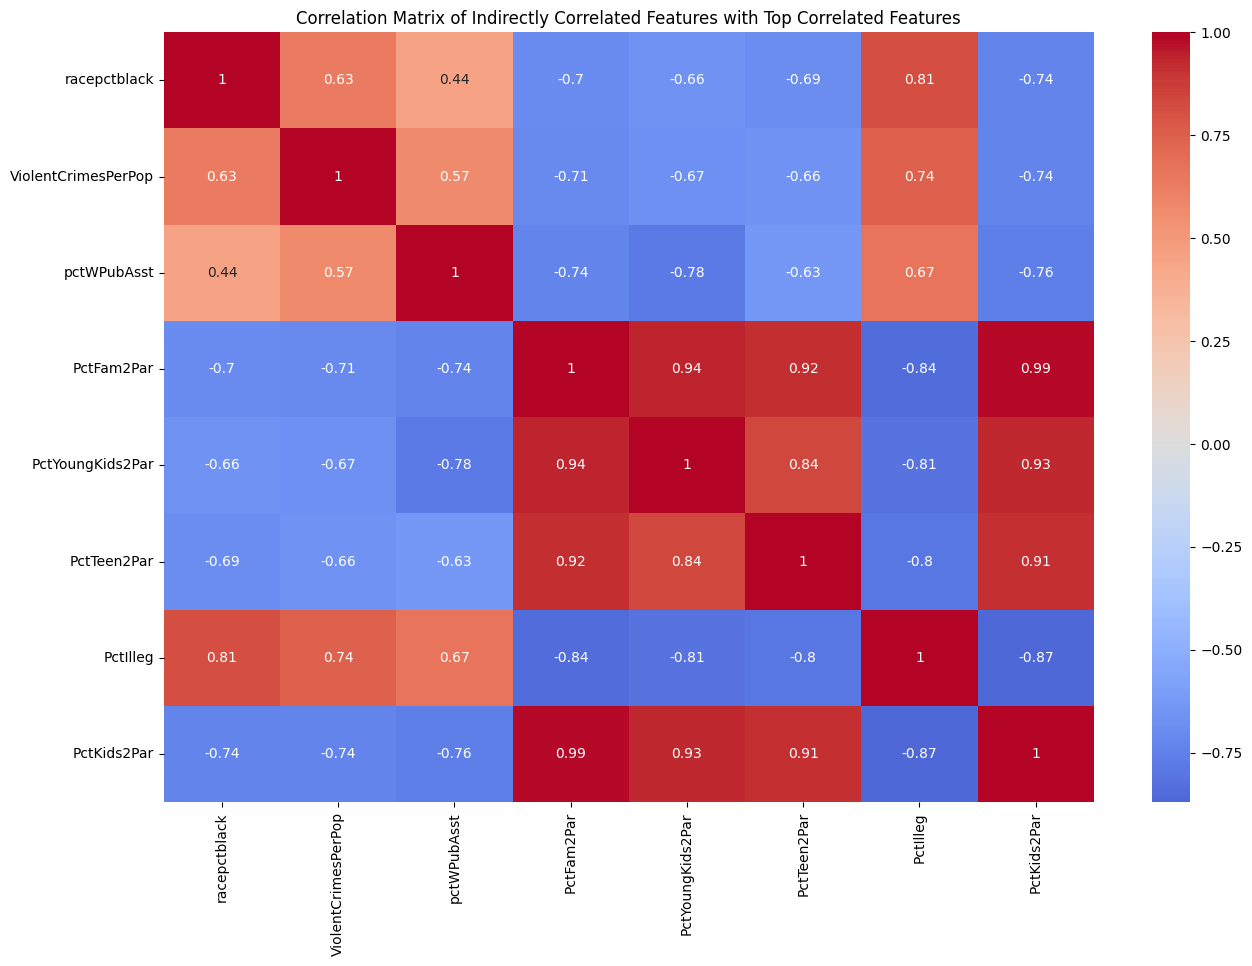

In [17]:
# Step 12: Correlation with the target variable
# We create a Correlation Matrix based on the results from before in Step 9 to see if there are any features that correlate strongly with the top correlating features for VioletCrimesPerPop.
# We do this to see if there are any features that indirectly correlate and therefore have strong impact on out Results.

# Extract the top positive and negative feature
top_positive_feature = corr_with_target.head(2).index[1]  # first one is target itself
top_negative_feature = corr_with_target.tail(1).index[0]

# Get top 3 features that correlate with the top positive feature (excluding the feature itself)
top_positive_corr_features = data.corr()[top_positive_feature].sort_values(ascending=False).index[1:4].tolist()

# Get top 3 features that correlate with the top negative feature (excluding the feature itself)
top_negative_corr_features = data.corr()[top_negative_feature].sort_values(ascending=False).index[1:4].tolist()

# Combine these features for a new correlation matrix
indirect_correlations = top_positive_corr_features + top_negative_corr_features + [top_positive_feature, top_negative_feature]

# Visualize the correlation matrix for these features
plt.figure(figsize=(15, 10))
indirect_corr_matrix = data[indirect_correlations].corr()
sns.heatmap(indirect_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Indirectly Correlated Features with Top Correlated Features')
plt.show()


Analysis of the Correlation Matrix of Indirectly Correlated Features with Top Correlated Features
The correlation matrix provided includes the top correlated features with ViolentCrimesPerPop and the top three features that correlate with the most positively and negatively correlated features. Here’s a detailed analysis:

Key Features Analyzed:
Top Positive Correlation Feature: PctIlleg (Percentage of illegitimate children)
Top Negative Correlation Feature: PctKids2Par (Percentage of kids in two-parent households)
Top Three Correlating Features for Positive and Negative Correlations:
PctIlleg: racepctblack, ViolentCrimesPerPop, pctWWPubAsst
PctKids2Par: PctFam2Par, PctYoungKids2Par, PctTeen2Par
Analysis:
Direct Correlations:

PctIlleg has a high positive correlation with ViolentCrimesPerPop (0.74), indicating that areas with higher percentages of illegitimate children tend to have higher violent crime rates.
PctKids2Par has a strong negative correlation with ViolentCrimesPerPop (-0.74), suggesting that areas with more children in two-parent households tend to have lower violent crime rates.
Indirect Correlations:

racepctblack:

High positive correlation with PctIlleg (0.81) and ViolentCrimesPerPop (0.63), suggesting that areas with higher percentages of black population also have higher percentages of illegitimate children and higher crime rates.
Negative correlation with PctKids2Par (-0.74), indicating that areas with a higher black population tend to have fewer children in two-parent households.
pctWWPubAsst (Percentage of households on public assistance):

Positively correlated with PctIlleg (0.67) and ViolentCrimesPerPop (0.57), indicating economic hardship is linked to higher crime rates and more illegitimate children.
Negatively correlated with PctKids2Par (-0.76), suggesting that higher public assistance is related to fewer two-parent households.
PctFam2Par (Percentage of families with two parents):

Highly positively correlated with PctKids2Par (0.99) and PctYoungKids2Par (0.94), reinforcing the link between family structure and lower crime rates.
Strong negative correlation with ViolentCrimesPerPop (-0.71), highlighting that two-parent family structures are associated with lower crime rates.
PctYoungKids2Par (Percentage of young kids in two-parent households):

Similar correlations as PctFam2Par with ViolentCrimesPerPop (-0.67), PctIlleg (-0.81), and PctKids2Par (0.93).
PctTeen2Par (Percentage of teens in two-parent households):

Strong positive correlation with PctKids2Par (0.91) and PctFam2Par (0.92), indicating that family structure remains consistent as children age.
Negative correlation with ViolentCrimesPerPop (-0.66), reinforcing the importance of family structure in reducing crime.
Takeaways:
Economic and Demographic Indicators:

Features like racepctblack, pctWWPubAsst, and PctIlleg are highly correlated, indicating that economic and demographic indicators are interlinked with crime rates.
Addressing biases requires focusing on socio-economic factors that disproportionately affect minority communities.
Family Structure:

Strong correlations between family structure indicators (PctKids2Par, PctFam2Par, PctYoungKids2Par, PctTeen2Par) and lower crime rates highlight the protective role of two-parent households.
These features are inversely correlated with economic hardship indicators (PctIlleg, pctWWPubAsst).
Bias Detection and Mitigation:

The model must account for socio-economic and demographic factors to avoid biases.
It is crucial to balance the model to ensure it does not disproportionately affect communities with higher economic hardship or minority populations.
This detailed analysis provides a comprehensive understanding of the direct and indirect correlations, guiding the next steps in bias detection and mitigation. The identified correlations highlight potential areas of bias that need to be addressed to ensure fair and unbiased predictions.

In [16]:
print("Data exploration complete.")

Data exploration complete.
